# Overview

### Problem Statement
A consumer finance company, which specialises in lending various types of loans to urban customers, has to make a decision on the loan applications based on the applicants profile and their likelihood to repay the loan. 

> - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

> - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

### Objectives

> - The company aims to identify patterns which indicate if a person is likely to default i.e. strong indicators / driving factors for default. The company can utilise this knowledge for its portfolio risk assessment, and for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 

> - The objective of this case study is to use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


### 1. Data Preparation

#### 1.1 Importing Analysis Libraries

In [312]:
# All imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Displays pandas float values in 2 decimals
#pd.options.display.float_format = '{:,.2f}'.format

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float', '{:.2f}'.format)

import warnings
warnings.filterwarnings('ignore')

#### 1.2 Importing Loan file

In [313]:
loan_df = pd.read_csv('E:\\ML and AI Course\\Main course\\LendingClubCaseStudy\\Datasets\\loan.csv')

#### 1.3 Data Understanding

In [314]:
loan_df.head(1)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade emp_title emp_length home_ownership  annual_inc verification_status issue_d loan_status pymnt_plan                                                url                                               desc      purpose     title zip_code addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  open_il_24m  mths_since_rcnt_il  \
0  1077501    1296599       5000         5000          4975.00   36 months   10.65%       162.87     B        B2       NaN  10+ years           RENT    24000.00            Verified  Dec-11  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer    860xx         AZ 27.65            0           Jan-85               1                     NaN                     NaN         3        0      13648     83.70%          9                   f       0.00           0.00      5863.16          5833.84          5000.00         863.16                0.00        0.00                     0.00       Jan-15           171.62          NaN             May-16                        0.00                          NaN            1       INDIVIDUAL               NaN        NaN                        NaN               0           NaN          NaN          NaN         NaN          NaN          NaN                 NaN   

   total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  inq_last_12m  acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util  chargeoff_within_12_mths  delinq_amnt  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  mths_since_recent_bc  mths_since_recent_bc_dlq  mths_since_recent_inq  mths_since_recent_revol_delinq  num_accts_ever_120_pd  num_actv_bc_tl  num_actv_rev_tl  num_bc_sats  num_bc_tl  num_il_tl  num_op_rev_tl  num_rev_accts  num_rev_tl_bal_gt_0  num_sats  num_tl_120dpd_2m  num_tl_30dpd  num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  
0           NaN      NaN          NaN          NaN         NaN       NaN               NaN     NaN          NaN           NaN                   NaN          NaN             NaN      NaN                      0.00            0                 NaN                   NaN                    NaN             NaN       NaN                   NaN                       NaN                    NaN                             NaN                    NaN             NaN              NaN          NaN        NaN        NaN            NaN            NaN                  NaN       NaN               NaN           NaN                 NaN                 NaN             NaN               NaN                  0.00       0.00              NaN                NaN             NaN                         NaN

In [315]:
# Understand the shape of dataframe
loan_df.shape

(39717, 111)

In [316]:
#Understand the data type of columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [317]:
# Describe the numerical columns
loan_df.describe()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal  total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  inq_last_12m  acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util  chargeoff_within_12_mths  delinq_amnt  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  mths_since_recent_bc  mths_since_recent_bc_dlq  \
count   39717.00   39717.00   39717.00     39717.00         39717.00     39717.00    39717.00 39717.00     39717.00        39717.00                14035.00                 2786.00  39717.00 39717.00   39717.00   39717.00   39717.00       39717.00     39717.00         39717.00         39717.00       39717.00            39717.00    39717.00                 39717.00         39717.00                    39661.00                         0.00     39717.00              0.00       0.00                       0.00        39717.00          0.00         0.00         0.00        0.00         0.00         0.00                0.00          0.00     0.00         0.00         0.00        0.00      0.00              0.00    0.00         0.00          0.00                  0.00         0.00            0.00     0.00                  39661.00     39717.00                0.00                  0.00                   0.00            0.00      0.00                  0.00                      0.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45       324.56    68968.93    13.32         0.15            0.87                   35.90                   69.70      9.29     0.06   13382.53      22.09      51.23          50.99     12153.60         11567.15          9793.35        2263.66                1.36       95.22                    12.41          2678.83                        0.00                          NaN         1.00               NaN        NaN                        NaN            0.00           NaN          NaN          NaN         NaN          NaN          NaN                 NaN           NaN      NaN          NaN          NaN         NaN       NaN               NaN     NaN          NaN           NaN                   NaN          NaN             NaN      NaN                      0.00         0.00                 NaN                   NaN                    NaN             NaN       NaN                   NaN                       NaN   
std    210694.13  265678.31    7456.67      7187.24          7128.45       208.87    63793.77     6.68         0.49            1.07                   22.02                   43.82      4.40     0.24   15885.02      11.40     375.17         373.82      9042.04          8942.67          7065.52        2608.11                7.29      688.74                   148.67          4447.14                        0.00                          NaN         0.00               NaN        NaN                        NaN            0.00           NaN          NaN          NaN         NaN          NaN          NaN                 NaN           NaN      NaN          NaN          NaN         NaN       NaN               NaN     NaN          NaN           NaN                   NaN          NaN             NaN      NaN                      0.00         0.00                 NaN                   NaN                    NaN             NaN       NaN                   NaN                       NaN   
min     54734.00   70699.00     500.00       500.00           

In [318]:
#Check % of Nulls in the dataset for each of the columns
100*loan_df.isnull().mean()

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


In [319]:
# Check if id column is unique for all rows

loan_df["id"].nunique()==len(loan_df["id"]) # This is True which indicates id column is unique


True

In [320]:
#Set this as index
loan_df.set_index("id", inplace=True)
loan_df.head(2)

member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade emp_title emp_length home_ownership  annual_inc verification_status issue_d  loan_status pymnt_plan                                                url                                               desc      purpose     title zip_code addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  open_il_24m  mths_since_rcnt_il  \
id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
1077501    1296599       5000         5000          4975.00   36 months   10.65%       162.87     B        B2       NaN  10+ years           RENT    24000.00            Verified  Dec-11   Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer    860xx         AZ 27.65            0           Jan-85               1                     NaN                     NaN         3        0      13648     83.70%          9                   f       0.00           0.00      5863.16          5833.84          5000.00         863.16                0.00        0.00                     0.00       Jan-15           171.62          NaN             May-16                        0.00                          NaN            1       INDIVIDUAL               NaN        NaN                        NaN               0           NaN          NaN          NaN         NaN          NaN          NaN                 NaN   
1077430    1314167       2500         2500          2500.00   60 months   15.27%        59.83     C        C4     Ryder   < 1 year           RENT    30000.00     Source Verified  Dec-11  Charged Off          n  https://lendingclub.com/browse/loanDetail.acti...    Borrower added on 12/22/11 > I plan to use t...          car      bike    309xx         GA  1.00            0           Apr-99               5                     NaN                     NaN         3        0       1687      9.40%          4                   f       0.00           0.00      1008.71          1008.71           456.46         435.17                0.00      117.08                     1.11       Apr-13           119.66          NaN             Sep-13                        0.00                          NaN            1       INDIVIDUAL               NaN        NaN                        NaN               0           NaN          NaN          NaN         NaN          NaN          NaN                 NaN   

         total_bal_il  il_util  

#### 1.4 Data Cleaning and Manipulation

#### Steps
#### 1. Remove unnecessary columns (all blanks or single unique value or post loan approval which should not be used)
#### 2. Remove unnecessary rows (rows with all missing values, current)
#### 3. Deal with missing values
#### 4. Standardising values
#### 5. Deal with outliers

#### 1.4.1 Drop unnecessary columns (all blanks or single unique value or post loan approval which should not be used)

In [321]:
# Drop all null columns
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.shape


(39717, 56)

In [322]:
# Drop majority null columns and single unique value columns

100*loan_df.isnull().mean()

#These columns have majority null values

#mths_since_last_record       92.99
#next_pymnt_d                 97.13

member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_delinq       64.66
mths_since_last_reco

In [323]:
#These columns have only one unique value for all the rows
loan_df.nunique()
#(loan_df.nunique()/len(loan_df))*100

#pymnt_plan                        1
#initial_list_status               1
#collections_12_mths_ex_med        1
#policy_code                       1
#application_type                  1
#acc_now_delinq                    1
#chargeoff_within_12_mths          1
#delinq_amnt                       1
#tax_liens                         1

member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
mths_since_last_delinq      

In [324]:
#Based on the data dictionary, the following columns are only available  post charge-off (default) or post loan approval, 
#therefore they cannot be factors to determine likelihood to default

#collection_recovery_fee
#last_pymnt_amnt
#last_pymnt_d
#out_prncp
#out_prncp_inv
#recoveries
#total_pymnt
#total_pymnt_inv
#total_rec_int
#total_rec_late_fee
#total_rec_prncp



# List all the above unnecessary columns into a variable before dropping them

unnec_cols = ['mths_since_last_record','next_pymnt_d','pymnt_plan','initial_list_status',
              'collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths',
              'tax_liens','delinq_amnt',
              'collection_recovery_fee','last_pymnt_amnt','last_pymnt_d','out_prncp','out_prncp_inv',
              'recoveries','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee',
              'total_rec_prncp'       
             ]

loan_df=loan_df.drop(unnec_cols,axis=1)


In [325]:
loan_df.shape



(39717, 34)

#### 1.4.2. Remove unnecessary rows (rows with all missing values, current)

In [326]:
# Check that there are no rows with missing values in all the 34 columns
loan_df[loan_df.isnull().sum(axis=1)==34]

# The output indicates that there are no rows with all missing values in the columns

Empty DataFrame
Columns: [member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, open_acc, pub_rec, revol_bal, revol_util, total_acc, last_credit_pull_d, pub_rec_bankruptcies]
Index: []

In [327]:
# We only need charged off (default) and fully paid loan entries for the purposes of our analysis to identify strong indicators
loan_df.loan_status.value_counts()


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [328]:
# Drop the rows with loan status = current (1140 rows)

loan_df = loan_df[loan_df["loan_status"] != "Current"]
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [329]:
len(loan_df)

38577

#### 1.4.3. Deal with missing values

In [330]:
#check missing values for the columns in scope
100*loan_df.isnull().mean()
#emp_title, emp_length, desc, title, last_credit_pull_d and pub_rec_bankruptcies have some missing values

member_id                 0.00
loan_amnt                 0.00
funded_amnt               0.00
funded_amnt_inv           0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_title                 6.19
emp_length                2.68
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
url                       0.00
desc                     32.47
purpose                   0.00
title                     0.03
zip_code                  0.00
addr_state                0.00
dti                       0.00
delinq_2yrs               0.00
earliest_cr_line          0.00
inq_last_6mths            0.00
mths_since_last_delinq   64.56
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
revol_util                0.13
total_acc                 0.00
last_cre

In [331]:
# Of the above columns with missing values, it makes sense to deal with emp_length and revol_util. 
loan_df['emp_length'].isnull().sum() #1033 NA

1033

In [332]:
# loan_df.groupby(by = ['emp_length']).count()
loan_df["emp_length"].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [333]:
# Fill the missing values with the most frequently occurring employment length

loan_df["emp_length"]=loan_df["emp_length"].fillna("10+ years")
loan_df["emp_length"].value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [334]:
# Describe revol_util column
loan_df["revol_util"].isnull().sum() #50 rows have null values (0.13%)




#loan_df.revol_util = pd.to_numeric(loan_df.revol_util.apply(lambda x : x.split('%')[0]))


50

In [335]:
#Drop these rows

loan_df=loan_df[loan_df["revol_util"].notna()]

In [336]:
len(loan_df)

38527

#### 1.4.4. Standardising values

In [337]:
# We can standardise emp_length to have only numeric values 
# < 1 year = 0 years and 10+ years = 10

loan_df.emp_length = pd.to_numeric(loan_df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))


In [338]:
# the following columns seem to be string with numeric values with % added at the end

# revol_util
# int_rate

loan_df["revol_util"].describe()
loan_df["revol_util"].value_counts()

loan_df["int_rate"].describe()
loan_df["int_rate"].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
7.49%     651
9.99%     590
7.90%     574
5.42%     573
11.71%    559
11.99%    483
10.37%    467
12.69%    451
6.03%     447
8.49%     434
5.79%     410
12.99%    409
12.42%    403
10.65%    403
7.29%     397
6.62%     396
11.86%    391
8.90%     386
9.63%     378
10.59%    358
9.91%     357
5.99%     347
14.27%    342
7.14%     341
6.99%     336
11.11%    331
12.53%    327
10.74%    311
6.54%     305
6.91%     303
8.94%     294
16.77%    294
7.66%     292
13.61%    291
13.98%    283
13.23%    263
11.12%    259
15.99%    258
6.17%     252
10.75%    250
12.68%    250
10.36%    250
10.00%    249
11.36%    247
13.99%    241
11.83%    233
10.62%    228
10.38%    219
13.06%    219
10.25%    218
16.49%    218
14.96%    214
15.65%    208
18.25%    207
11.14%    206
6.92%     204
12.18%    203
15.23%    200
15.95%    199
14.65%    198
16.32%    197
8.00%     191
12.73%    187
9.62%     186
15.27%    185
15.21%    185
9.32% 

In [339]:
# converting int rate and revol_util to numeric

loan_df.int_rate = pd.to_numeric(loan_df.int_rate.apply(lambda x : x.split('%')[0]))
loan_df.revol_util = pd.to_numeric(loan_df.revol_util.apply(lambda x : x.split('%')[0]))

In [340]:
loan_df["emp_length"].value_counts()

10    9517
0     4496
2     4286
3     4008
4     3335
5     3190
1     3163
6     2165
7     1708
8     1433
9     1226
Name: emp_length, dtype: int64

In [180]:
#loan_df["int_rate"].value_counts()
#loan_df["revol_util"].value_counts()

#### 1.4.5. Deal with outliers

In [341]:
# Remove outliers on some of the key numerical columns of interest

# annual_inc, dti, loan_amnt, revol_bal,revol_util

# Describe/ quantile these columns and see outliers



loan_df[["annual_inc","dti","loan_amnt","revol_bal","revol_util"]].quantile([0.5,0.75, 0.90,0.95,0.98,0.99,1.0])



annual_inc   dti  loan_amnt  revol_bal  revol_util
0.50    59000.00 13.37    9600.00    8777.00       49.10
0.75    82000.00 18.56   15000.00   16930.00       72.30
0.90   115000.00 22.29   21600.00   28980.00       87.80
0.95   140004.00 23.80   25000.00   41412.60       93.57
0.98   187000.00 24.85   30000.00   63465.84       97.10
0.99   234000.00 26.53   35000.00   83303.22       98.50
1.00  6000000.00 29.99   35000.00  149588.00       99.90

In [342]:
# Except annual income, other columns do not have massive outliers

# Setting the threshold of 99% for annual inc, remove the outlier from data

ann_99_perc = loan_df['annual_inc'].quantile(0.99)
#ann_99_perc
loan_df = loan_df[loan_df.annual_inc <= ann_99_perc]

In [343]:
# Get the final length of the data frame after all the data preparation
len(loan_df)

38142

### 2. Data Analysis

In [344]:
# Steps
#1. Categorise into numeric / categorical - create business and data-driven variables
#2. Visualise
#loan_df.describe()
loan_df.shape

(38142, 34)

In [345]:
# Derive some data driven variables

# Create issue month and issue years as this may be of importance to understand when the loan was issued in a year

loan_df['issue_m']=loan_df['issue_d'].apply(lambda x : x.split('-')[0])
loan_df['issue_y']= '20' + loan_df['issue_d'].apply(lambda x : x.split('-')[1])
#loan_df['issue_y']='20' + loan_df['issue_d'].str.split('-')[1]

loan_df[['issue_d','issue_m','issue_y']]


issue_d issue_m issue_y
id                             
1077501  Dec-11     Dec    2011
1077430  Dec-11     Dec    2011
1077175  Dec-11     Dec    2011
1076863  Dec-11     Dec    2011
1075269  Dec-11     Dec    2011
...         ...     ...     ...
92187    Jul-07     Jul    2007
90665    Jul-07     Jul    2007
90395    Jul-07     Jul    2007
90376    Jul-07     Jul    2007
87023    Jun-07     Jun    2007

[38142 rows x 3 columns]

In [346]:
# Create a bucket for annual income groups for further analysis

loan_df['annual_inc_bins'] = pd.cut(loan_df['annual_inc'], bins=6,precision =0)#,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

loan_df[['annual_inc_bins','annual_inc']]


annual_inc_bins  annual_inc
id                                       
1077501     (3770.0, 42333.0]    24000.00
1077430     (3770.0, 42333.0]    30000.00
1077175     (3770.0, 42333.0]    12252.00
1076863    (42333.0, 80667.0]    49200.00
1075269     (3770.0, 42333.0]    36000.00
...                       ...         ...
92187     (80667.0, 119000.0]   110000.00
90665       (3770.0, 42333.0]    18000.00
90395     (80667.0, 119000.0]   100000.00
90376    (195667.0, 234000.0]   200000.00
87023       (3770.0, 42333.0]    22000.00

[38142 rows x 2 columns]

In [347]:
loan_df.shape

(38142, 37)

In [348]:
#1. Categorise into numeric / categorical - create business and data-driven variables

categorical_cols=['addr_state','grade','home_ownership', 'emp_length','loan_status','purpose','term',
                  'verification_status','issue_m','issue_y','annual_inc_bins','sub_grade']
# Treating emp length has categorical variable
numerical_cols=['annual_inc','dti','int_rate','funded_amnt','funded_amnt_inv','inq_last_6mths','installment','loan_amnt',
'open_acc','pub_rec','pub_rec_bankruptcies','total_acc','mths_since_last_delinq','delinq_2yrs','revol_bal','revol_util']

 # These columns have very high cardinality, therefore not including these for subsequent analysis
extra_cols = ['title','url','desc','emp_title','member_id','issue_d','last_credit_pull_d','earliest_cr_line','zip_code']

In [349]:
loan_df[extra_cols].nunique()

title                 19102
url                   38142
desc                  25512
emp_title             27755
member_id             38142
issue_d                  55
last_credit_pull_d      106
earliest_cr_line        524
zip_code                822
dtype: int64

#### 2.1 Univariate Analysis

Column: annual_inc, Missing Data: 0.00%


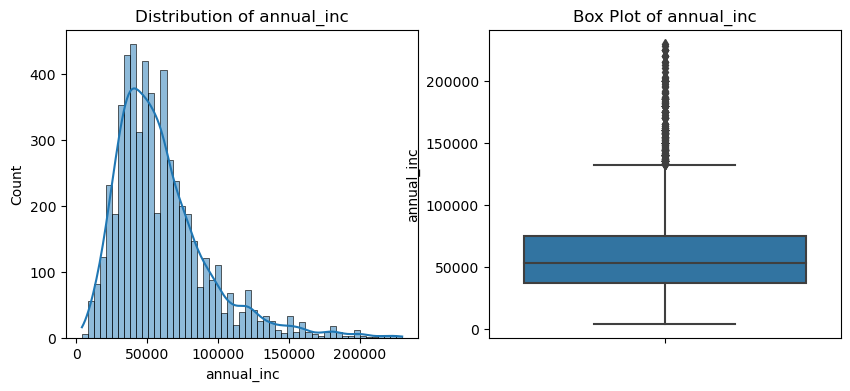

Column: dti, Missing Data: 0.00%


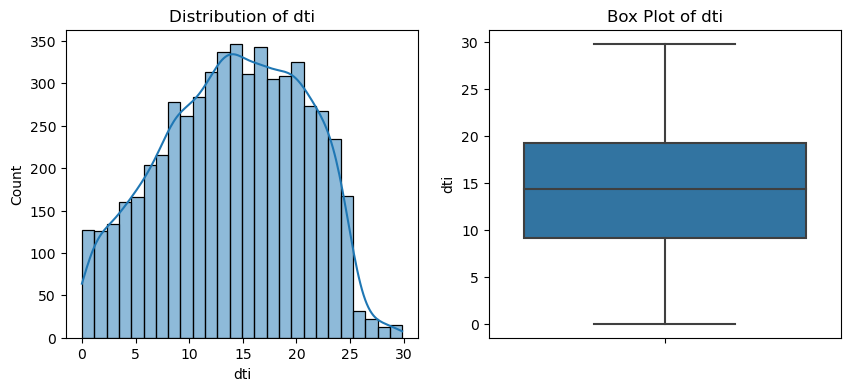

Column: int_rate, Missing Data: 0.00%


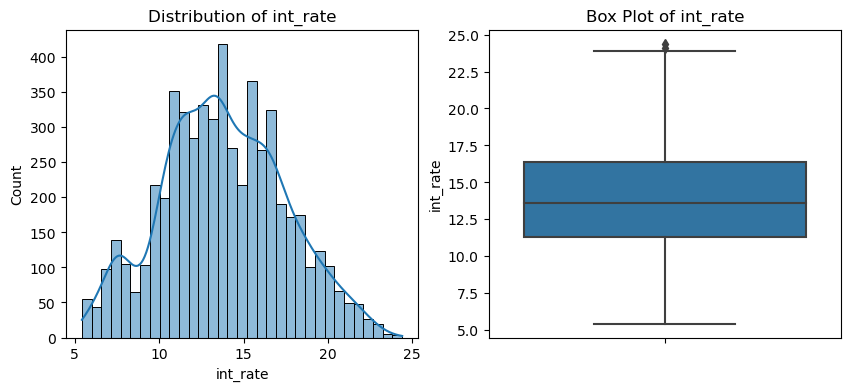

Column: funded_amnt, Missing Data: 0.00%


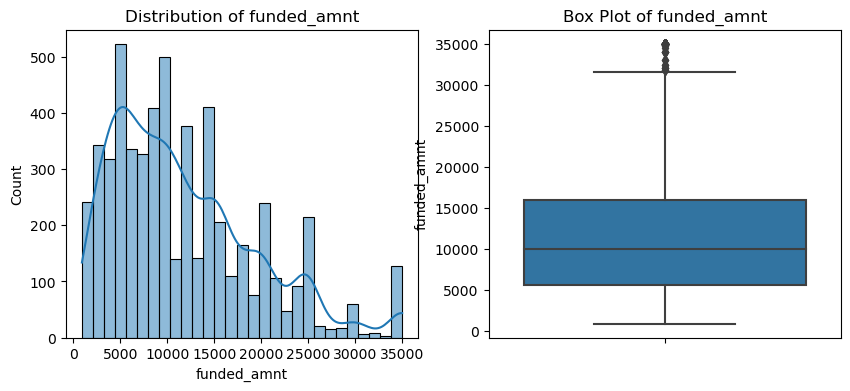

Column: funded_amnt_inv, Missing Data: 0.00%


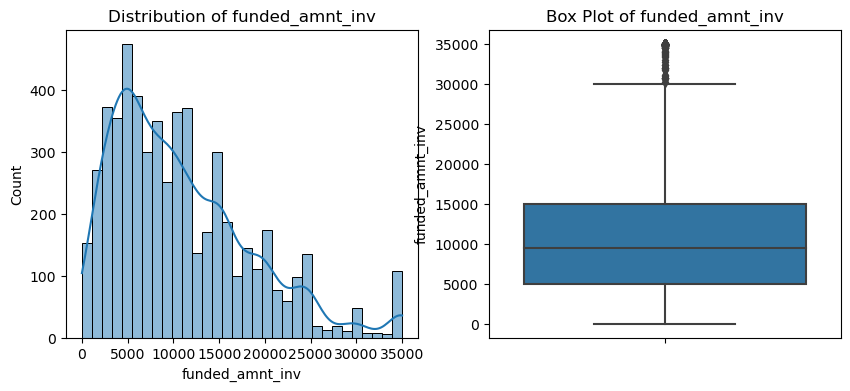

Column: inq_last_6mths, Missing Data: 0.00%


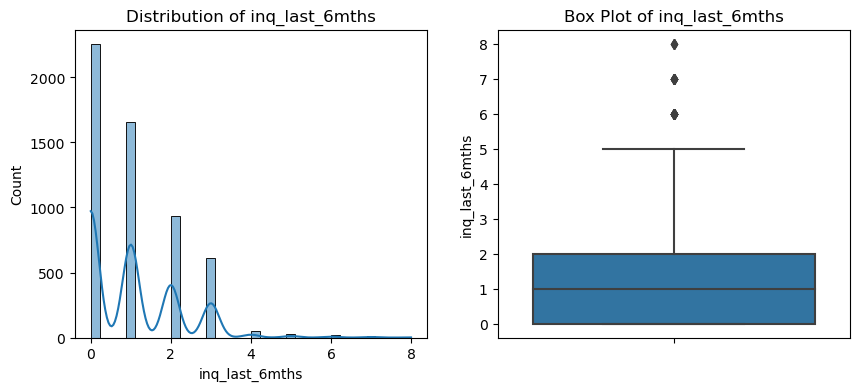

Column: installment, Missing Data: 0.00%


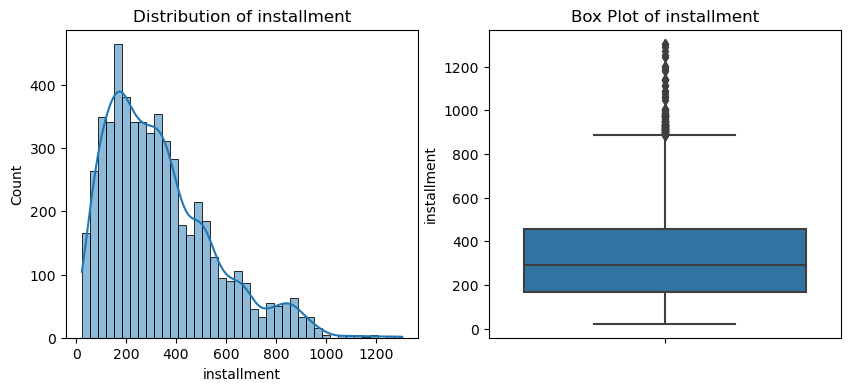

Column: loan_amnt, Missing Data: 0.00%


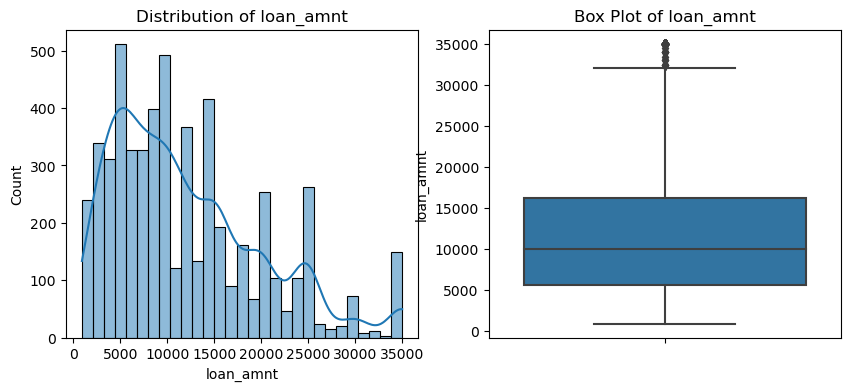

Column: open_acc, Missing Data: 0.00%


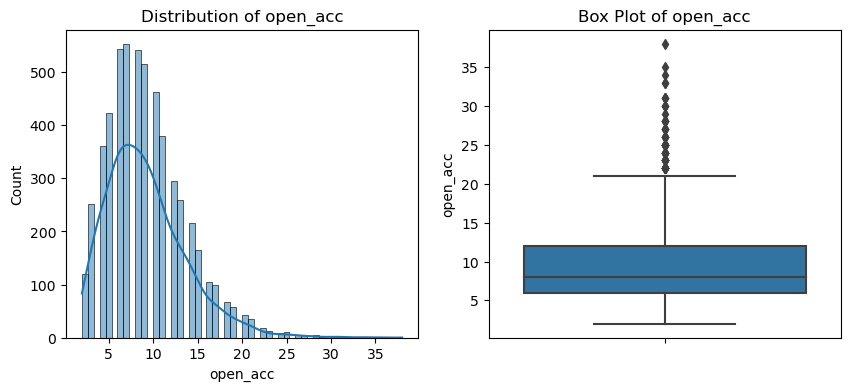

Column: pub_rec, Missing Data: 0.00%


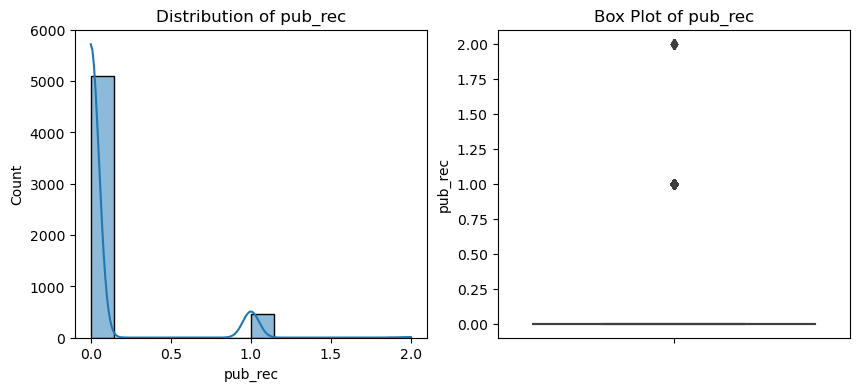

Column: pub_rec_bankruptcies, Missing Data: 2.08%


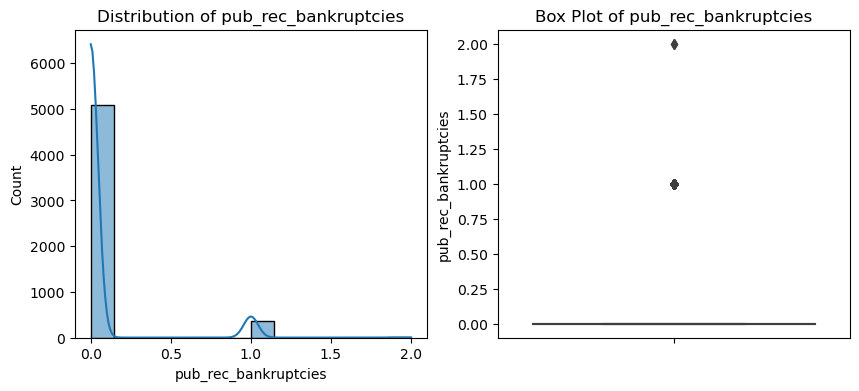

Column: total_acc, Missing Data: 0.00%


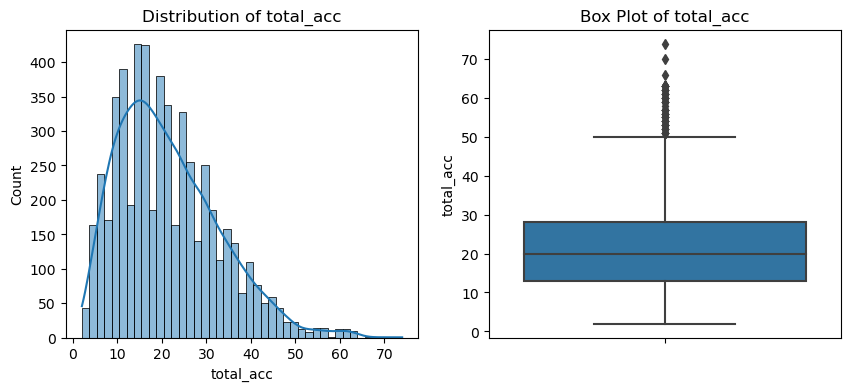

Column: mths_since_last_delinq, Missing Data: 61.94%
Skipping mths_since_last_delinq due to high percentage of missing data.
Column: delinq_2yrs, Missing Data: 0.00%


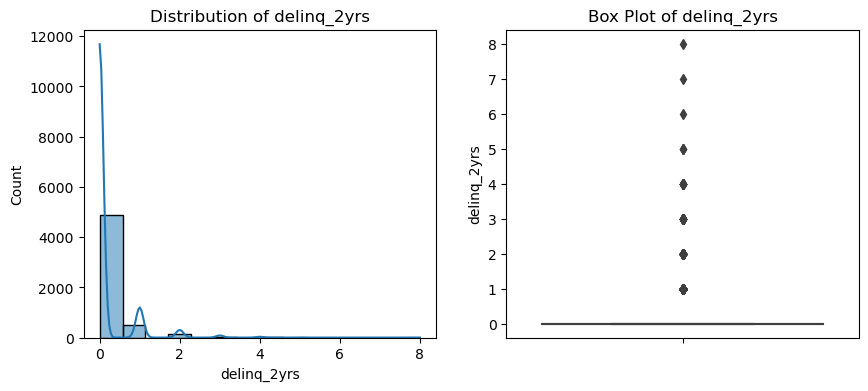

Column: revol_bal, Missing Data: 0.00%


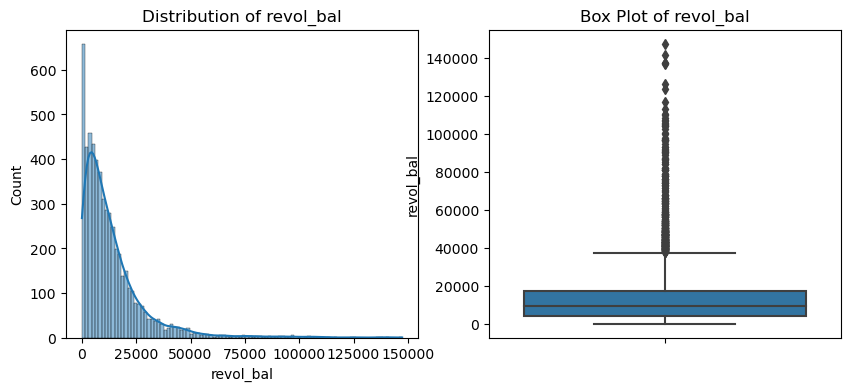

Column: revol_util, Missing Data: 0.00%


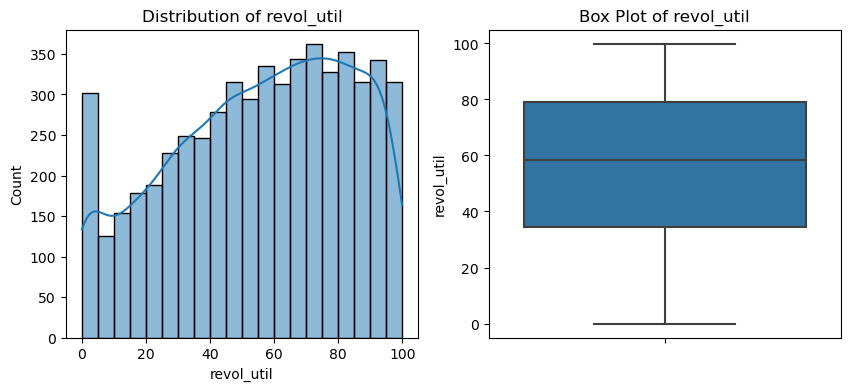

Column: addr_state, Missing Data: 0.00%


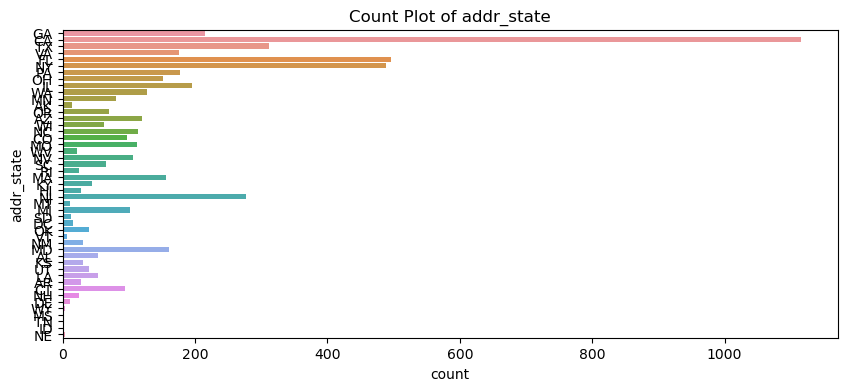

Column: grade, Missing Data: 0.00%


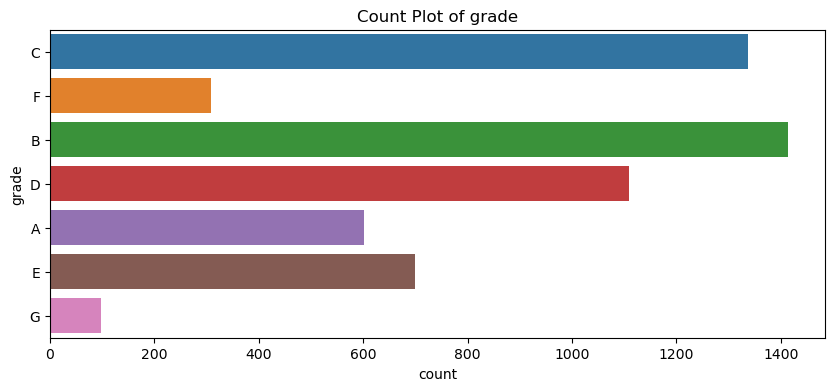

Column: home_ownership, Missing Data: 0.00%


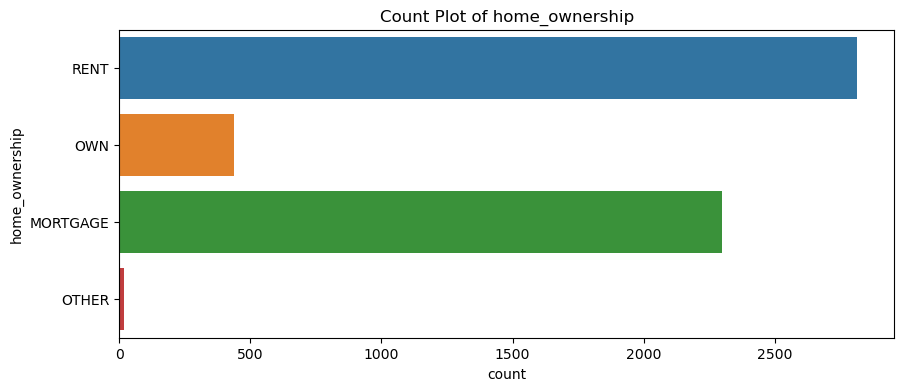

Column: emp_length, Missing Data: 0.00%


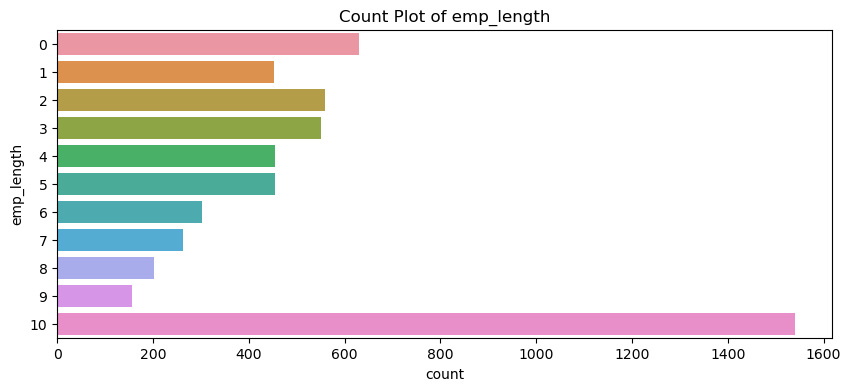

Column: loan_status, Missing Data: 0.00%


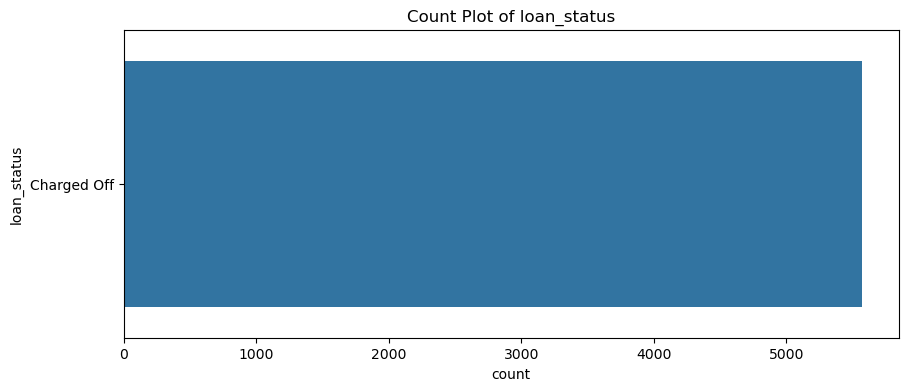

Column: purpose, Missing Data: 0.00%


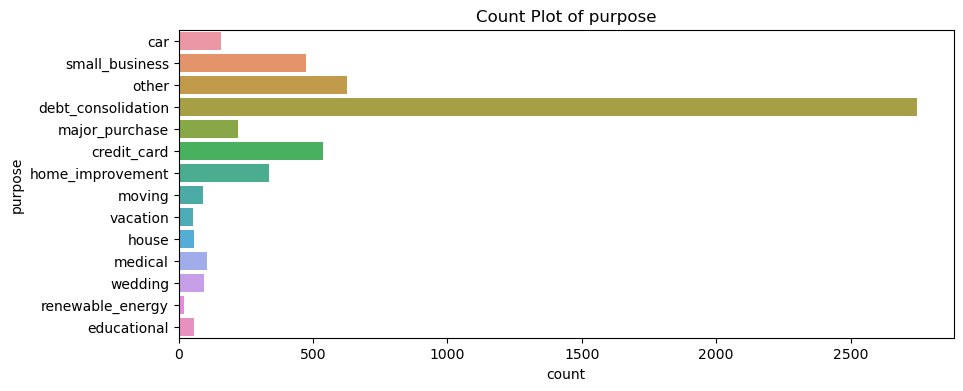

Column: term, Missing Data: 0.00%


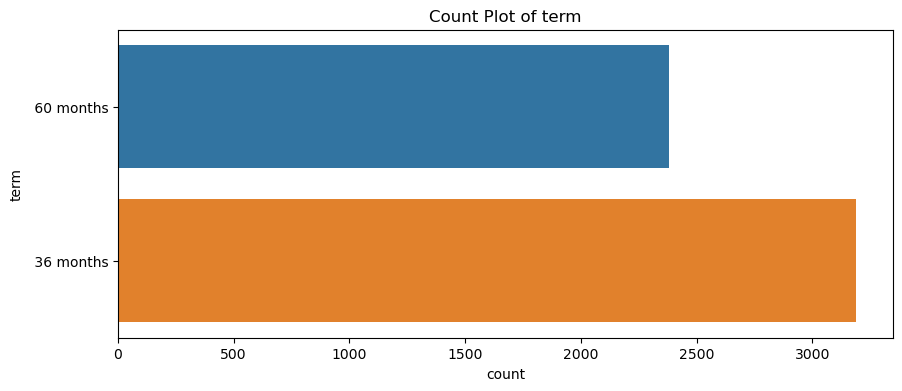

Column: verification_status, Missing Data: 0.00%


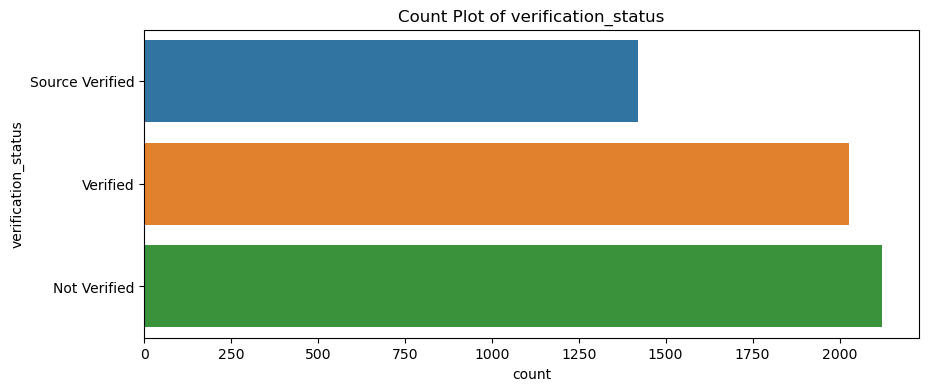

Column: issue_m, Missing Data: 0.00%


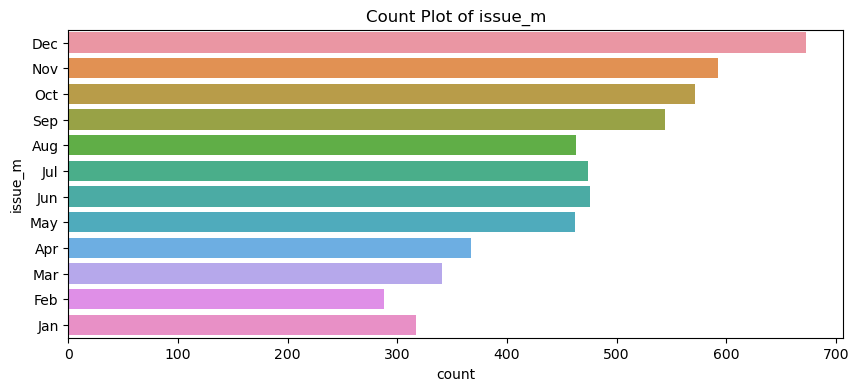

Column: issue_y, Missing Data: 0.00%


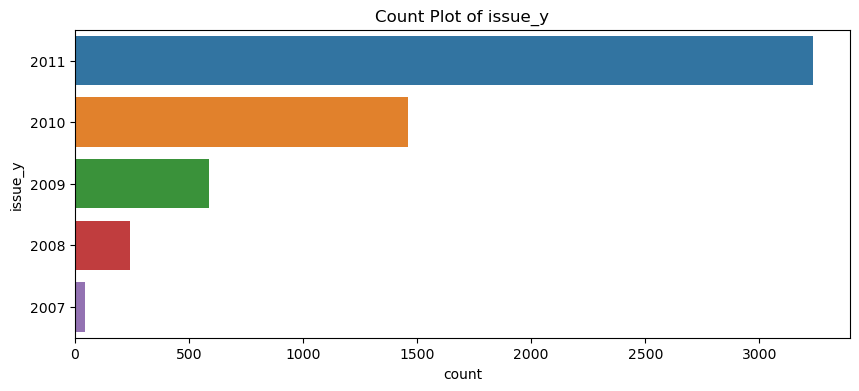

Column: annual_inc_bins, Missing Data: 0.00%


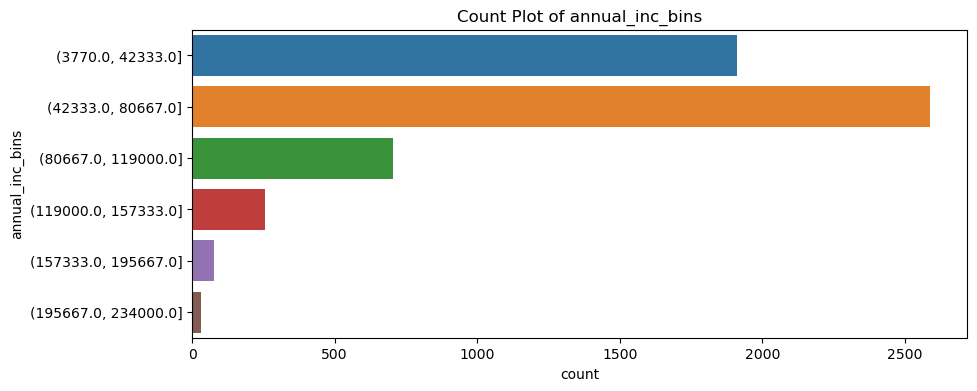

Column: sub_grade, Missing Data: 0.00%


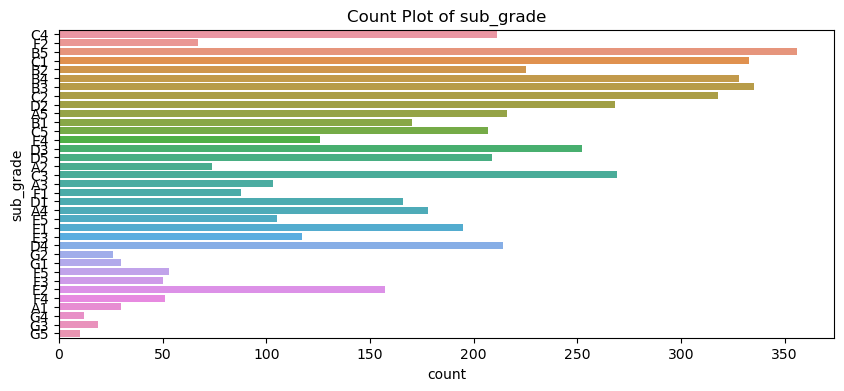

In [350]:
# Define a function for univariate analysis to draw the following only for charged off loans to understand significance;

# distribution and box plot for numerical columns and;
# count plot for categorical columns

def univariate_analysis(df, column_list, plot_type='numerical'):
    for column in column_list:
        if column not in df.columns:
            print(f"Column {column} not found in dataframe.")
            continue

        missing_percentage = df[column].isna().sum() / len(df) * 100
        print(f"Column: {column}, Missing Data: {missing_percentage:.2f}%")

        if missing_percentage < 30:
            plt.figure(figsize=(10, 4))

            if plot_type == 'numerical':
                # Distribution plot for numerical data
                plt.subplot(1, 2, 1)
                sns.histplot(df[column].dropna(), kde=True)
                plt.title(f'Distribution of {column}')

                plt.subplot(1, 2, 2)
                sns.boxplot(y=df[column].dropna())
                plt.title(f'Box Plot of {column}')
            elif plot_type == 'categorical':
                # Count plot for categorical data
                sns.countplot(y=df[column].dropna())
                plt.title(f'Count Plot of {column}')
            
            plt.show()
        else:
            print(f"Skipping {column} due to high percentage of missing data.")

# Test the function with a selection of columns
#test_numerical_columns = ['loan_amnt', 'int_rate']  # Replace with actual numerical columns
#test_categorical_columns = ['term', 'grade']       # Replace with actual categorical columns

loan_df_coff=loan_df[loan_df['loan_status']=='Charged Off']

univariate_analysis(loan_df_coff, numerical_cols, plot_type='numerical')
univariate_analysis(loan_df_coff, categorical_cols, plot_type='categorical')

### Observations from Univariate analysis

These provide a strong indication of which features are prominent within the "charged off" set of loan applications
> - Grade B has the highest number of charged off loan applicants
> - Loan applicants with home ownership of Rent
> - Loan applicants with employment length of 10 or more years
> - Loan applicants with a purpose of Debt consolidation, credit card, other and small business
> - Term of 36 months
> - Loan applicants where the loan is issued in the second half of the year
> - Loan applications issued in 2011
> - Applicants with an income range of 42K - 81K
> - Applicants with subgrade of B5

#### 2.2 Bivariate Analysis

addr_state annual_inc


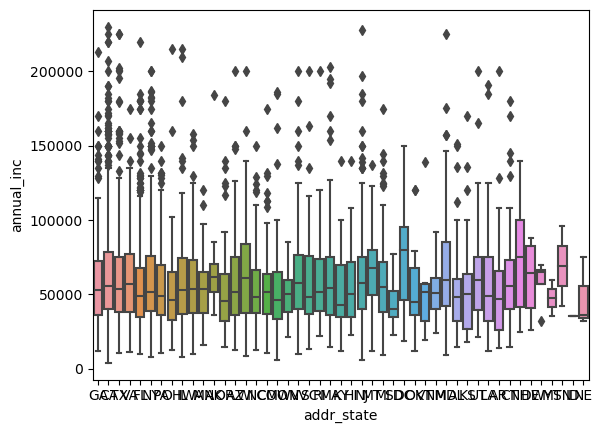

addr_state dti


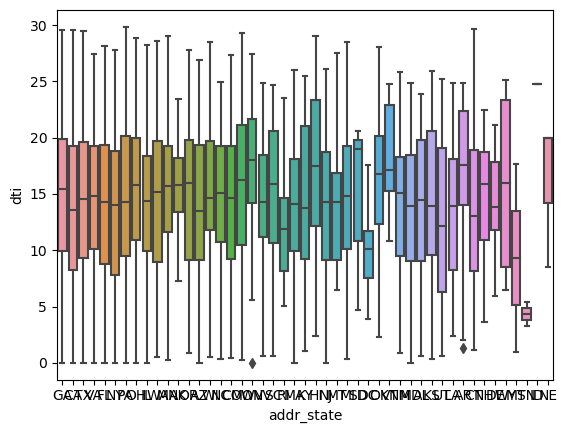

addr_state int_rate


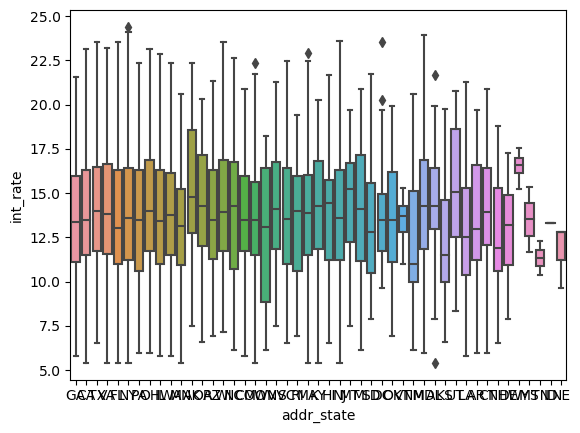

addr_state funded_amnt


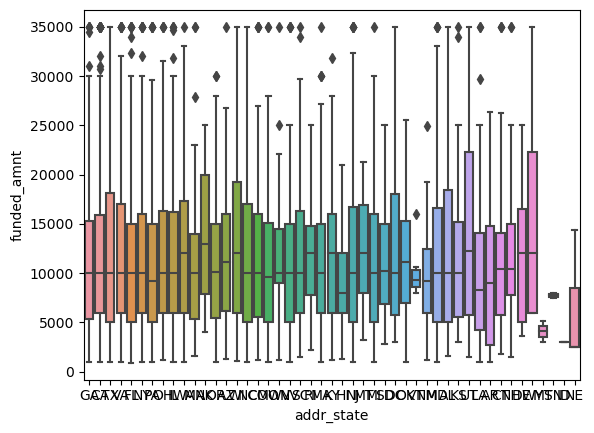

addr_state funded_amnt_inv


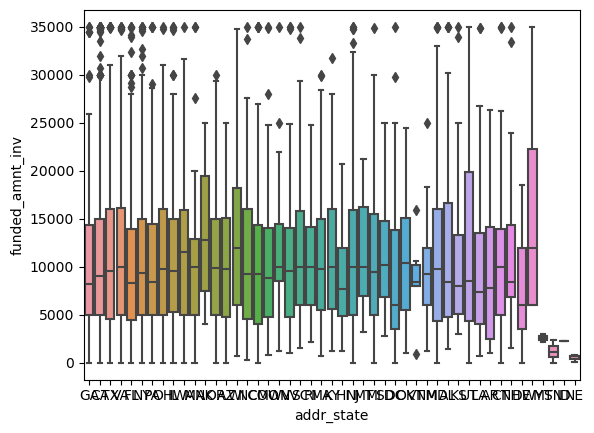

addr_state inq_last_6mths


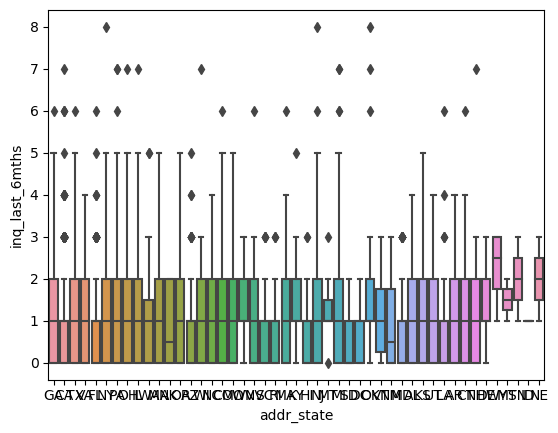

addr_state installment


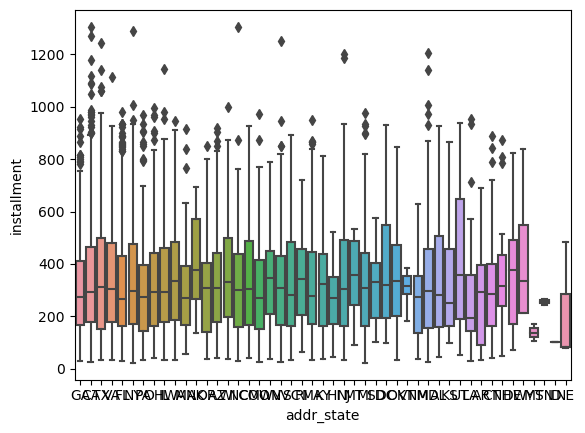

addr_state loan_amnt


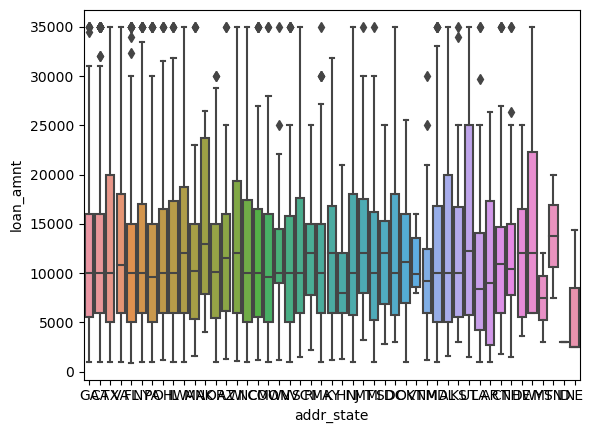

addr_state open_acc


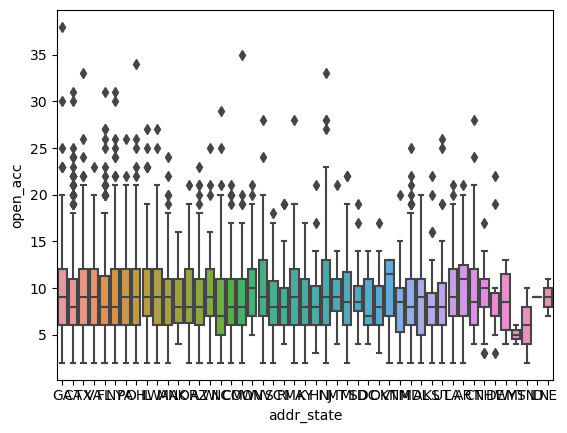

addr_state pub_rec


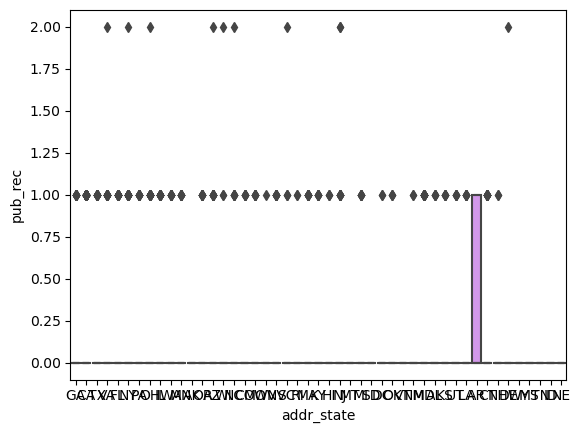

addr_state pub_rec_bankruptcies


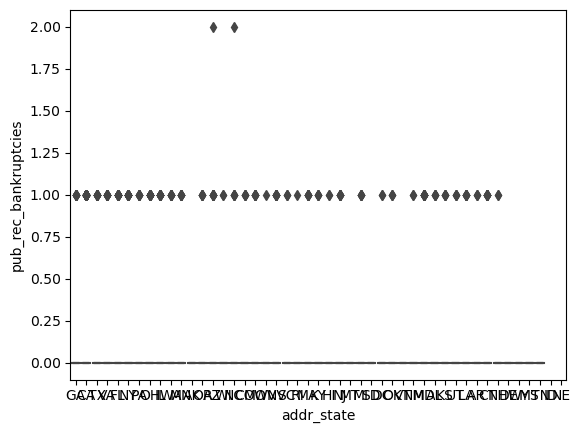

addr_state total_acc


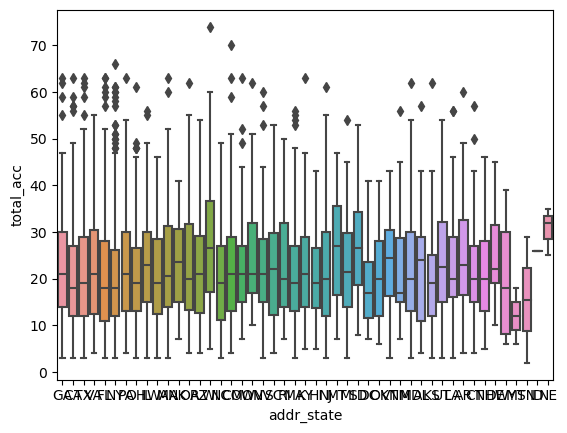

addr_state mths_since_last_delinq


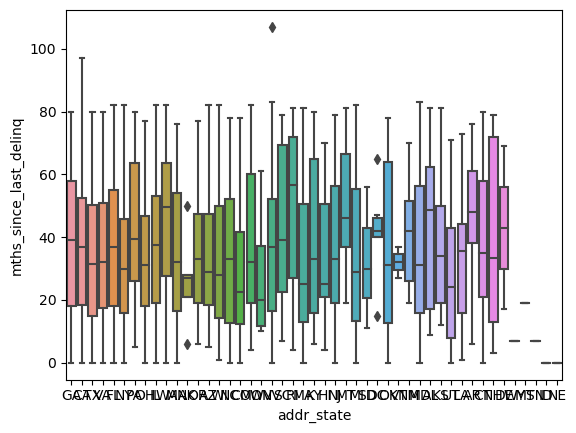

addr_state delinq_2yrs


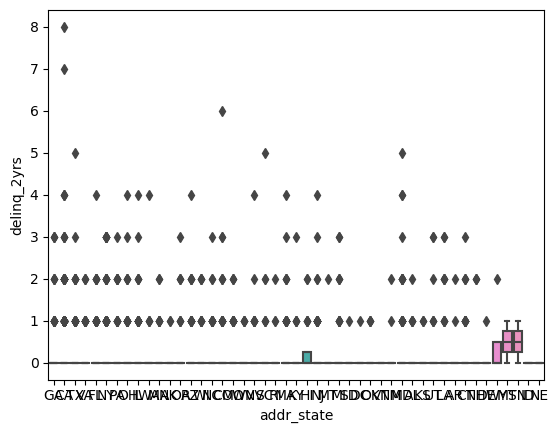

addr_state revol_bal


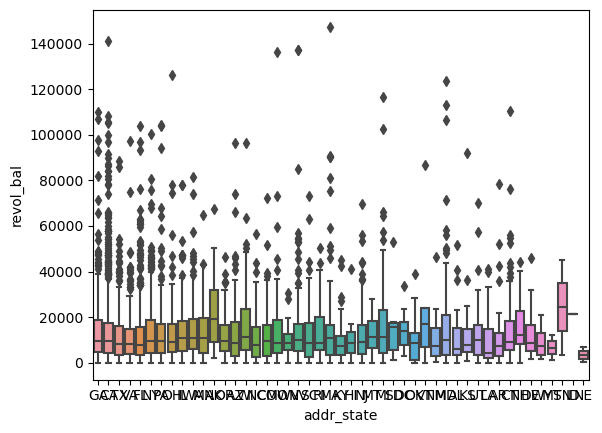

addr_state revol_util


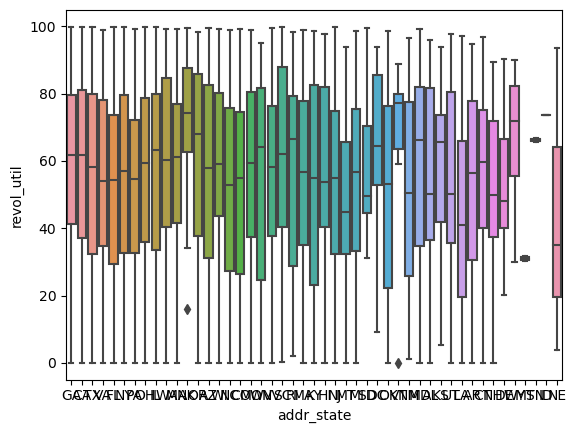

grade annual_inc


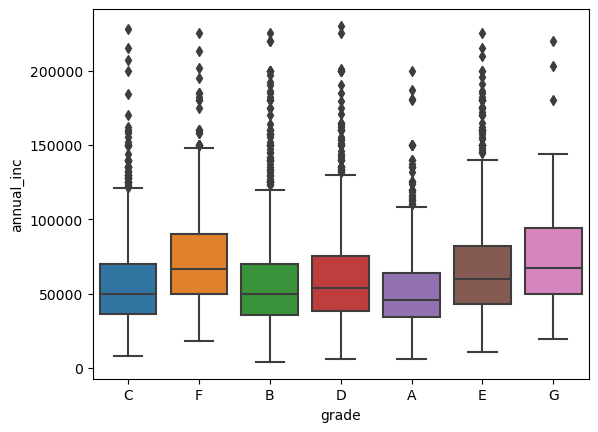

grade dti


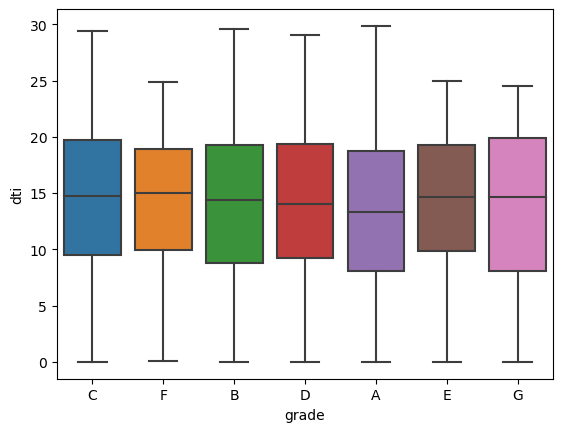

grade int_rate


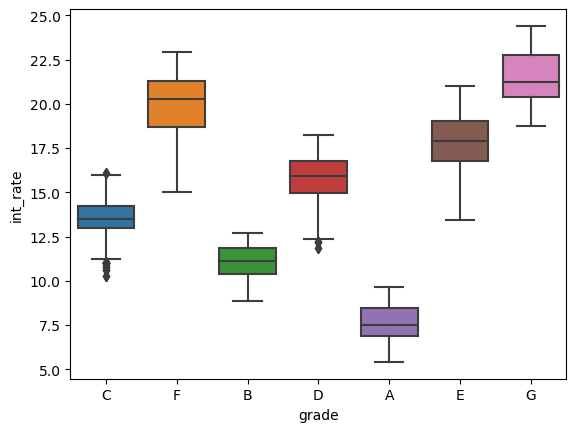

grade funded_amnt


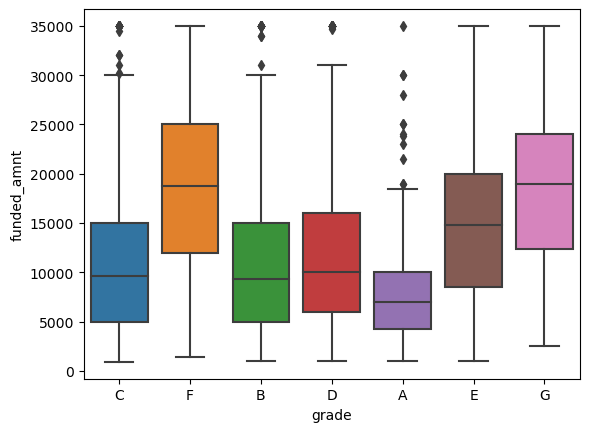

grade funded_amnt_inv


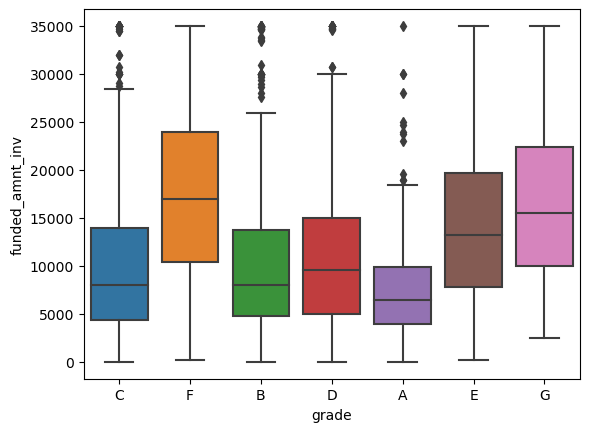

grade inq_last_6mths


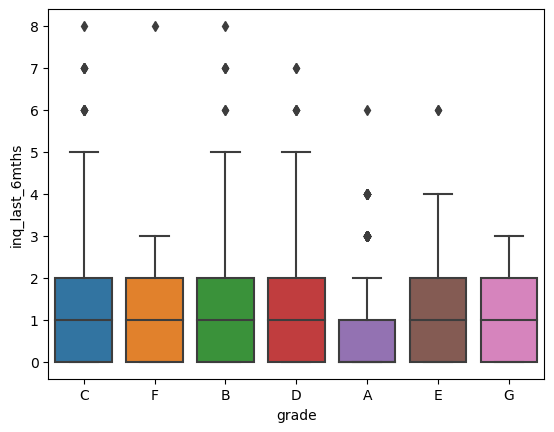

grade installment


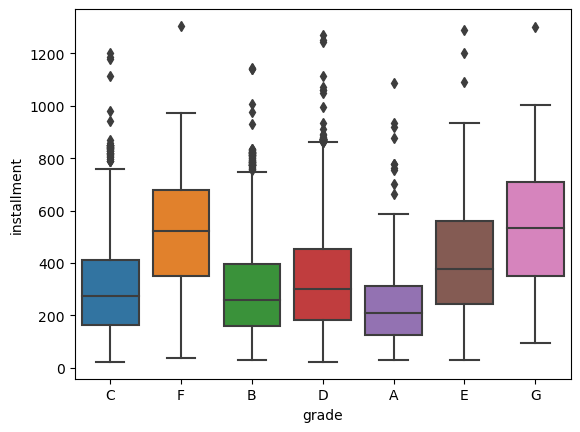

grade loan_amnt


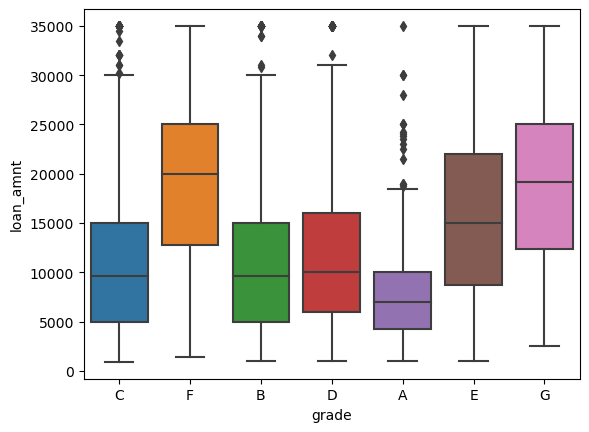

grade open_acc


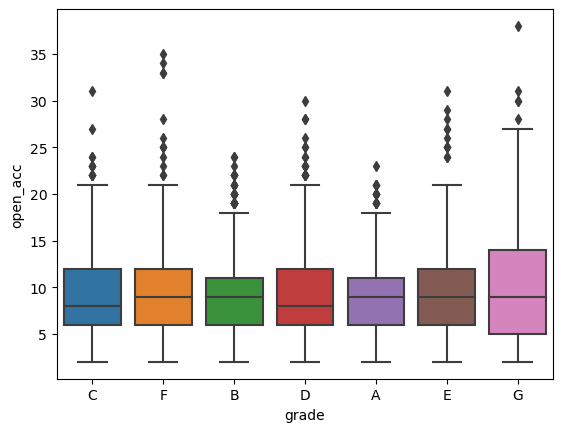

grade pub_rec


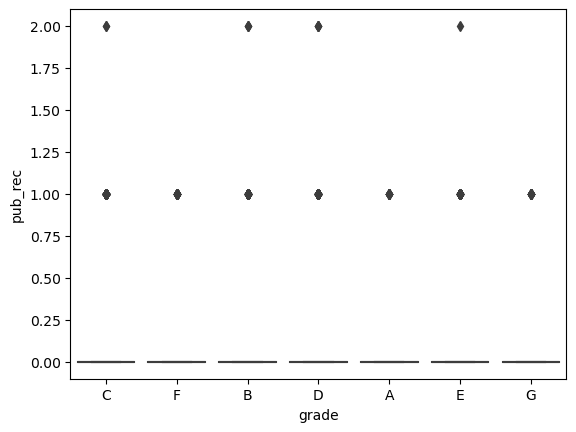

grade pub_rec_bankruptcies


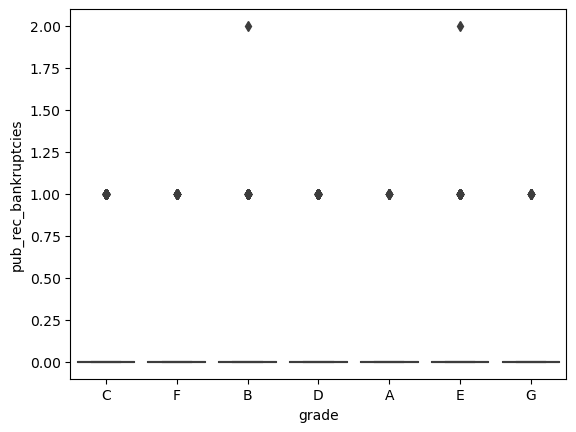

grade total_acc


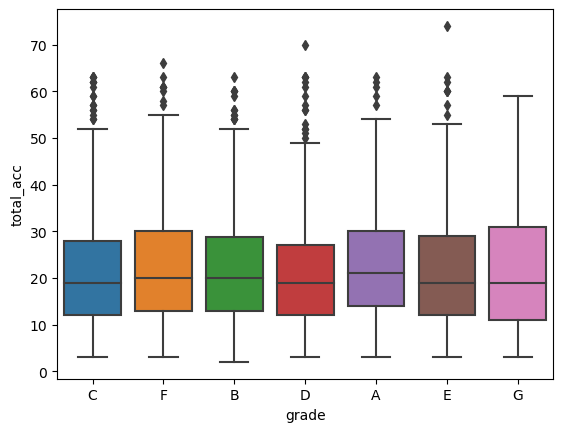

grade mths_since_last_delinq


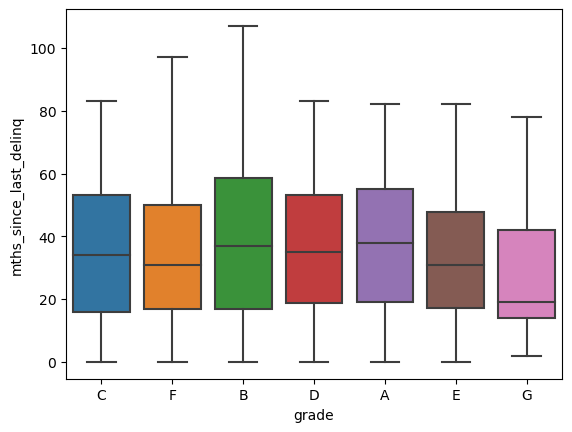

grade delinq_2yrs


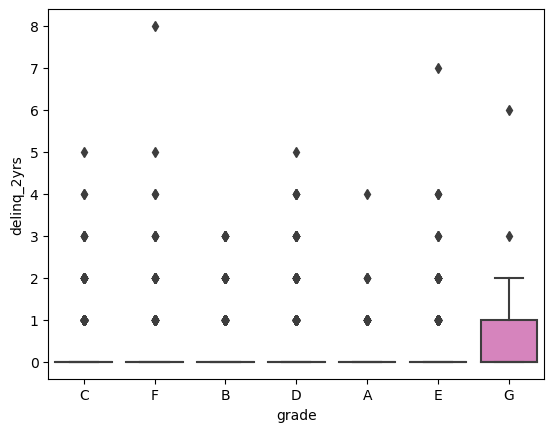

grade revol_bal


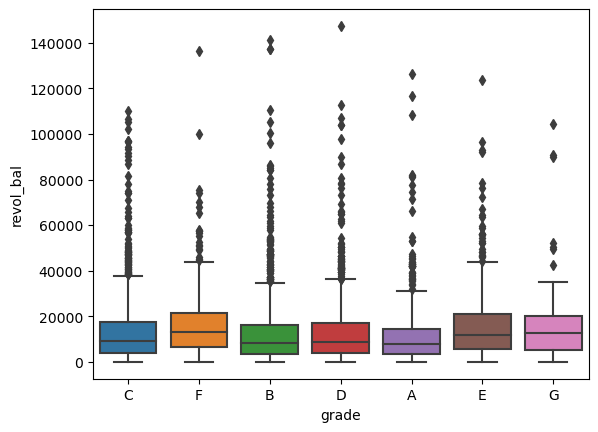

grade revol_util


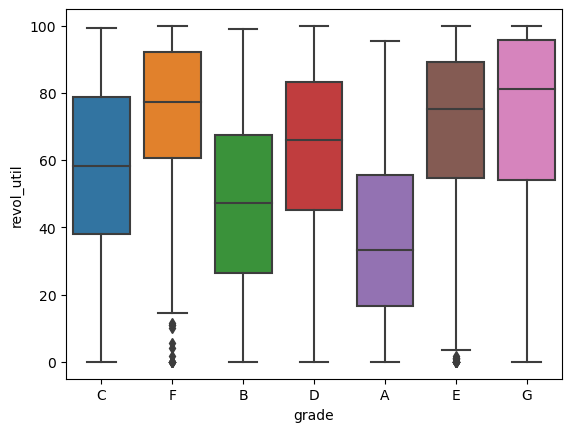

home_ownership annual_inc


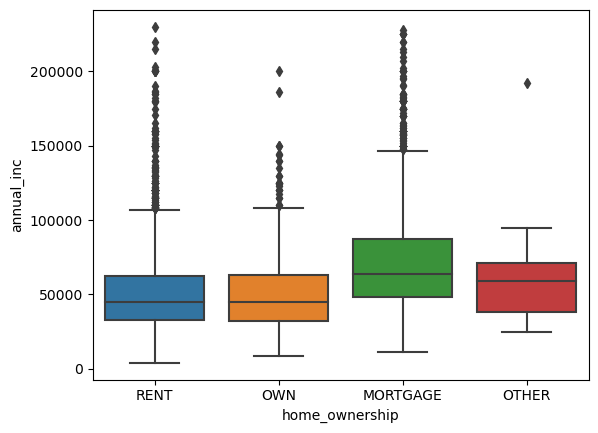

home_ownership dti


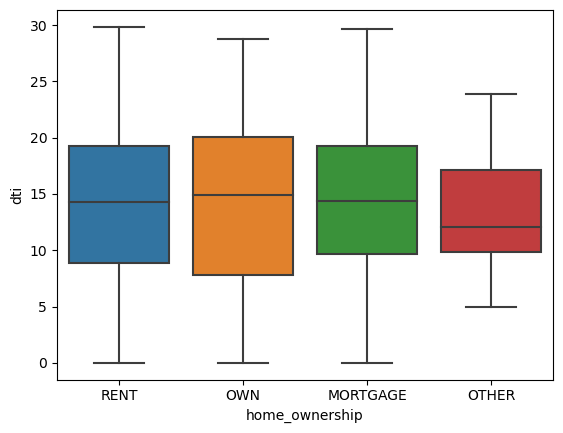

home_ownership int_rate


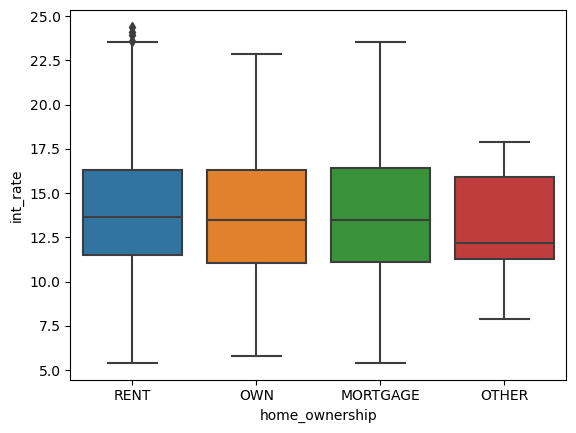

home_ownership funded_amnt


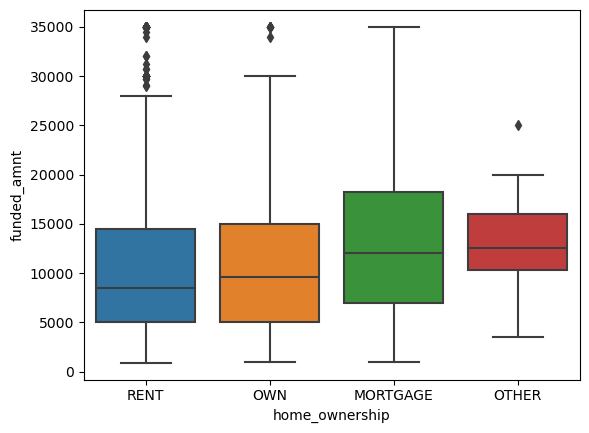

home_ownership funded_amnt_inv


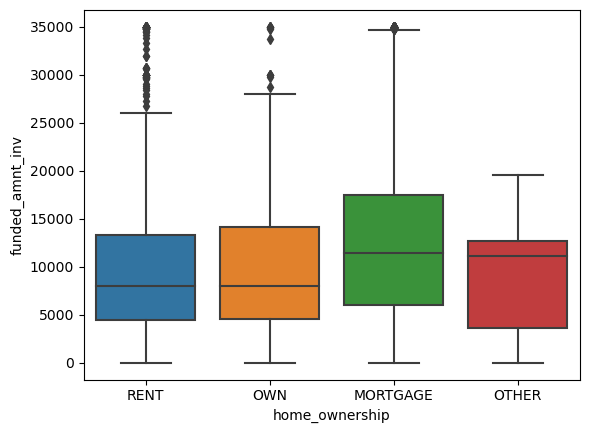

home_ownership inq_last_6mths


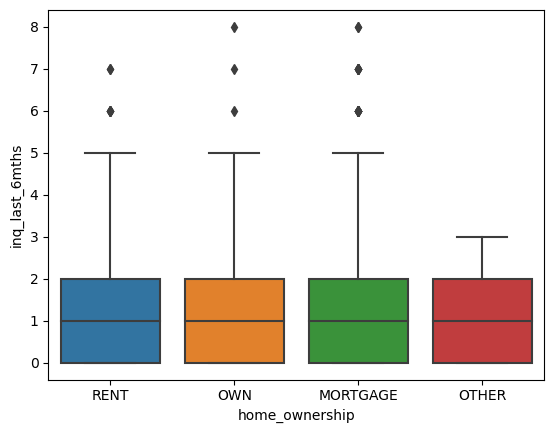

home_ownership installment


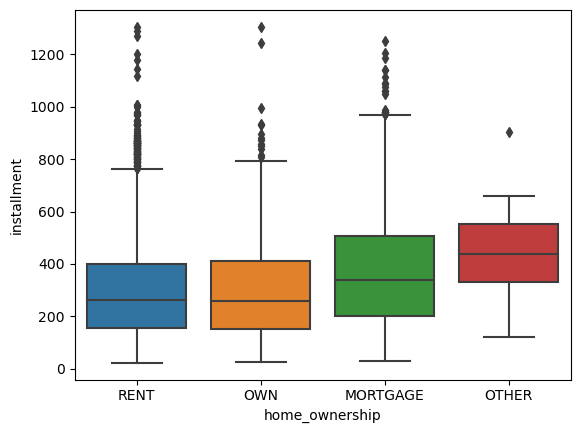

home_ownership loan_amnt


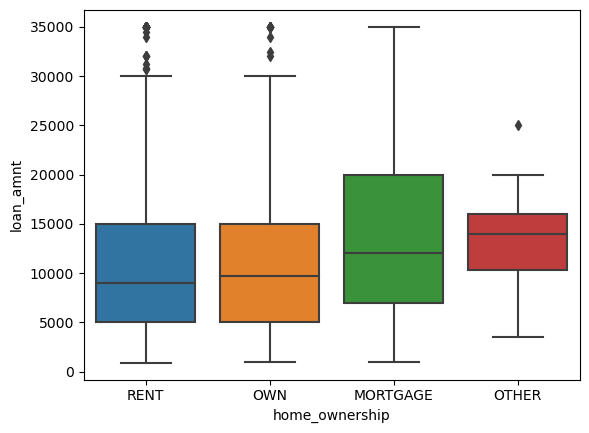

home_ownership open_acc


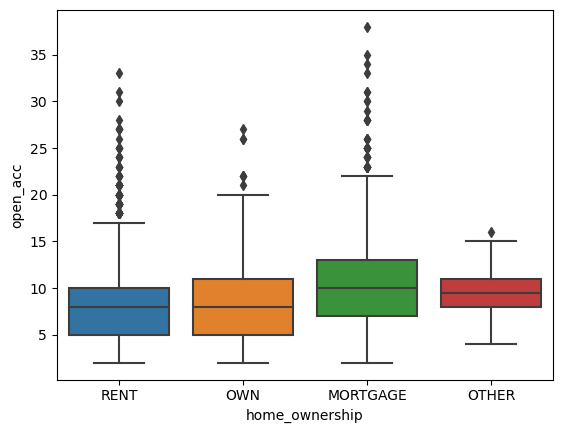

home_ownership pub_rec


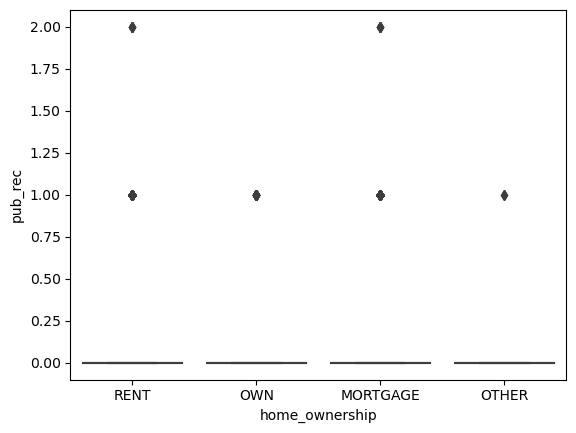

home_ownership pub_rec_bankruptcies


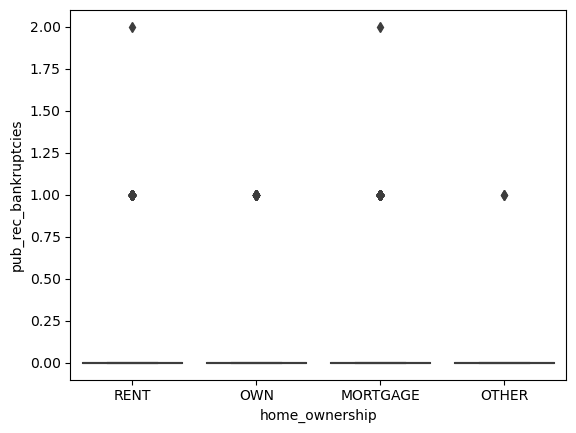

home_ownership total_acc


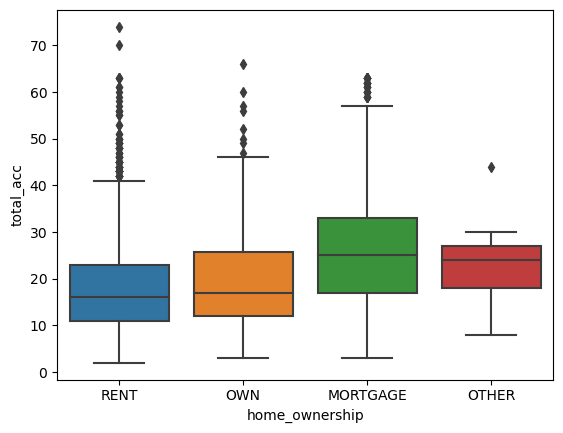

home_ownership mths_since_last_delinq


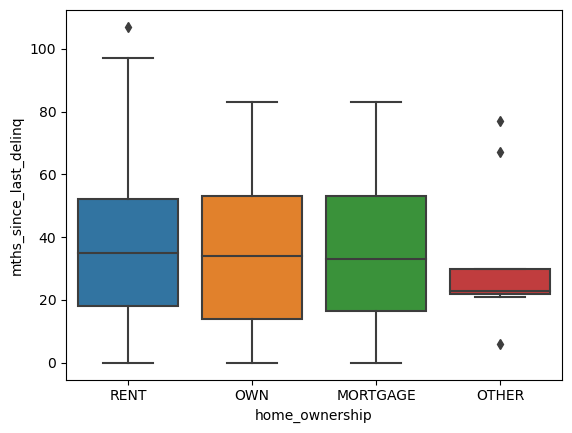

home_ownership delinq_2yrs


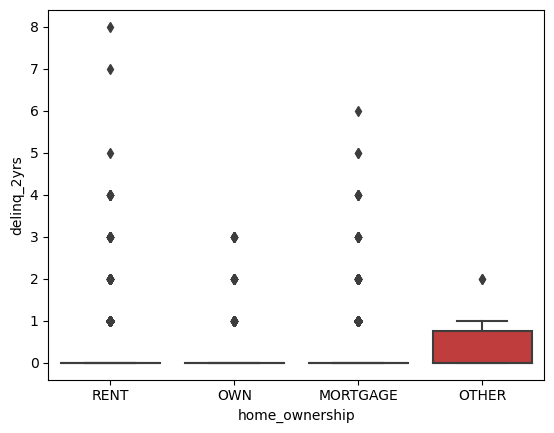

home_ownership revol_bal


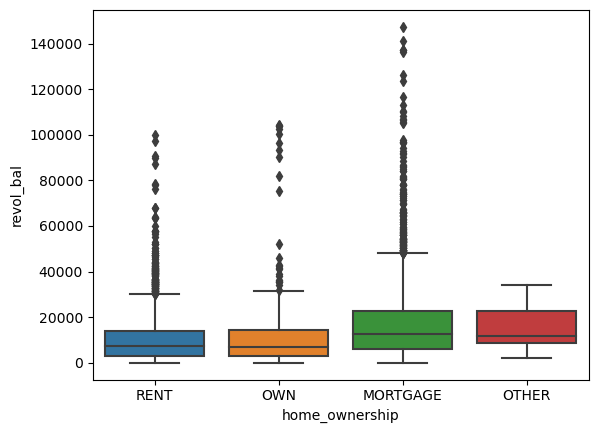

home_ownership revol_util


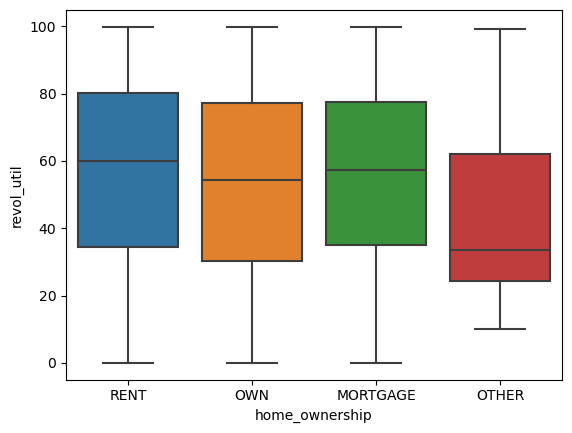

emp_length annual_inc


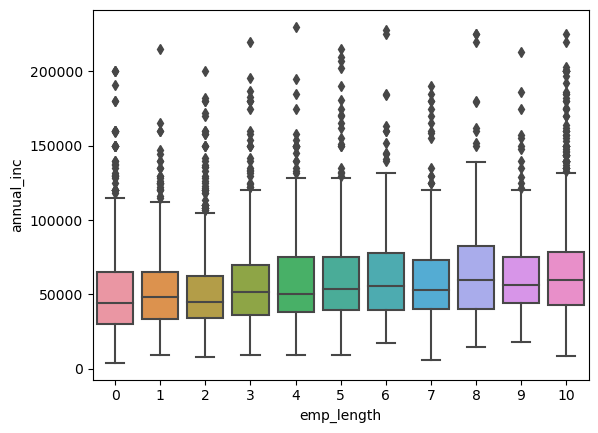

emp_length dti


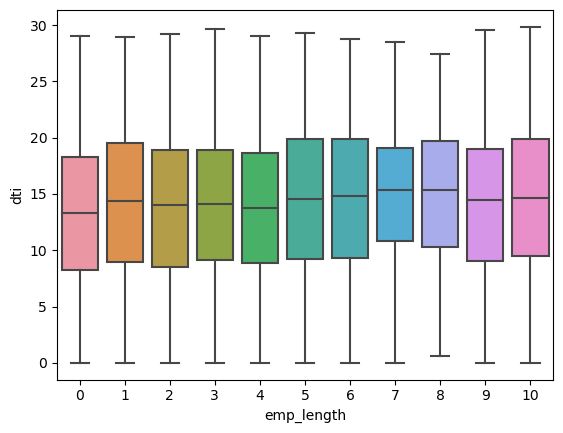

emp_length int_rate


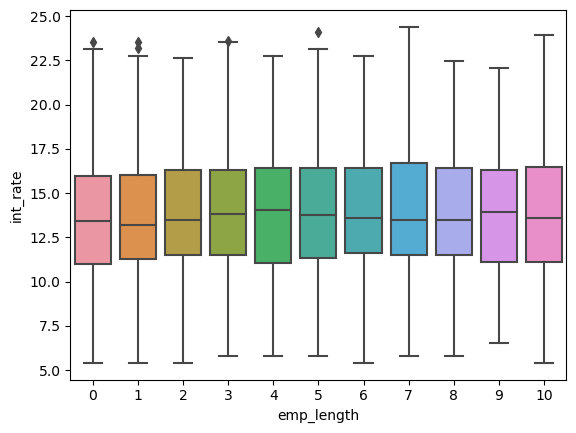

emp_length funded_amnt


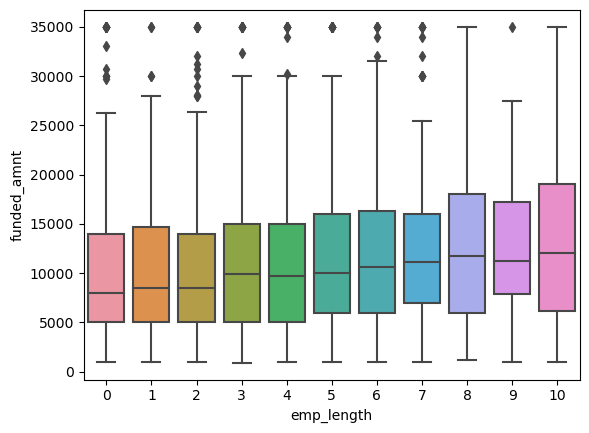

emp_length funded_amnt_inv


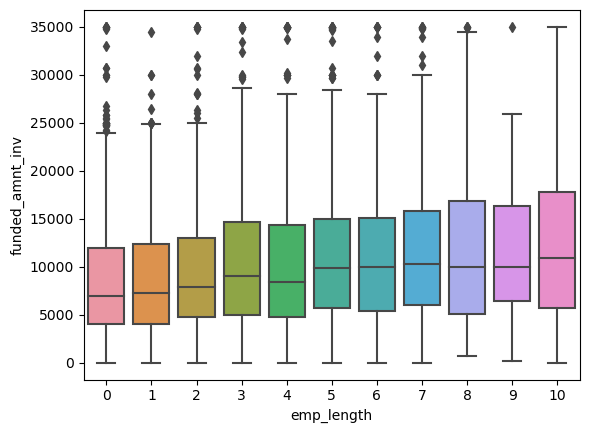

emp_length inq_last_6mths


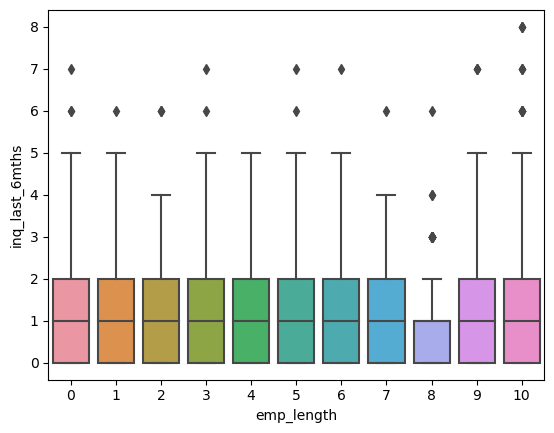

emp_length installment


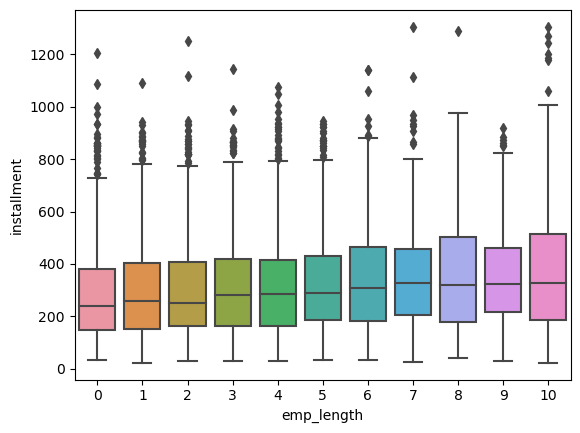

emp_length loan_amnt


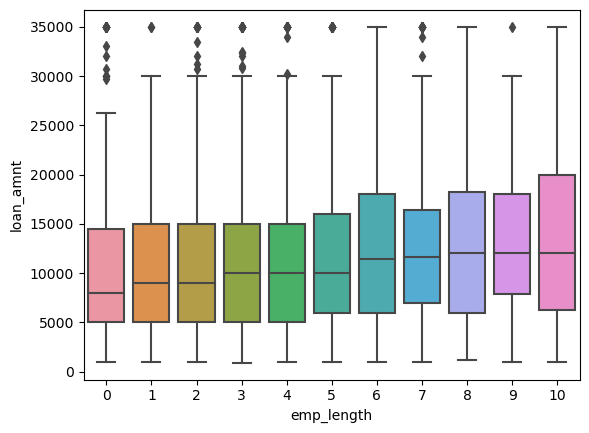

emp_length open_acc


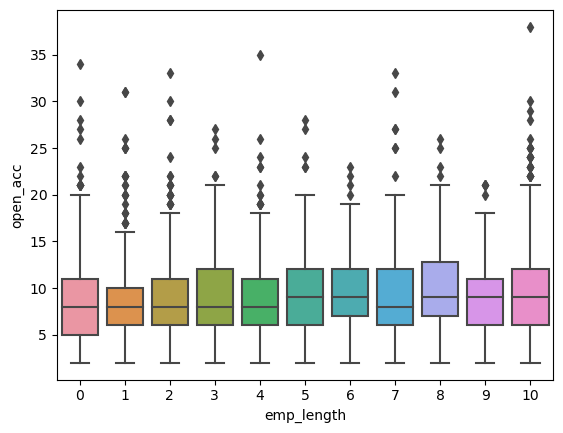

emp_length pub_rec


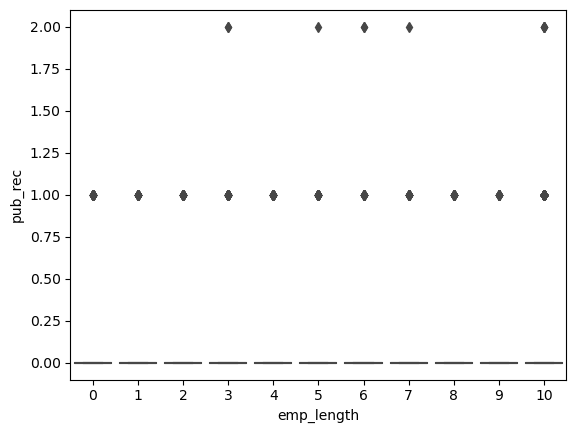

emp_length pub_rec_bankruptcies


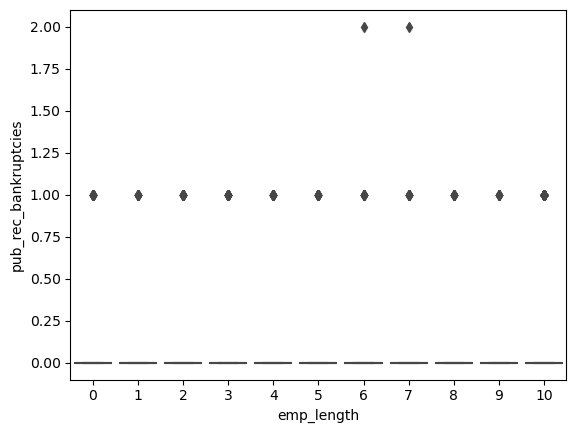

emp_length total_acc


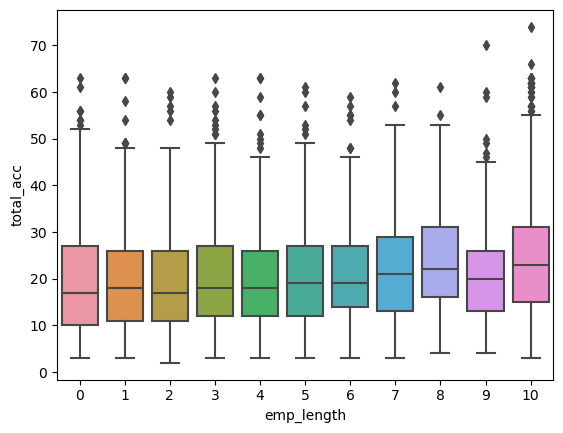

emp_length mths_since_last_delinq


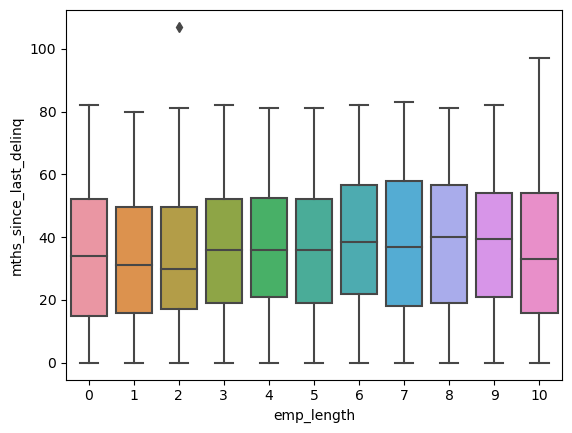

emp_length delinq_2yrs


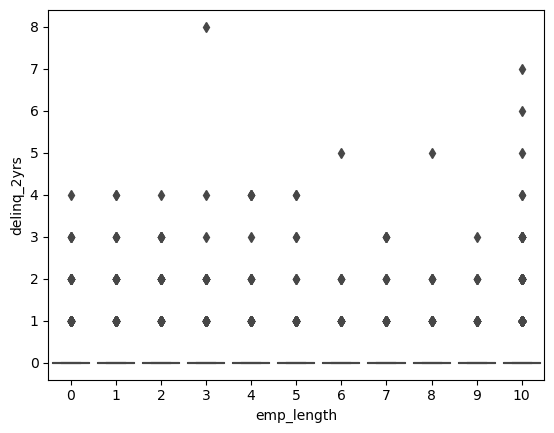

emp_length revol_bal


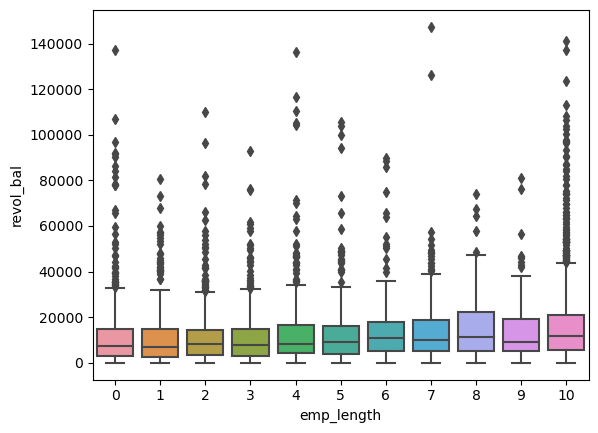

emp_length revol_util


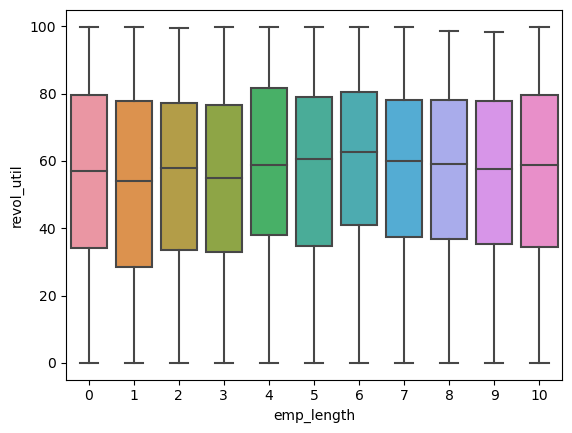

loan_status annual_inc


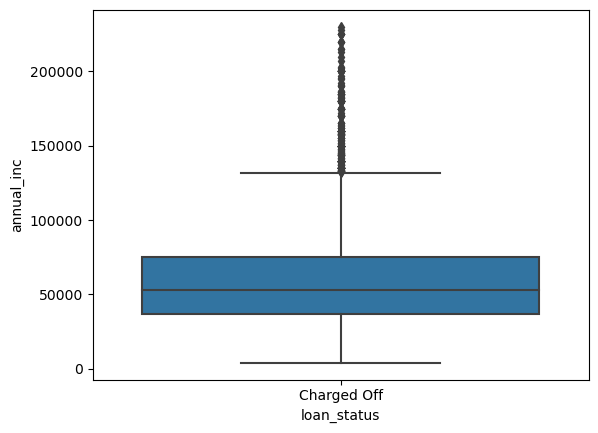

loan_status dti


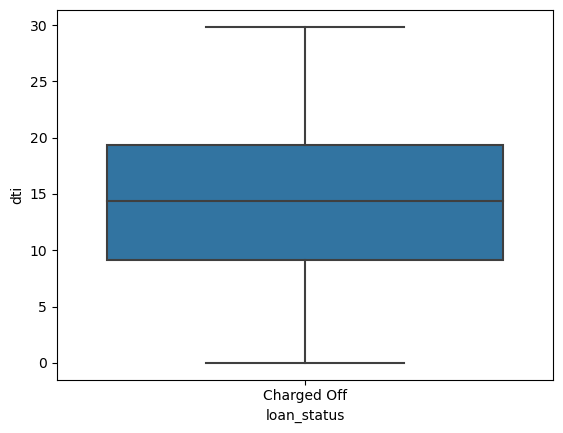

loan_status int_rate


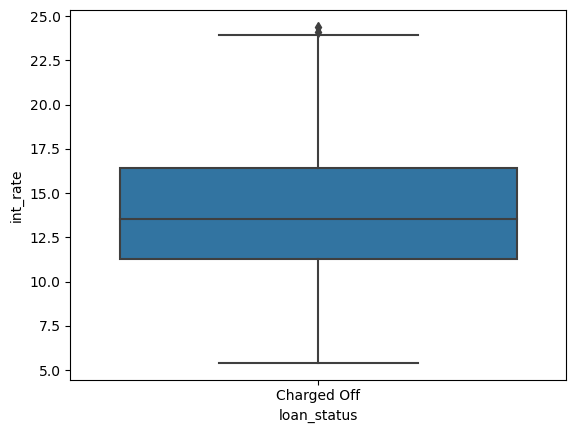

loan_status funded_amnt


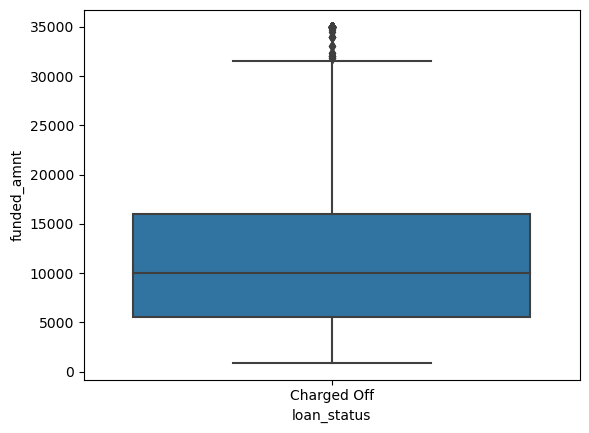

loan_status funded_amnt_inv


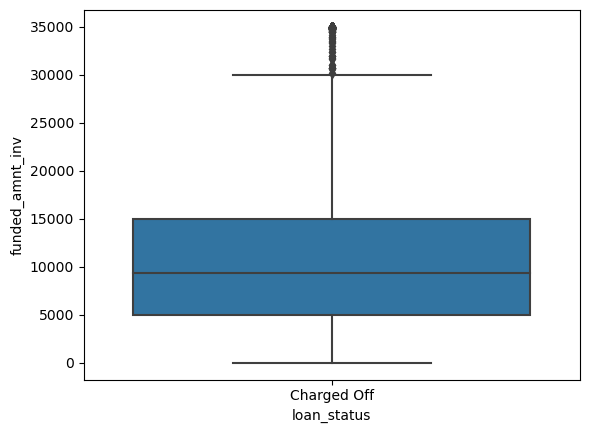

loan_status inq_last_6mths


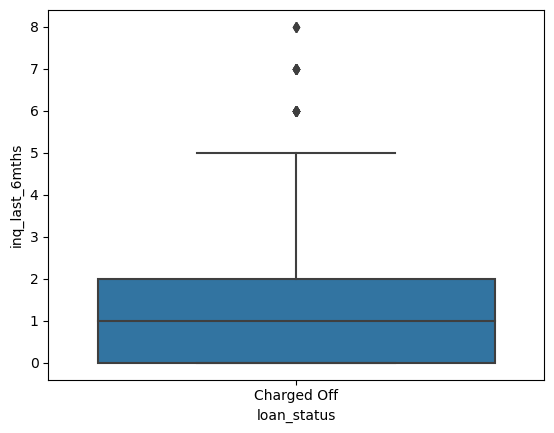

loan_status installment


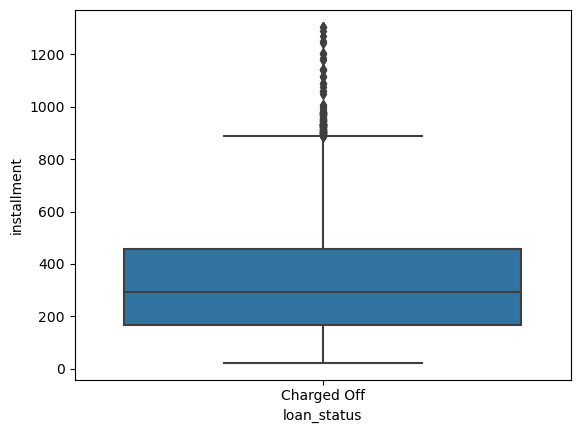

loan_status loan_amnt


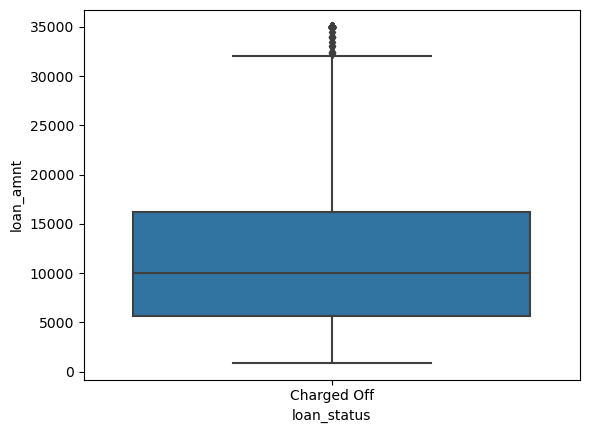

loan_status open_acc


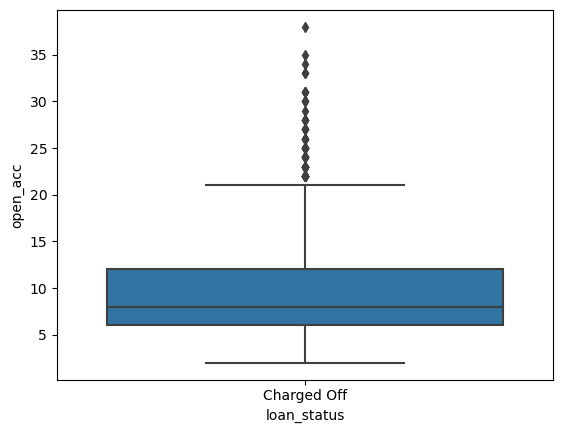

loan_status pub_rec


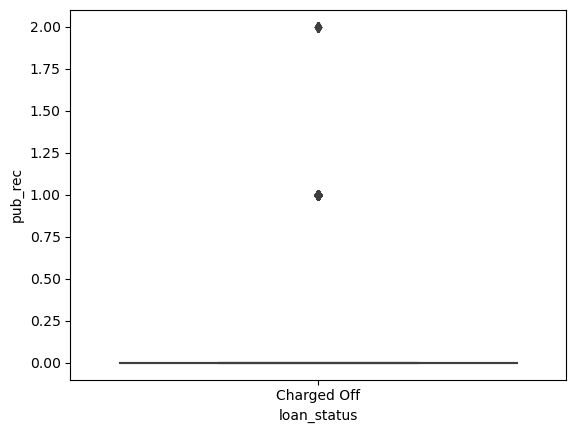

loan_status pub_rec_bankruptcies


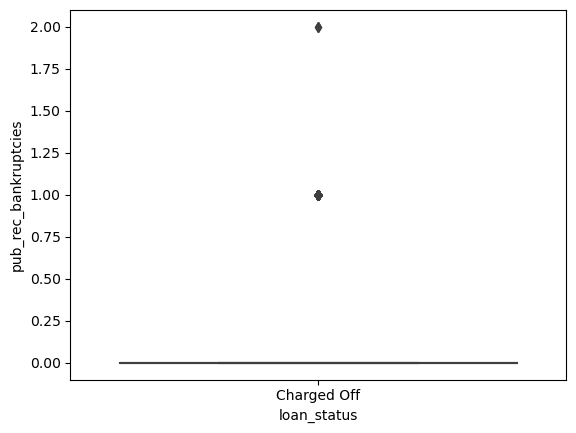

loan_status total_acc


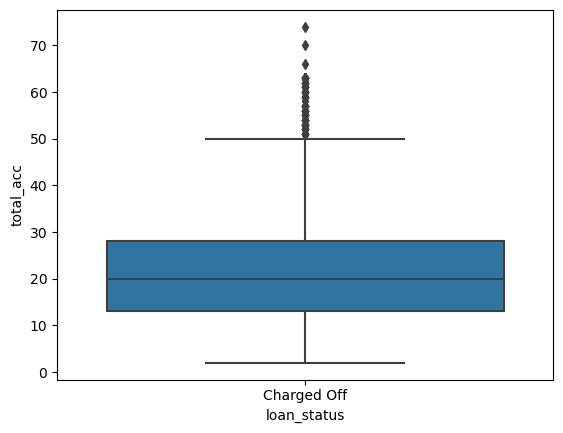

loan_status mths_since_last_delinq


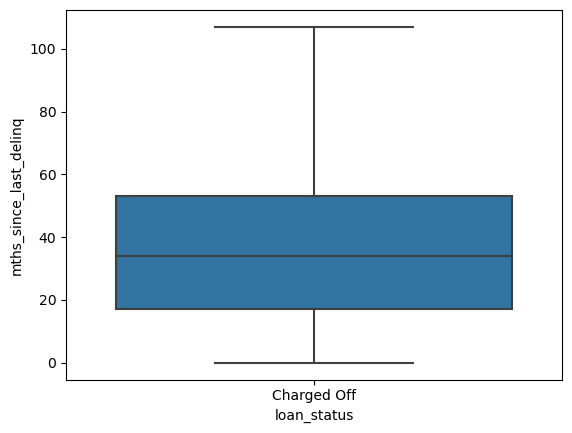

loan_status delinq_2yrs


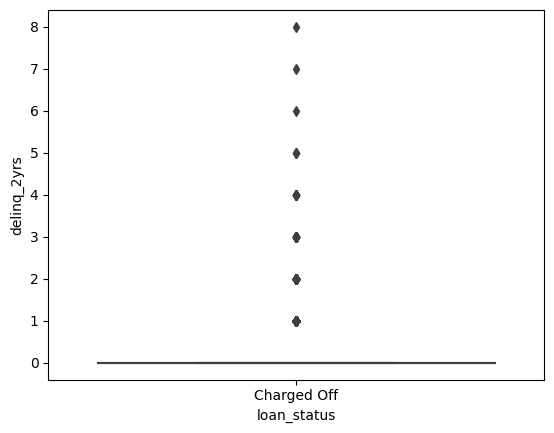

loan_status revol_bal


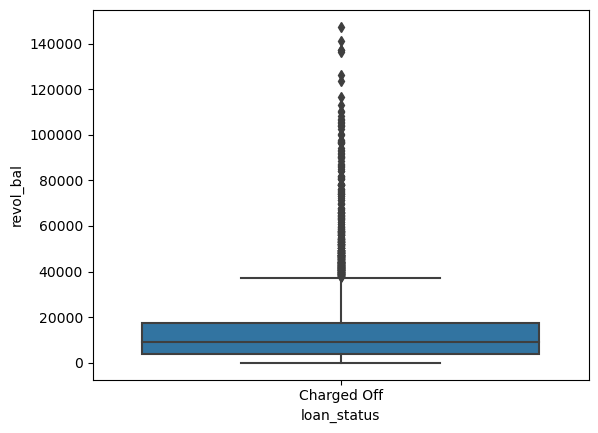

loan_status revol_util


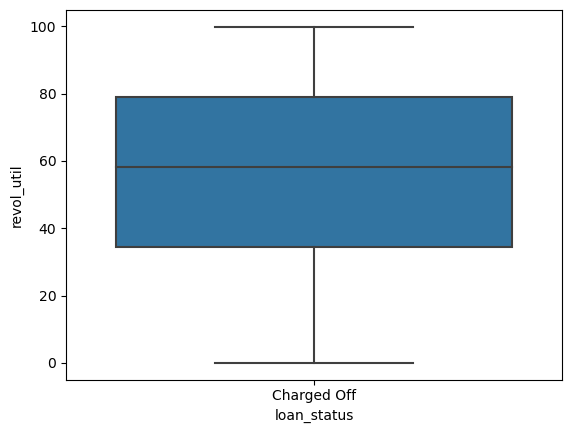

purpose annual_inc


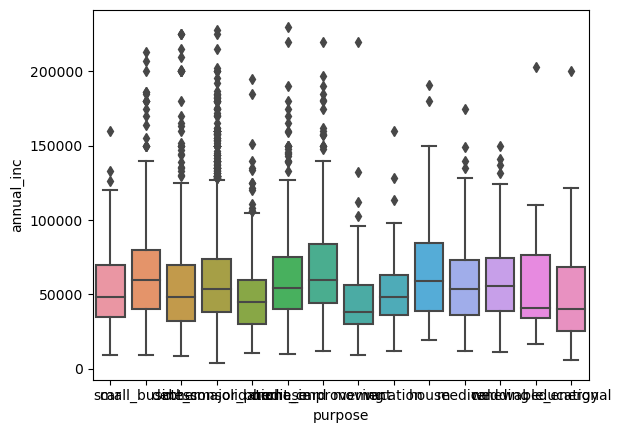

purpose dti


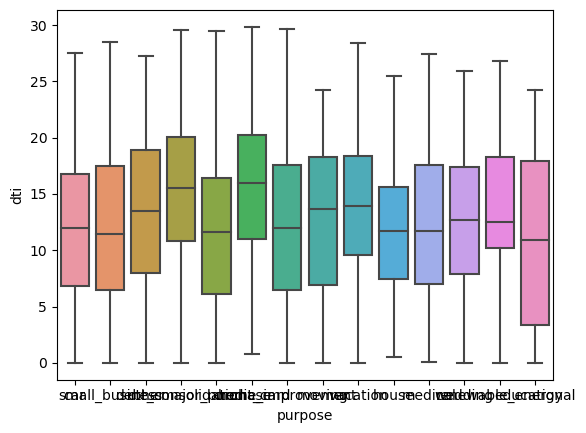

purpose int_rate


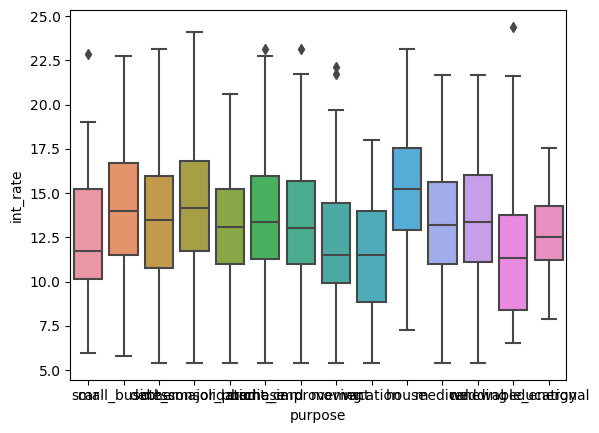

purpose funded_amnt


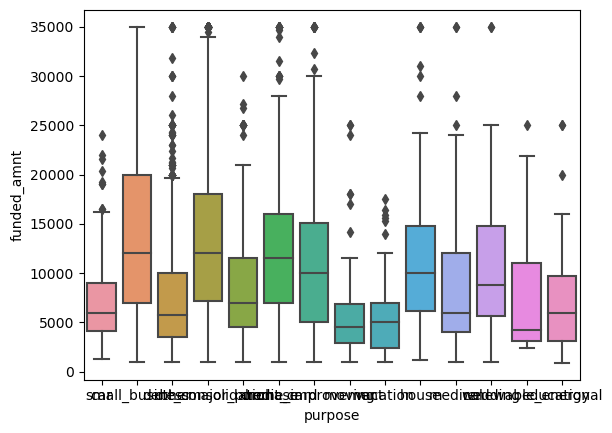

purpose funded_amnt_inv


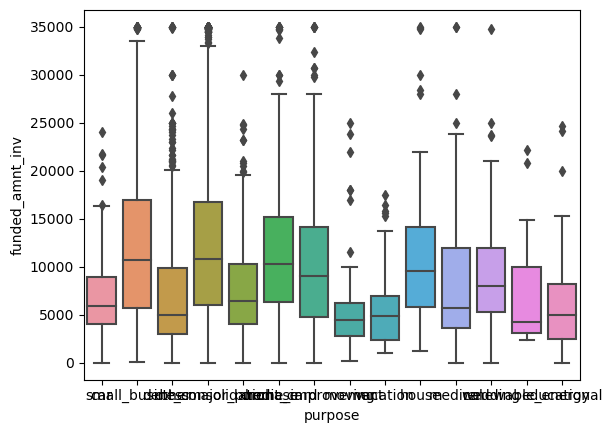

purpose inq_last_6mths


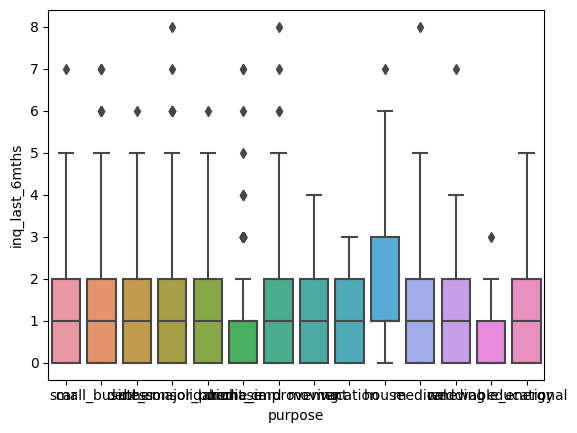

purpose installment


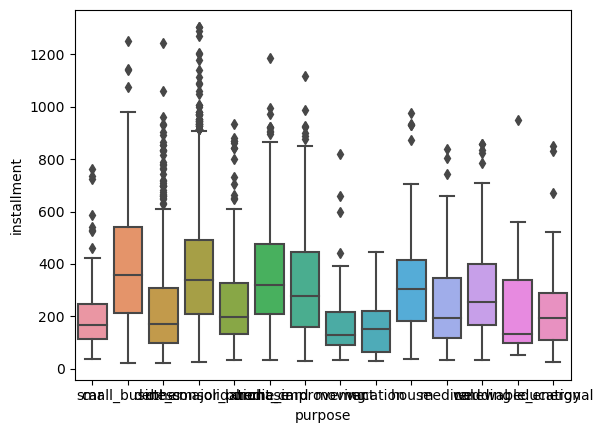

purpose loan_amnt


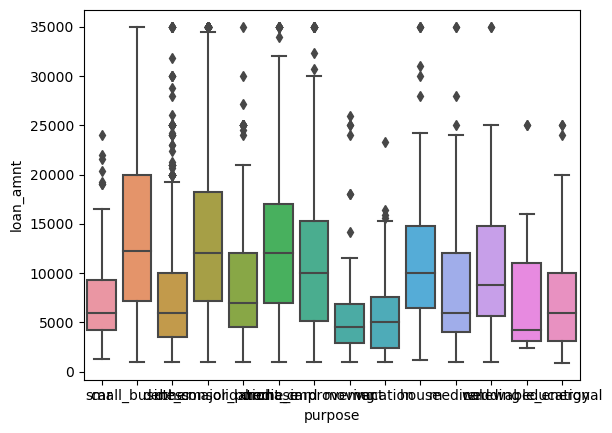

purpose open_acc


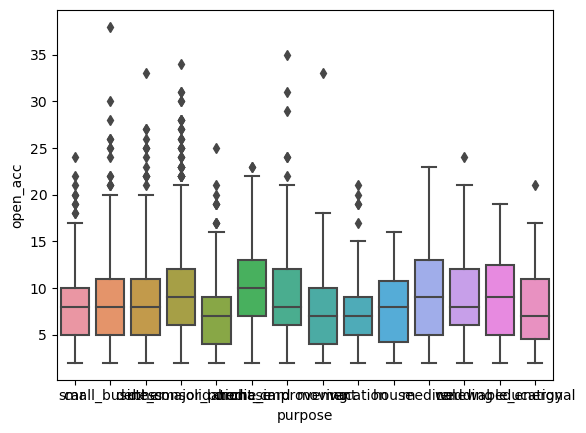

purpose pub_rec


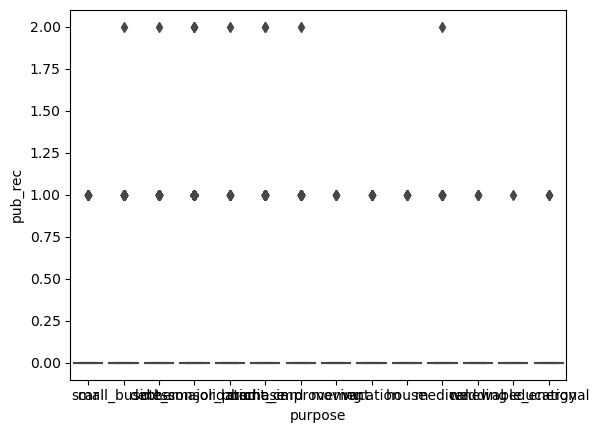

purpose pub_rec_bankruptcies


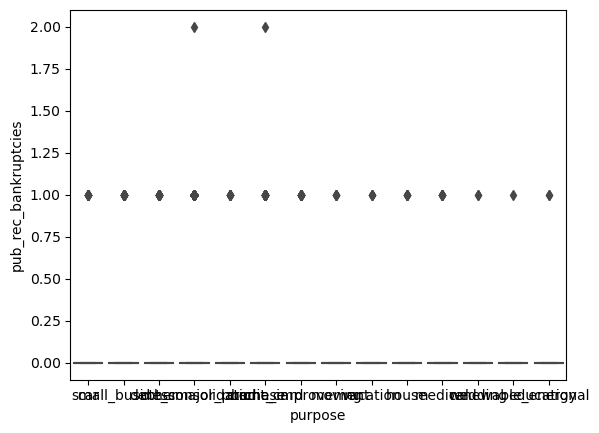

purpose total_acc


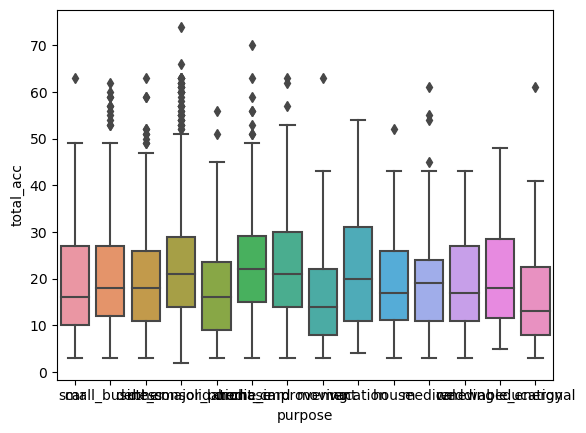

purpose mths_since_last_delinq


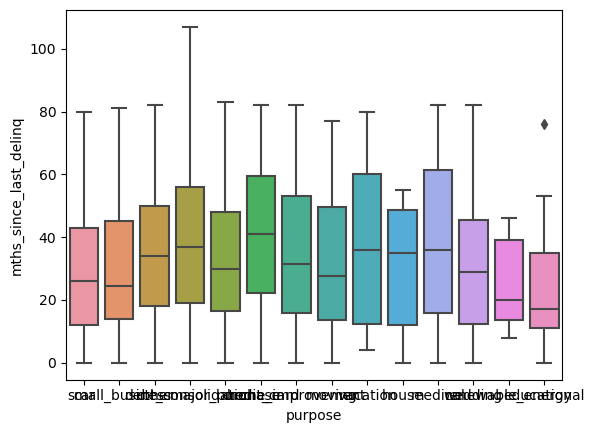

purpose delinq_2yrs


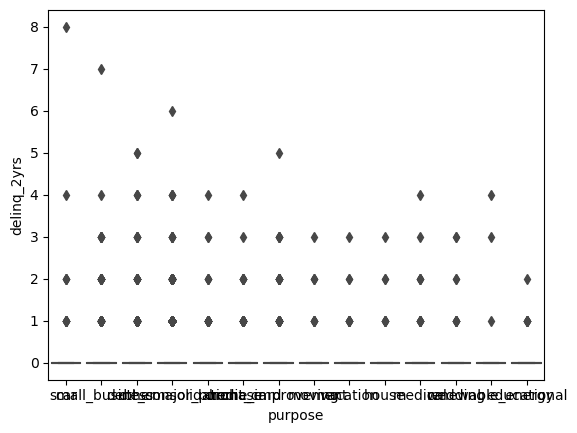

purpose revol_bal


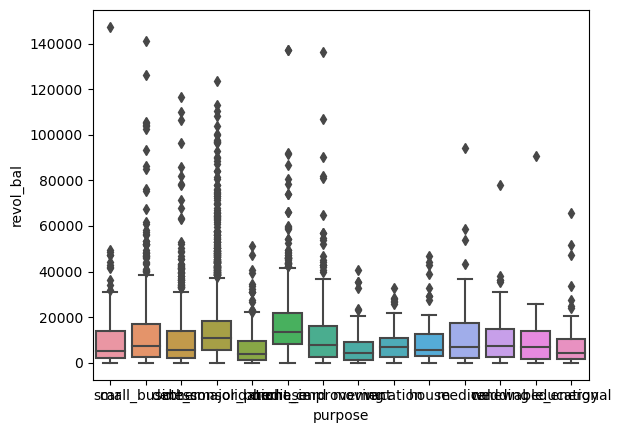

purpose revol_util


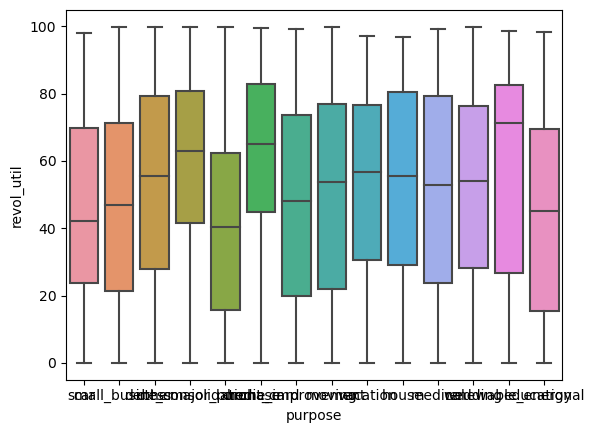

term annual_inc


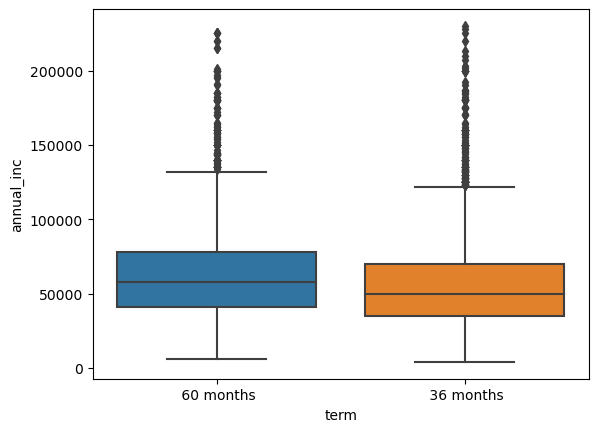

term dti


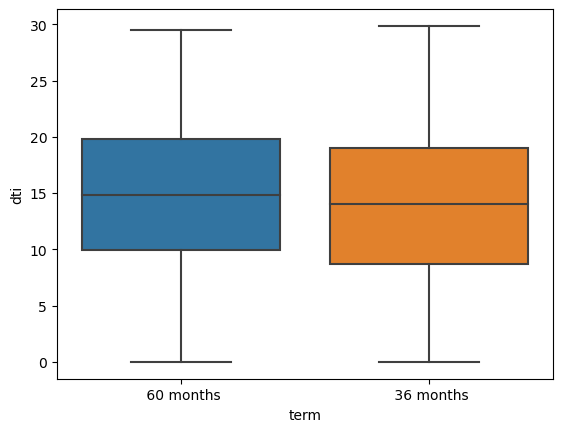

term int_rate


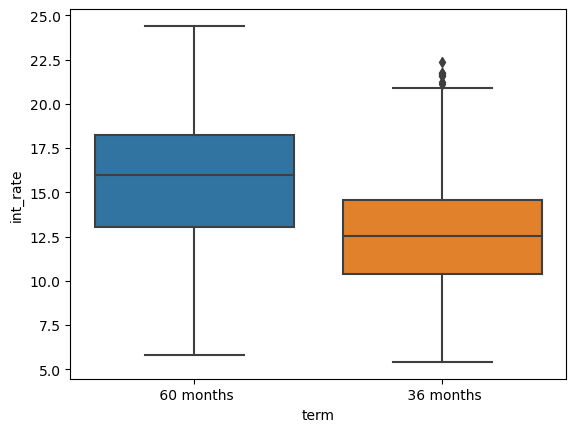

term funded_amnt


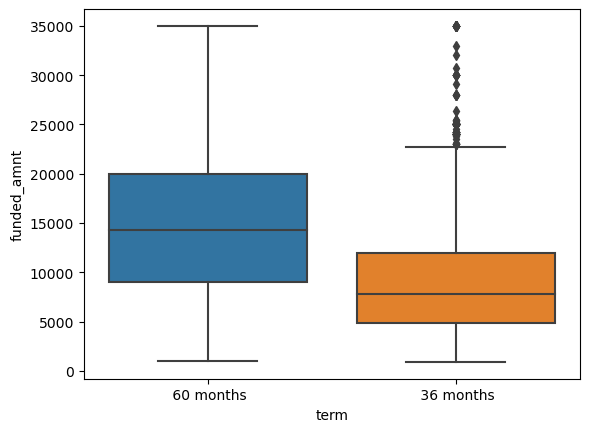

term funded_amnt_inv


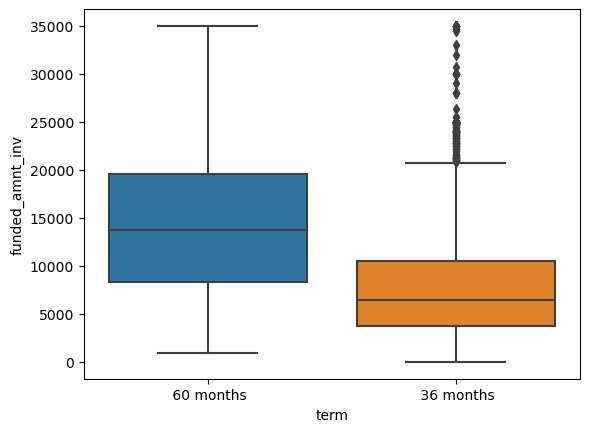

term inq_last_6mths


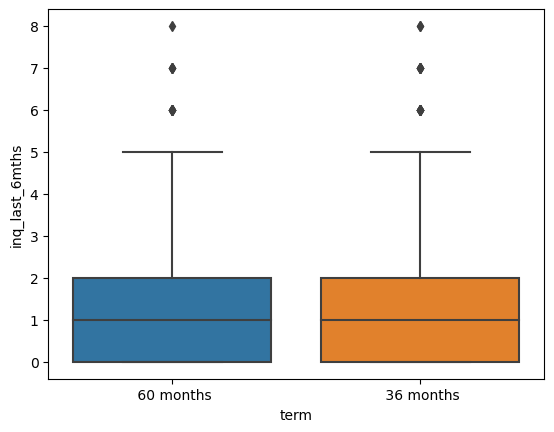

term installment


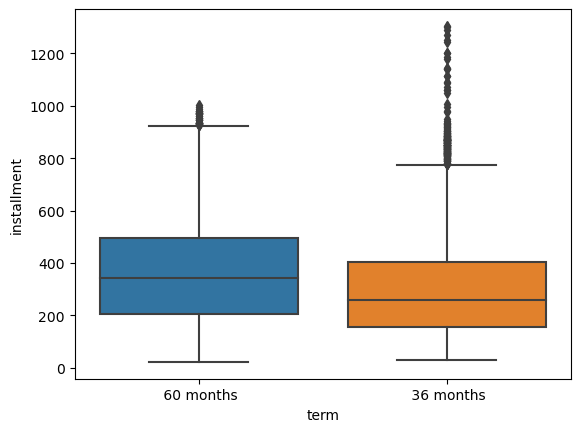

term loan_amnt


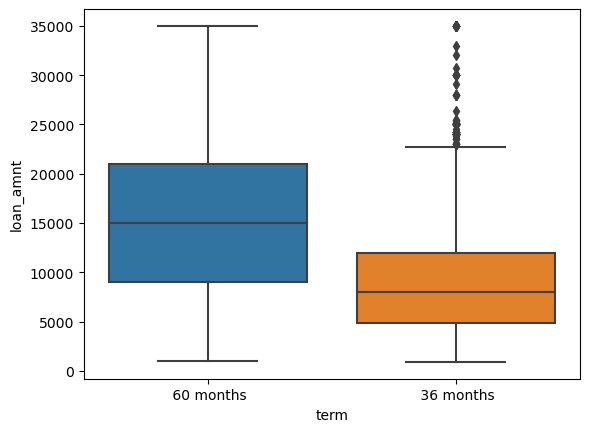

term open_acc


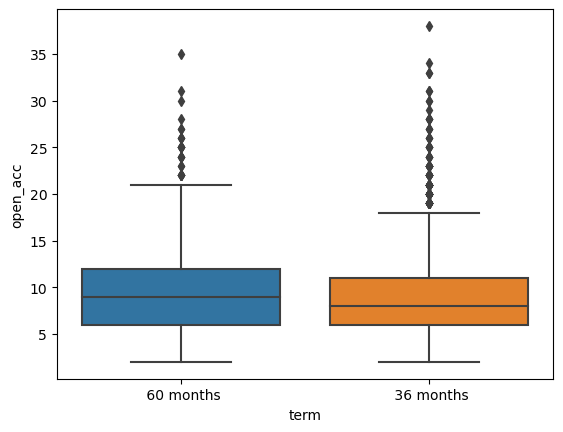

term pub_rec


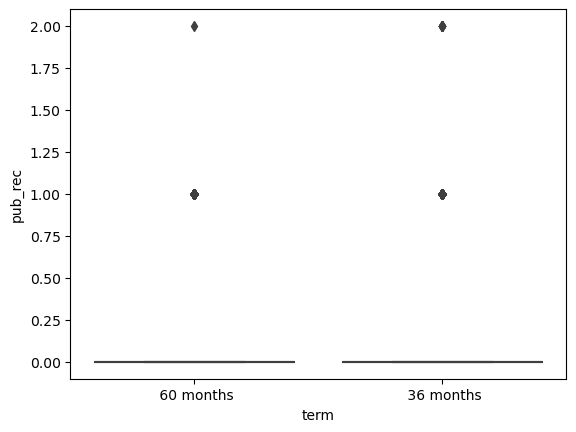

term pub_rec_bankruptcies


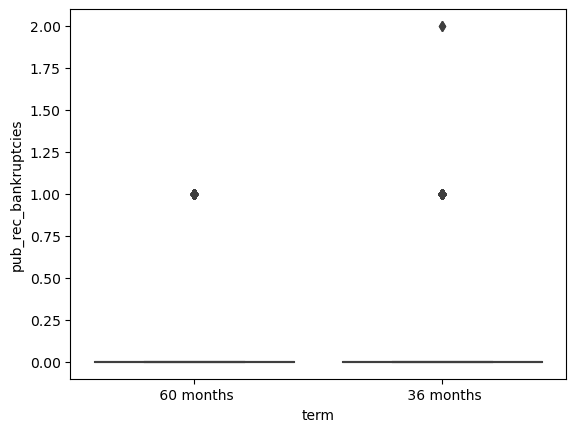

term total_acc


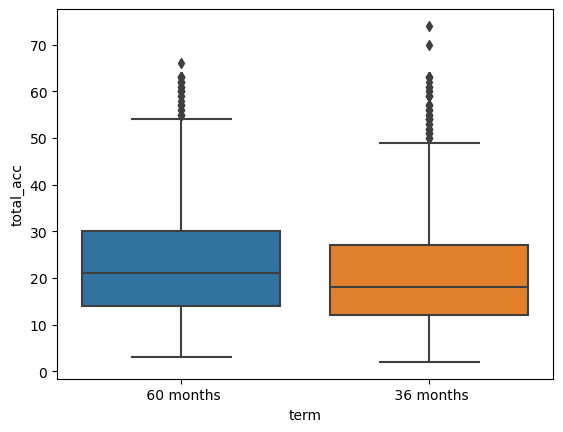

term mths_since_last_delinq


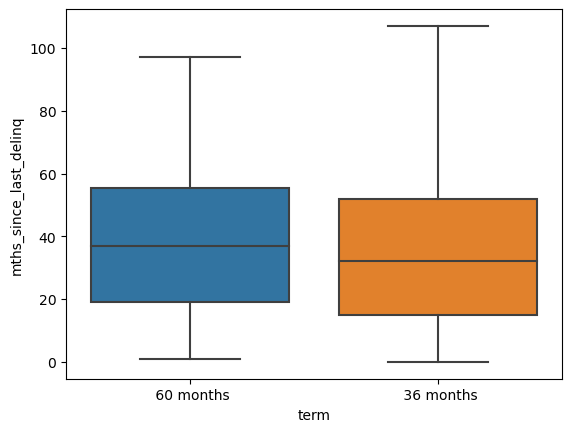

term delinq_2yrs


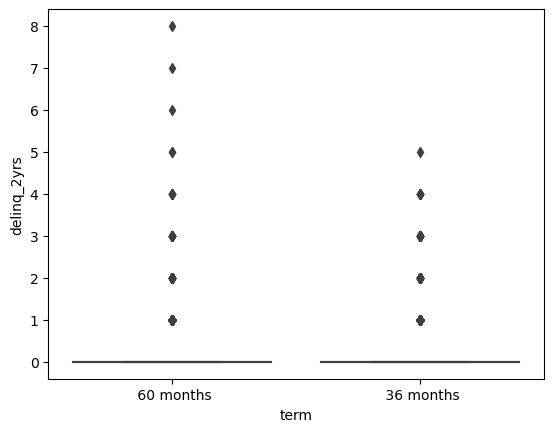

term revol_bal


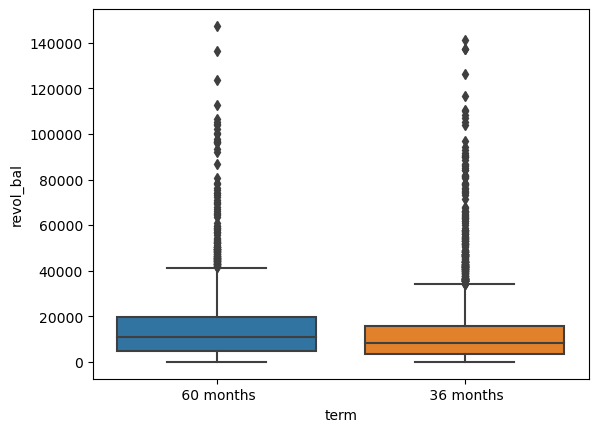

term revol_util


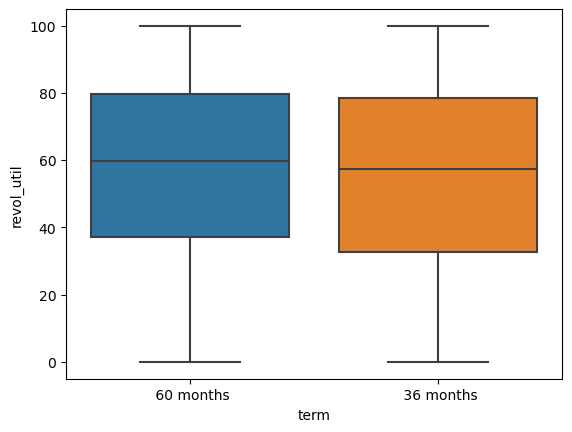

verification_status annual_inc


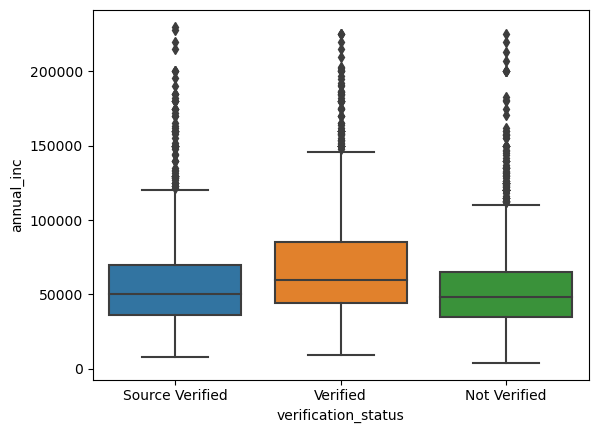

verification_status dti


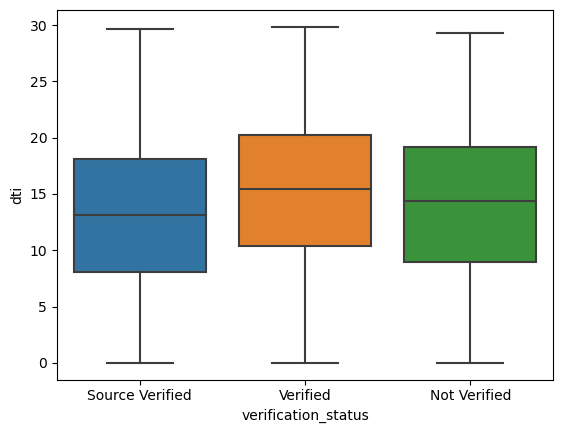

verification_status int_rate


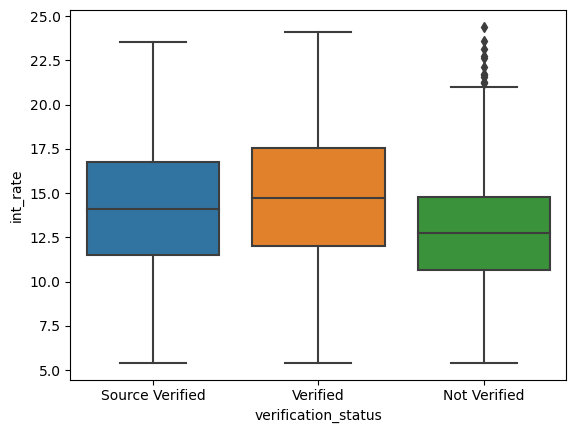

verification_status funded_amnt


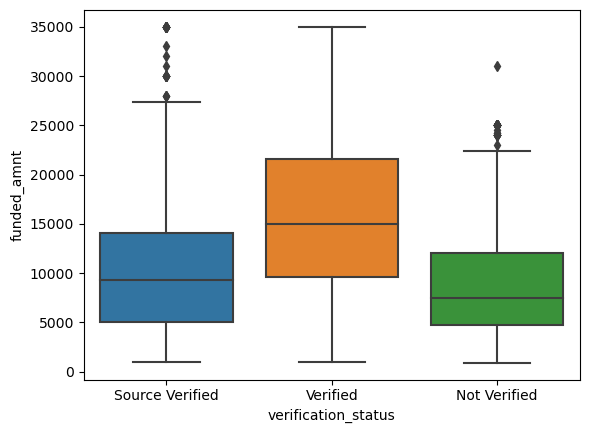

verification_status funded_amnt_inv


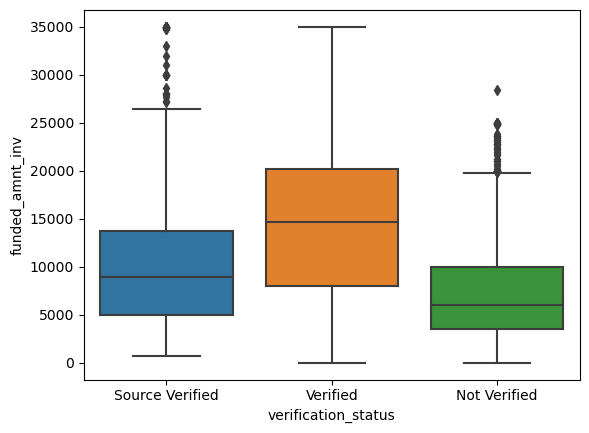

verification_status inq_last_6mths


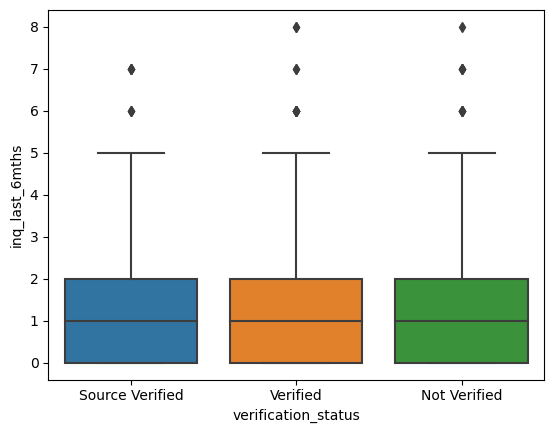

verification_status installment


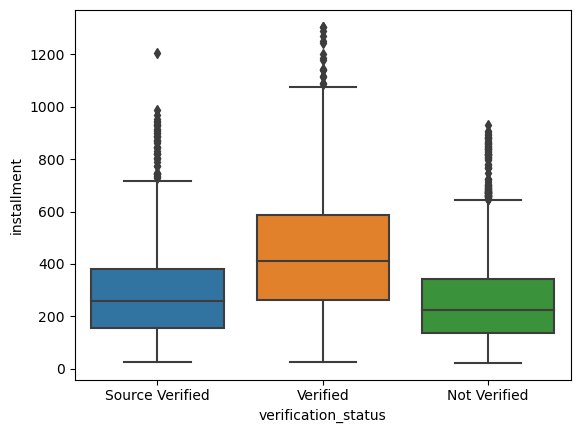

verification_status loan_amnt


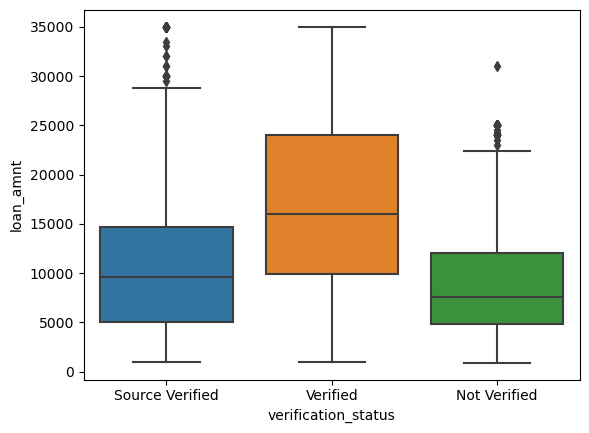

verification_status open_acc


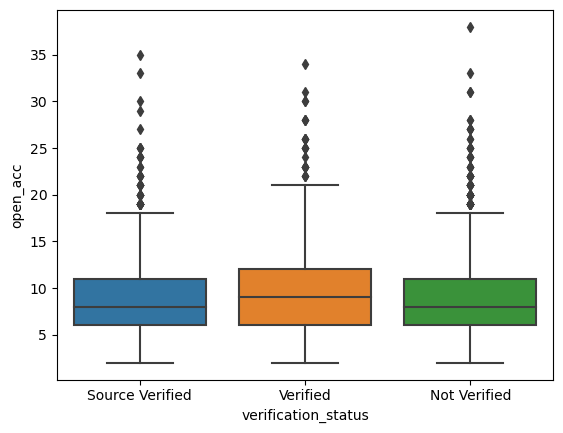

verification_status pub_rec


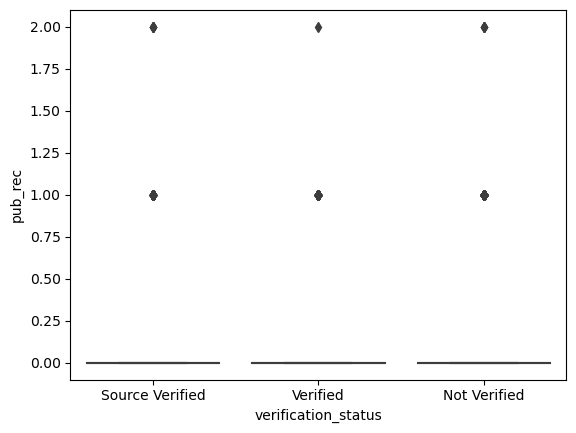

verification_status pub_rec_bankruptcies


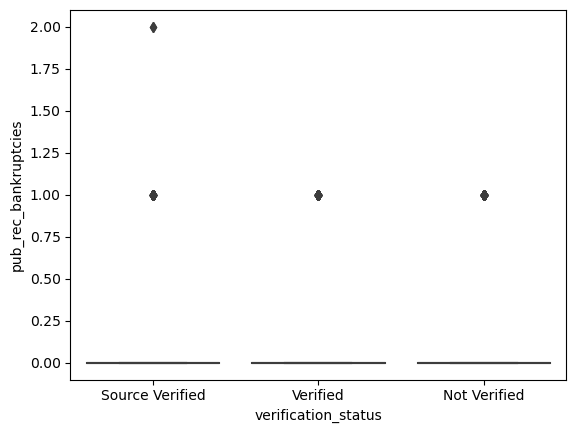

verification_status total_acc


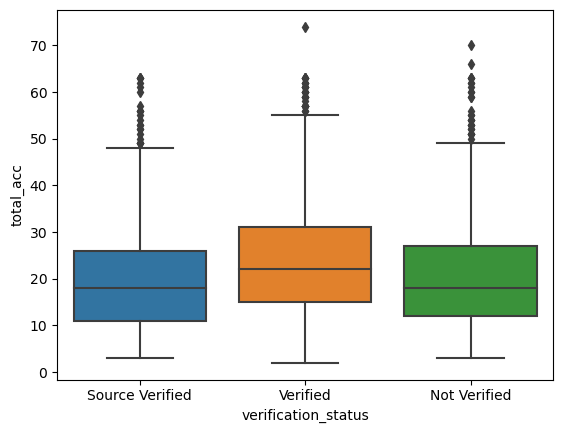

verification_status mths_since_last_delinq


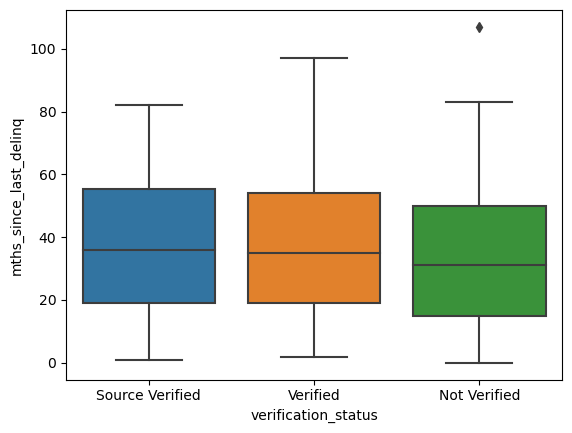

verification_status delinq_2yrs


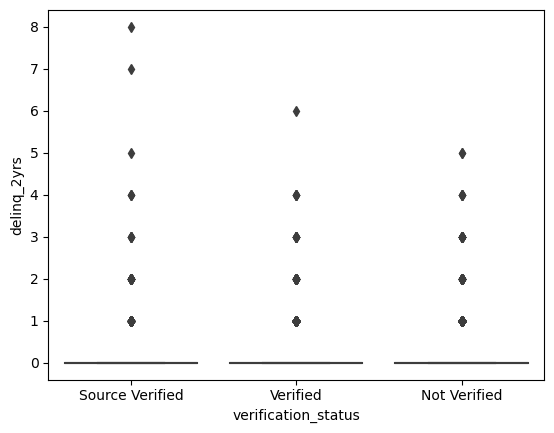

verification_status revol_bal


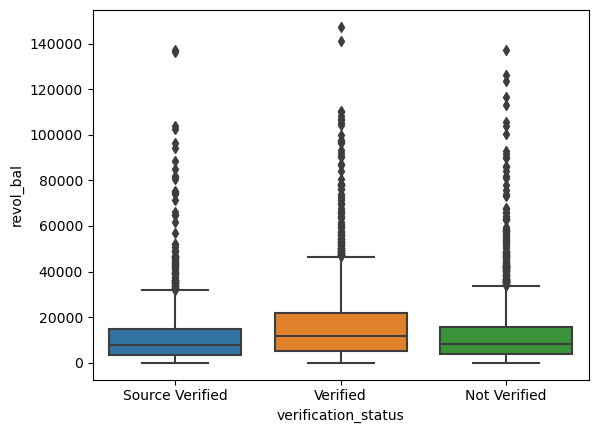

verification_status revol_util


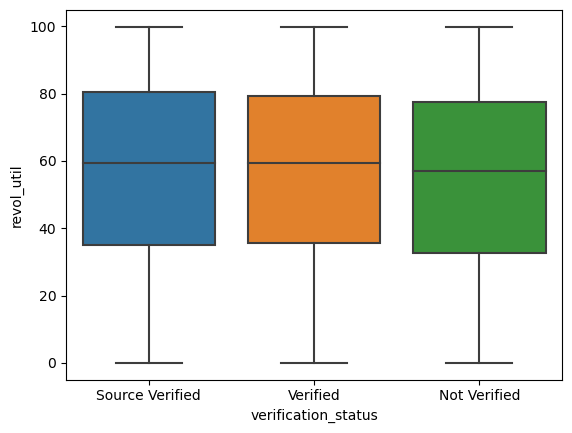

issue_m annual_inc


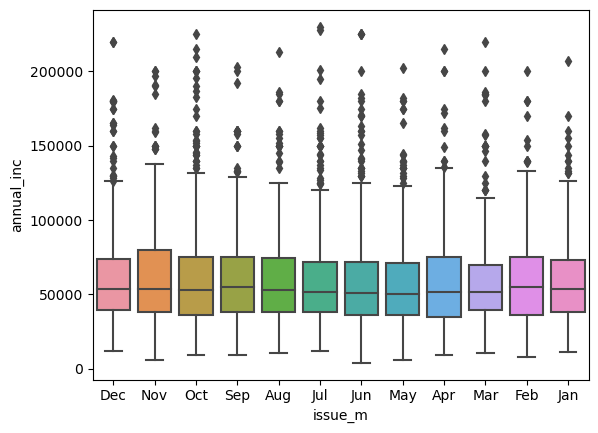

issue_m dti


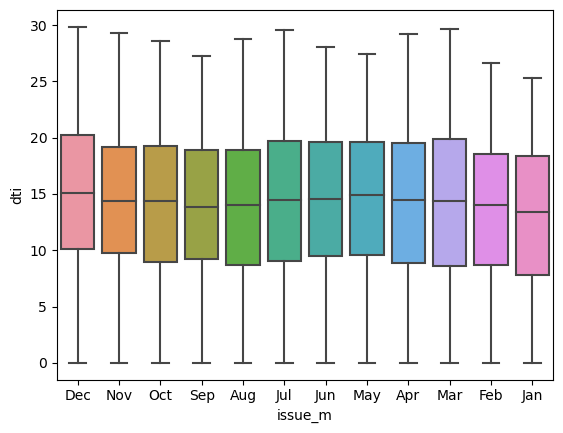

issue_m int_rate


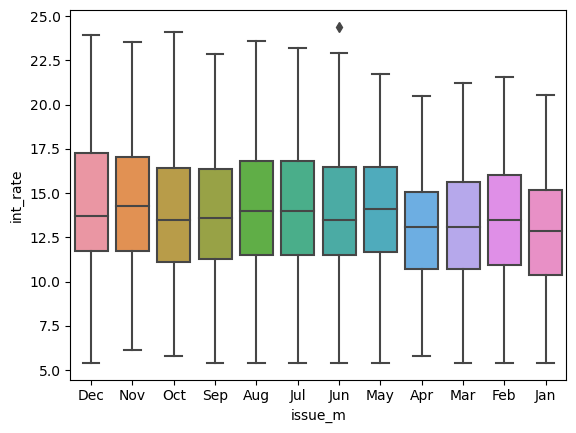

issue_m funded_amnt


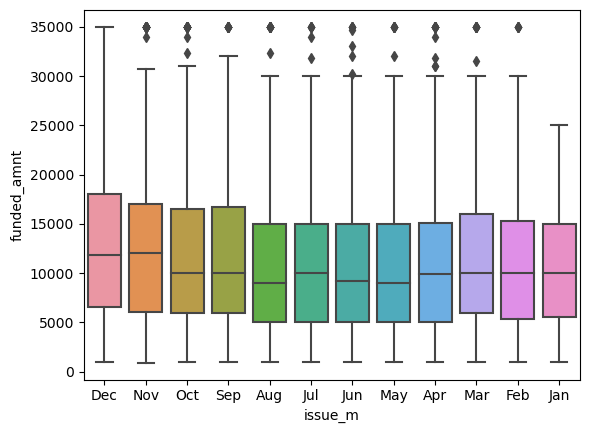

issue_m funded_amnt_inv


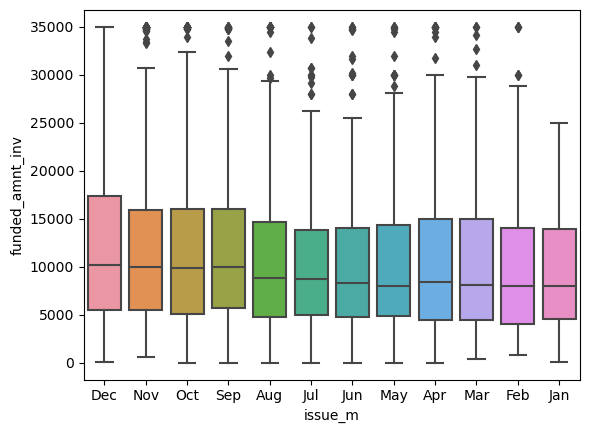

issue_m inq_last_6mths


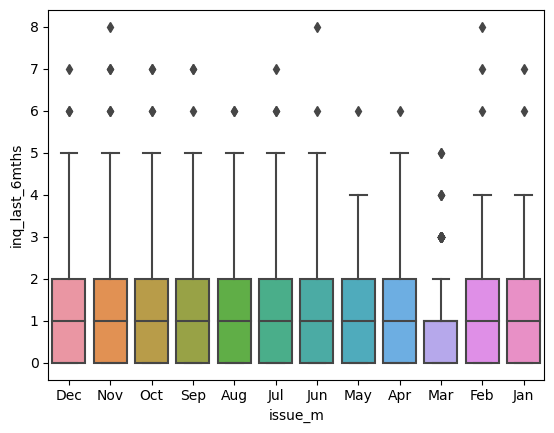

issue_m installment


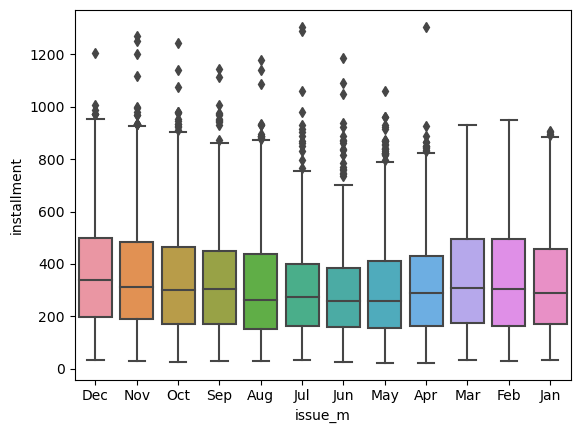

issue_m loan_amnt


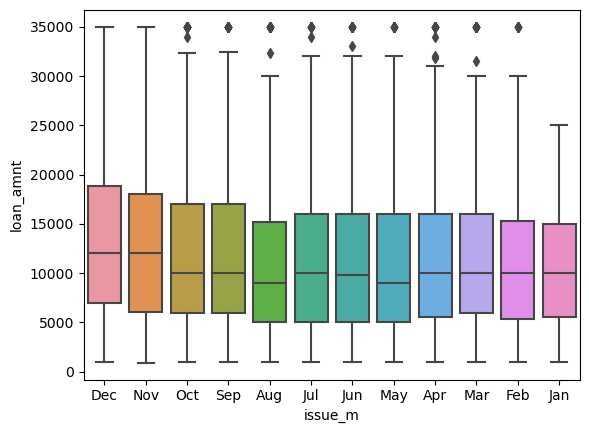

issue_m open_acc


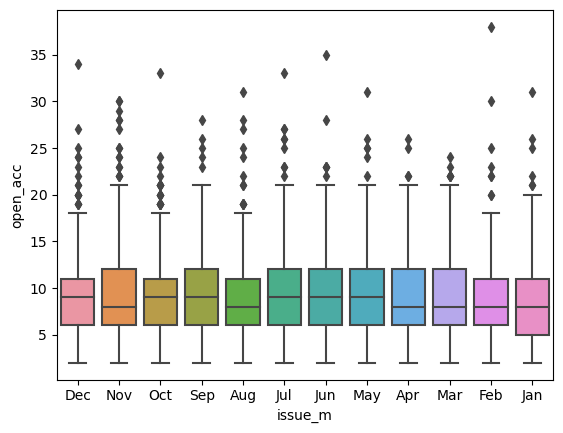

issue_m pub_rec


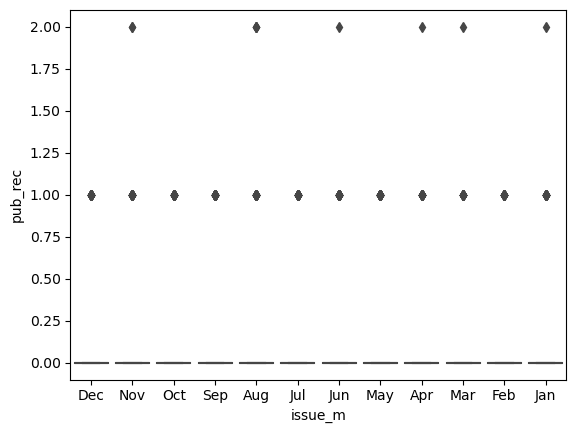

issue_m pub_rec_bankruptcies


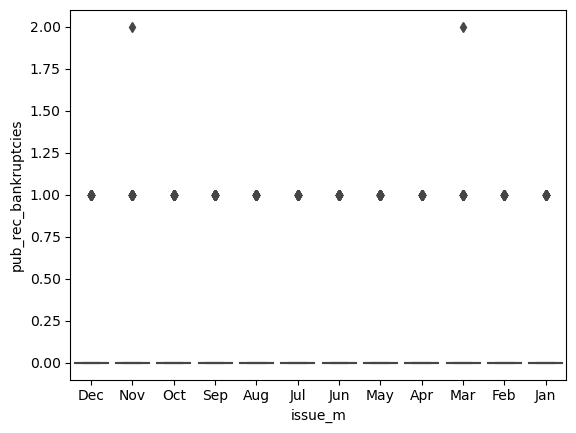

issue_m total_acc


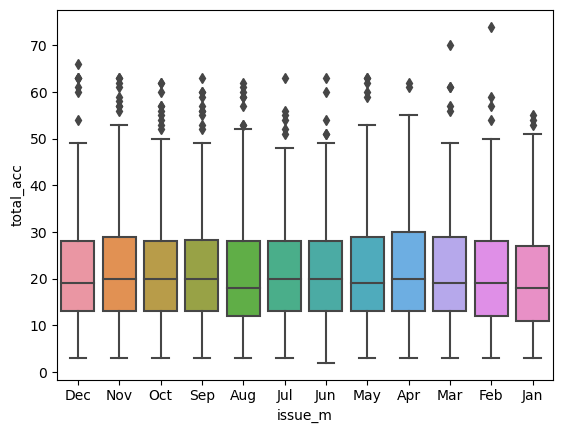

issue_m mths_since_last_delinq


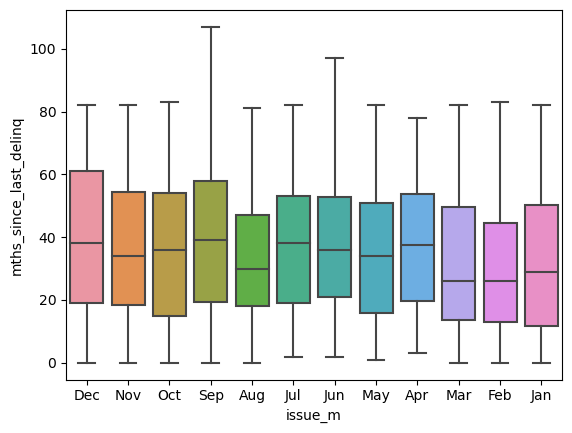

issue_m delinq_2yrs


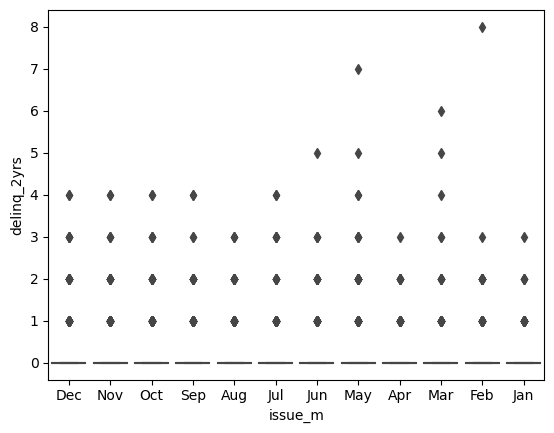

issue_m revol_bal


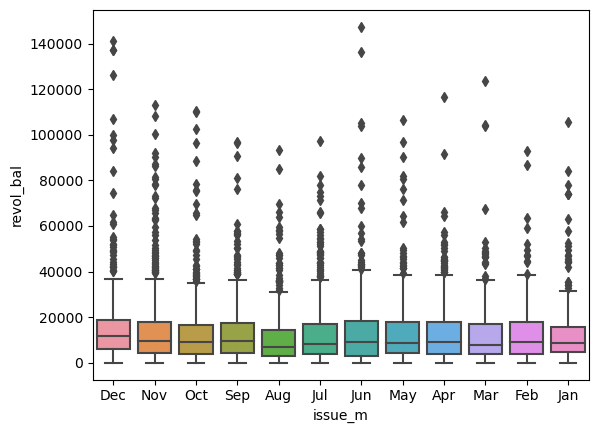

issue_m revol_util


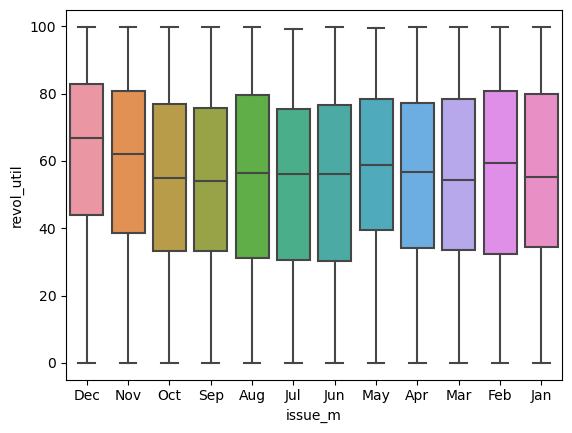

issue_y annual_inc


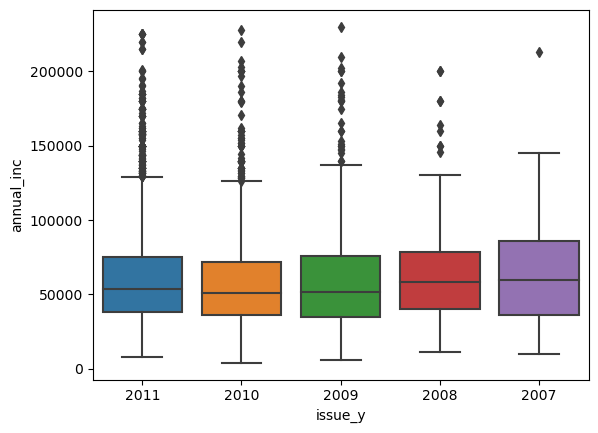

issue_y dti


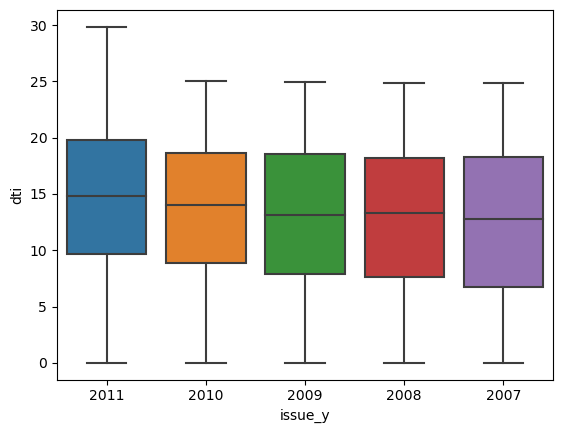

issue_y int_rate


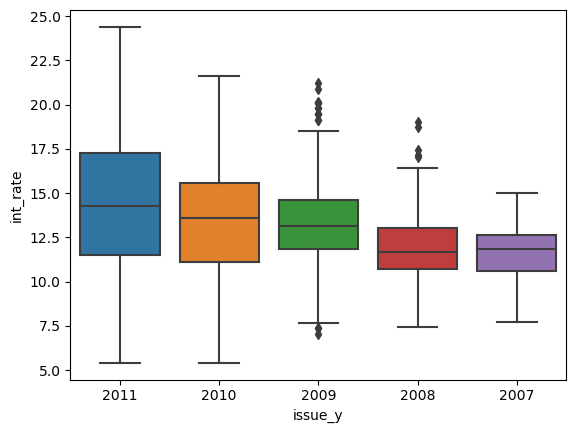

issue_y funded_amnt


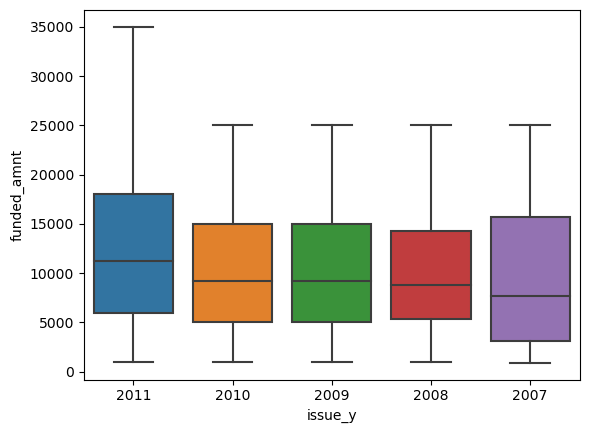

issue_y funded_amnt_inv


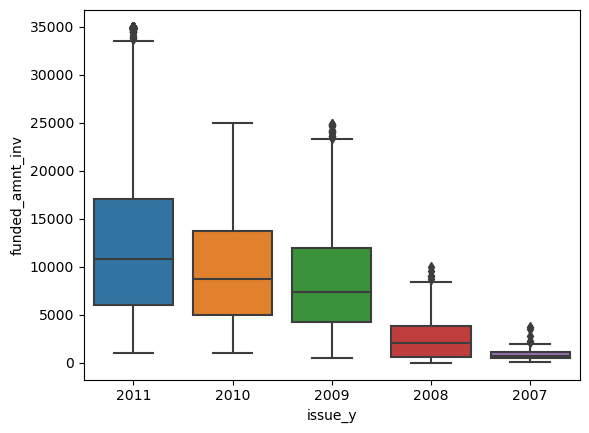

issue_y inq_last_6mths


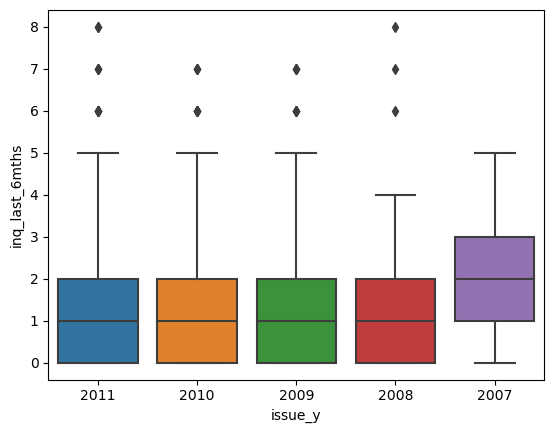

issue_y installment


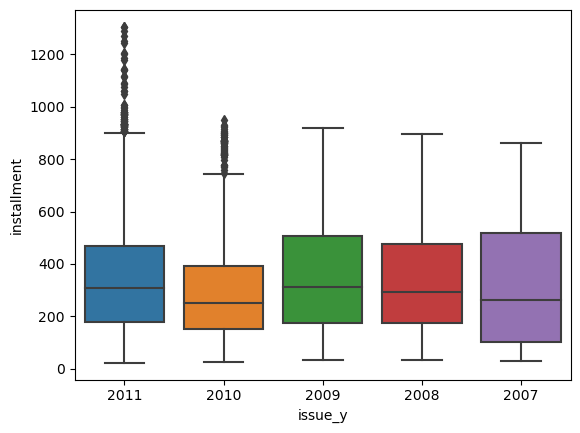

issue_y loan_amnt


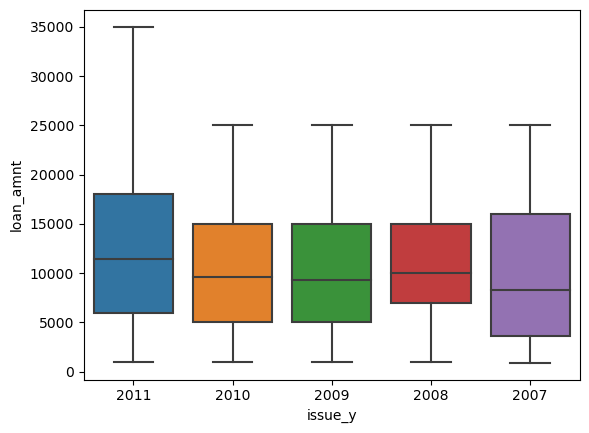

issue_y open_acc


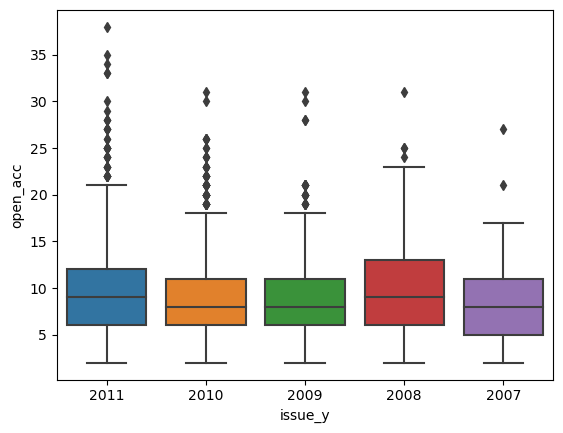

issue_y pub_rec


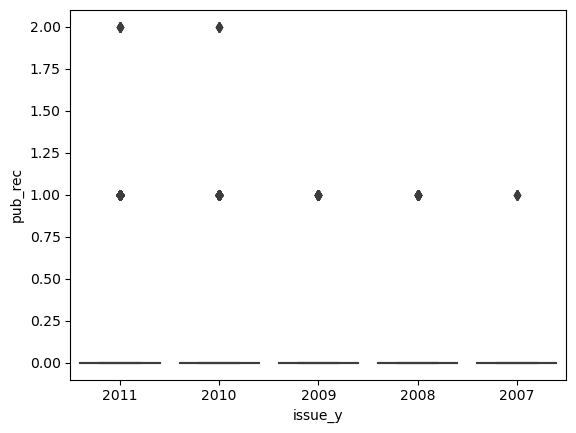

issue_y pub_rec_bankruptcies


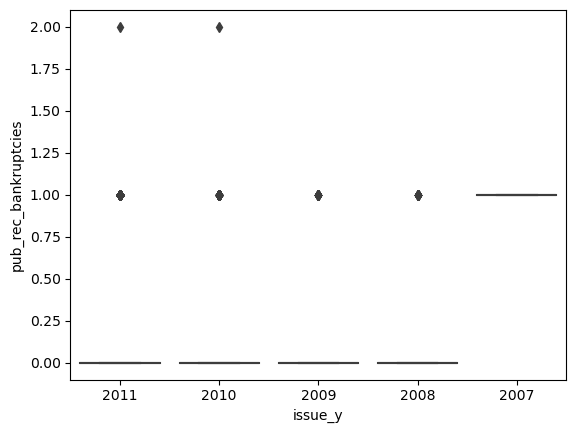

issue_y total_acc


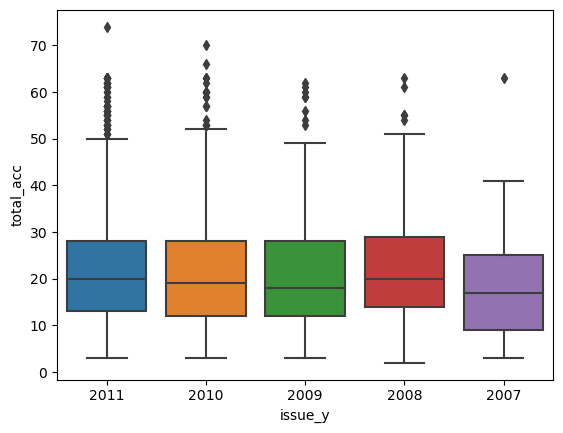

issue_y mths_since_last_delinq


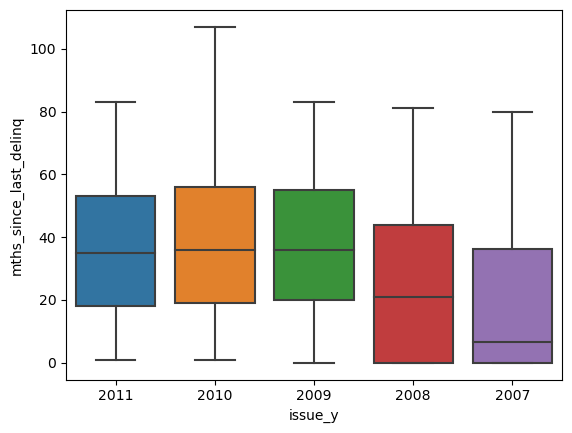

issue_y delinq_2yrs


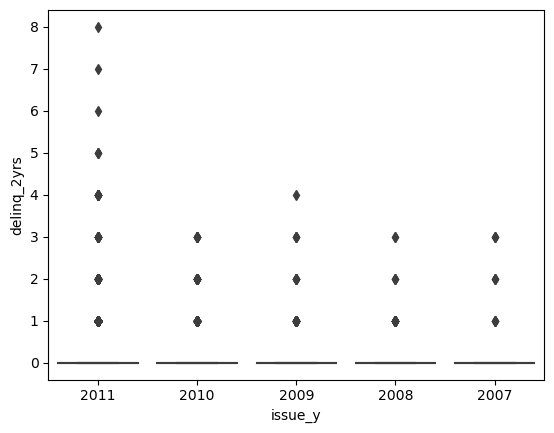

issue_y revol_bal


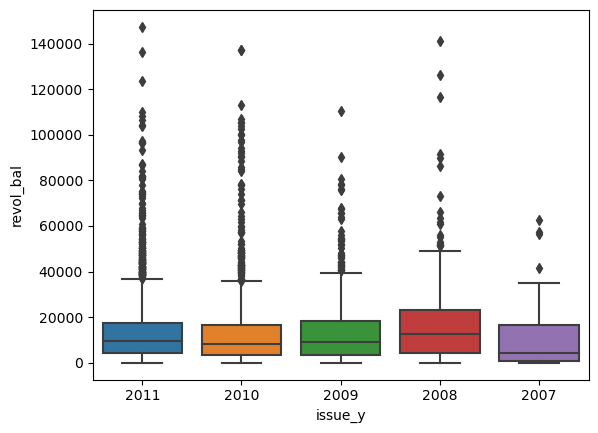

issue_y revol_util


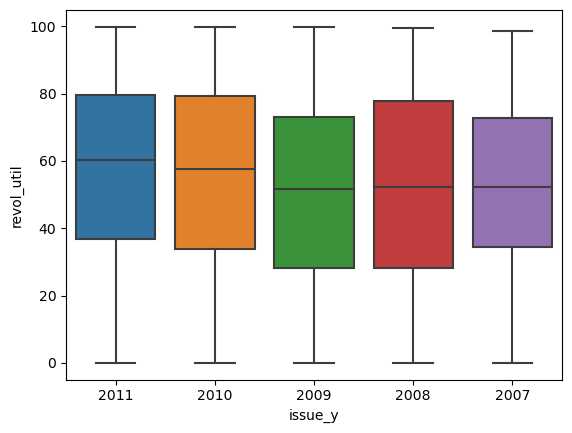

annual_inc_bins annual_inc


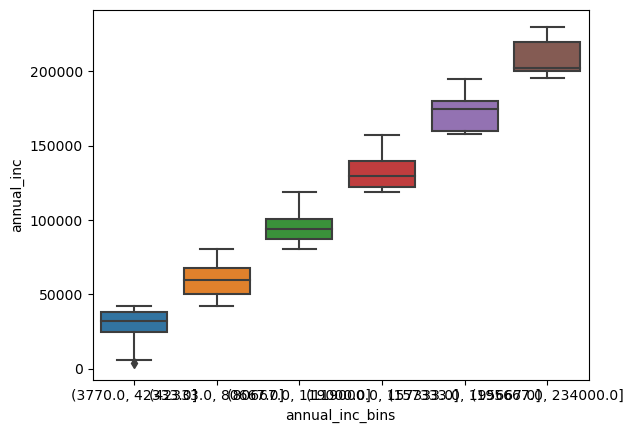

annual_inc_bins dti


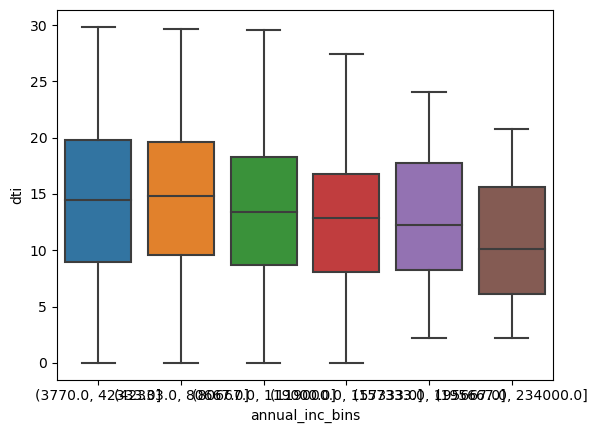

annual_inc_bins int_rate


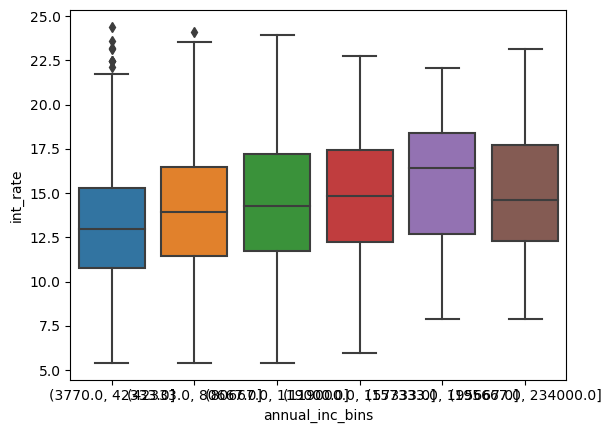

annual_inc_bins funded_amnt


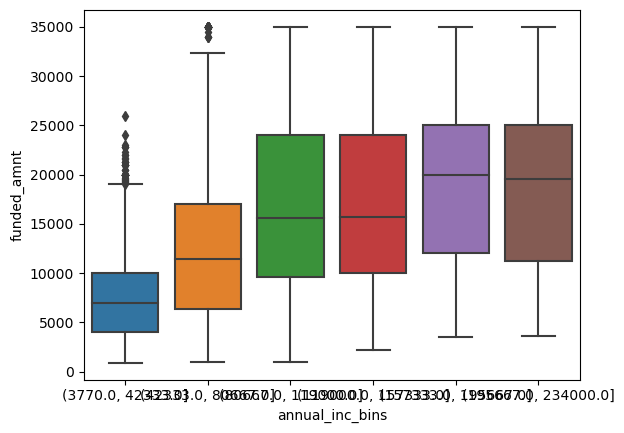

annual_inc_bins funded_amnt_inv


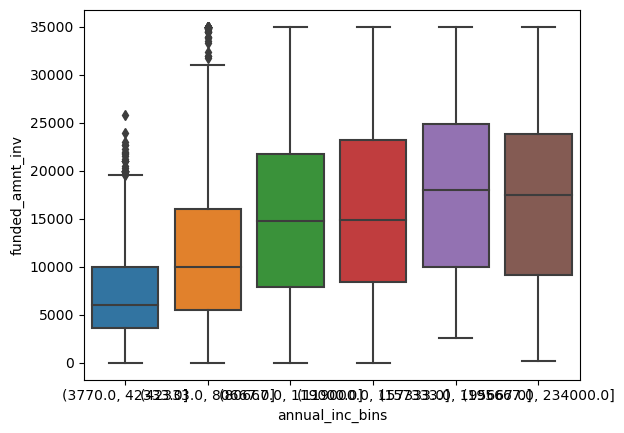

annual_inc_bins inq_last_6mths


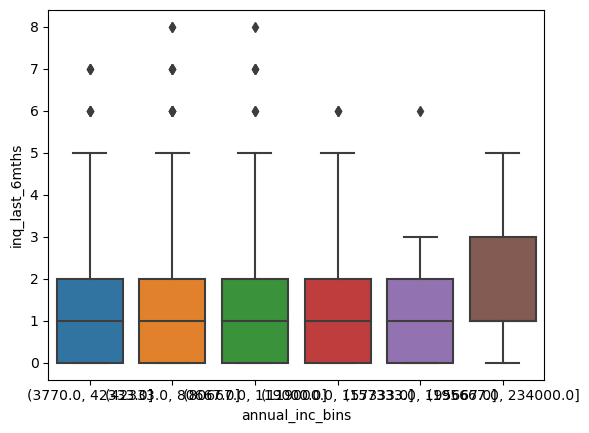

annual_inc_bins installment


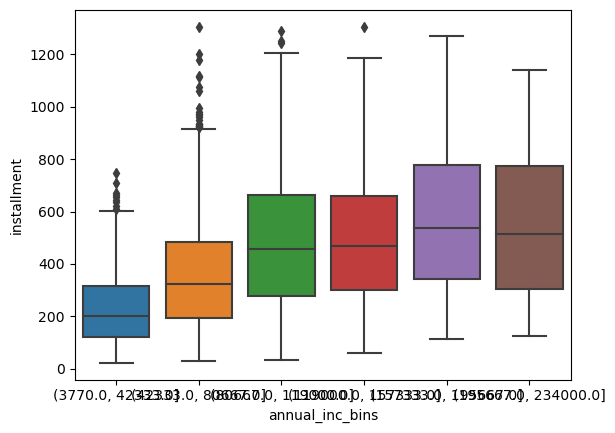

annual_inc_bins loan_amnt


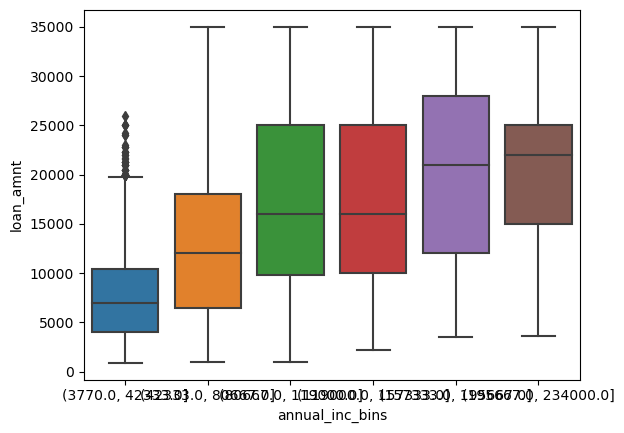

annual_inc_bins open_acc


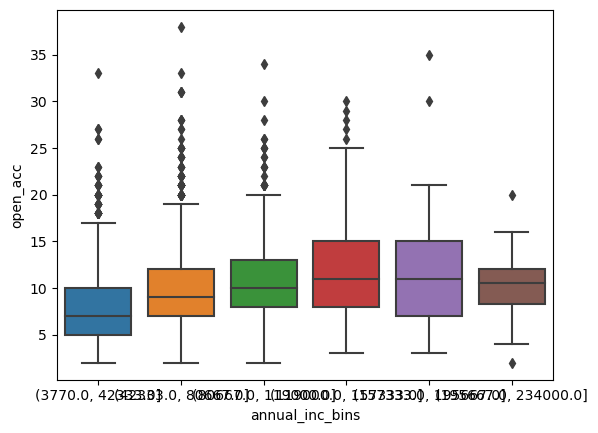

annual_inc_bins pub_rec


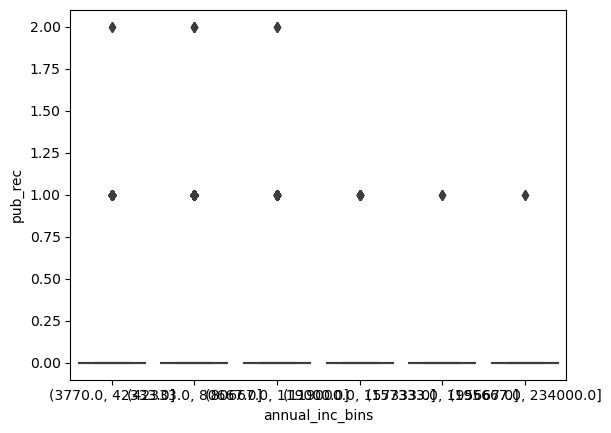

annual_inc_bins pub_rec_bankruptcies


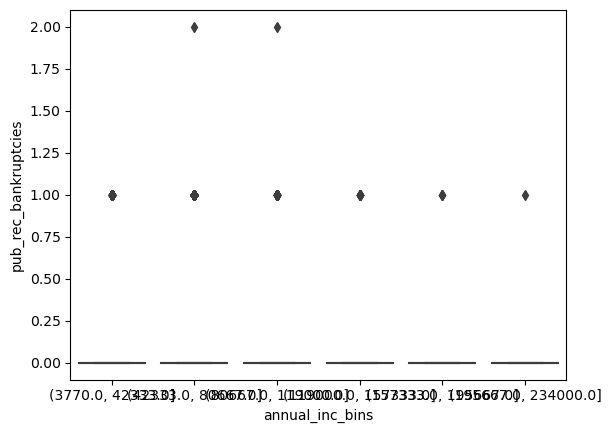

annual_inc_bins total_acc


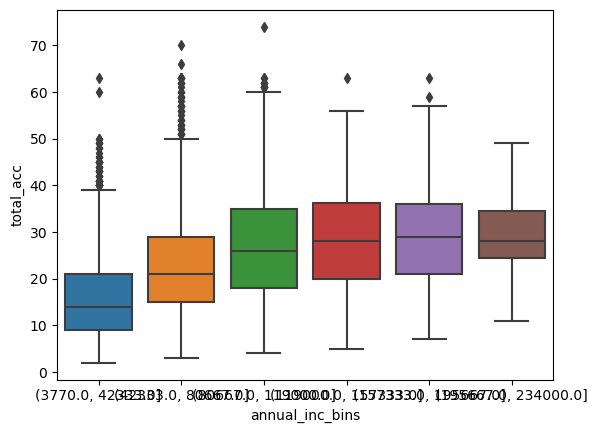

annual_inc_bins mths_since_last_delinq


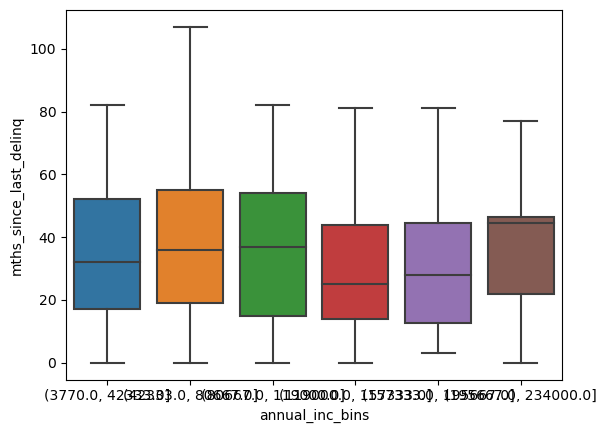

annual_inc_bins delinq_2yrs


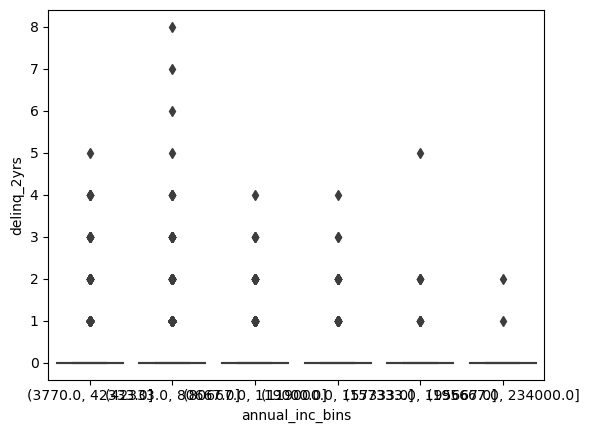

annual_inc_bins revol_bal


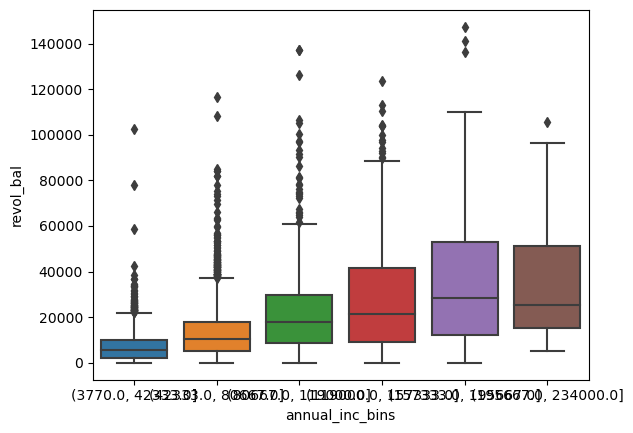

annual_inc_bins revol_util


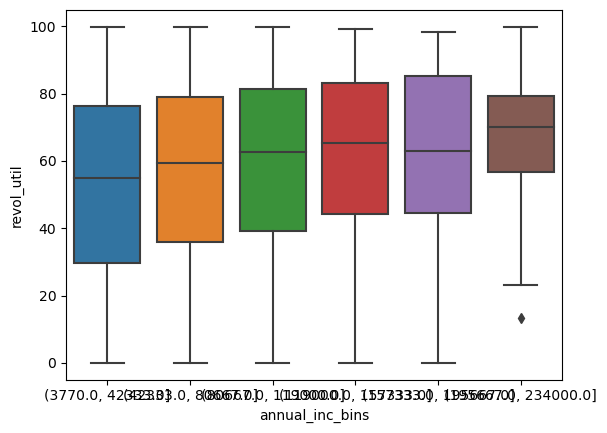

sub_grade annual_inc


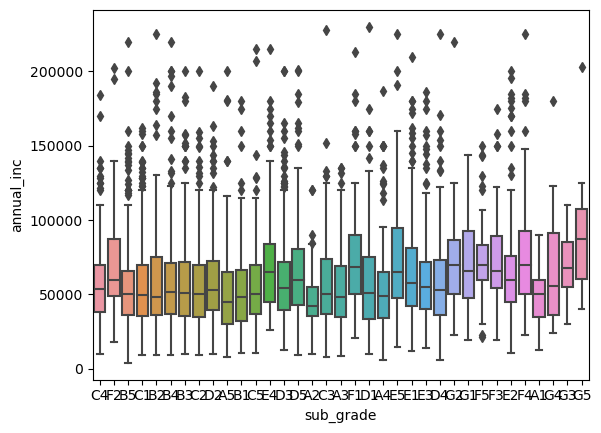

sub_grade dti


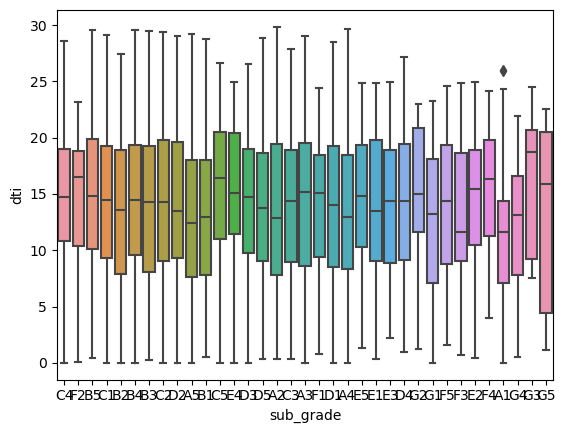

sub_grade int_rate


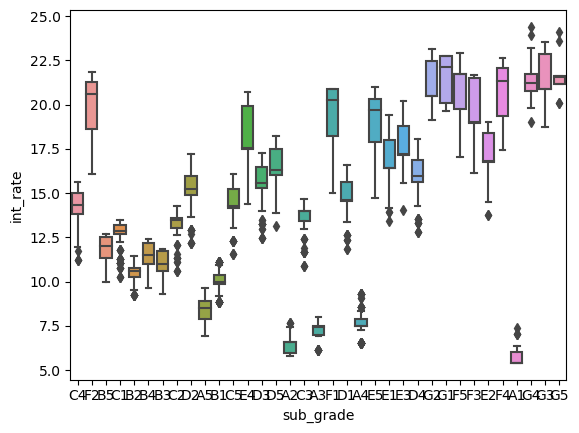

sub_grade funded_amnt


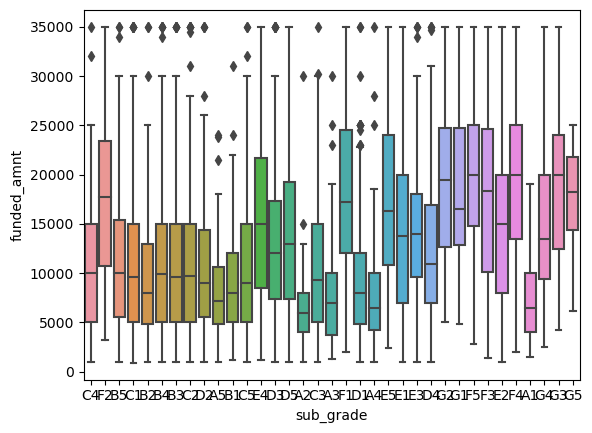

sub_grade funded_amnt_inv


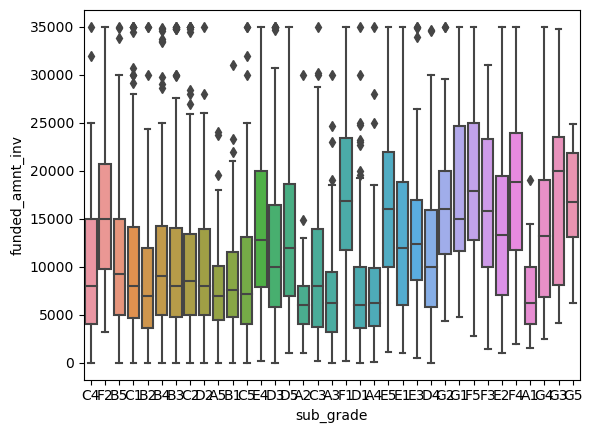

sub_grade inq_last_6mths


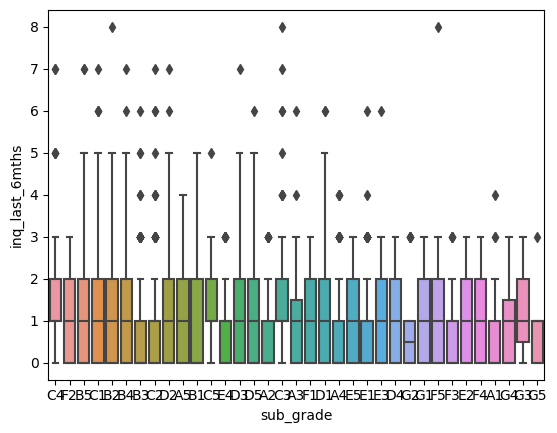

sub_grade installment


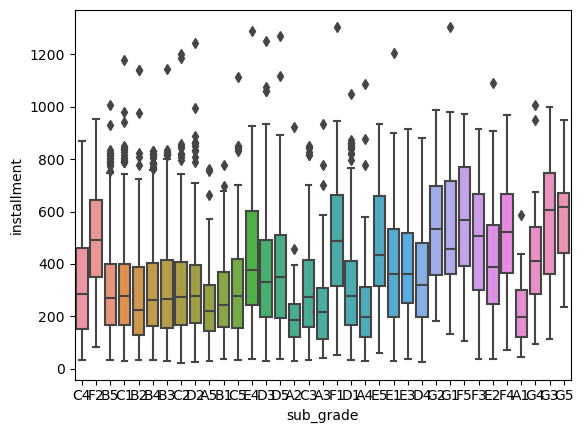

sub_grade loan_amnt


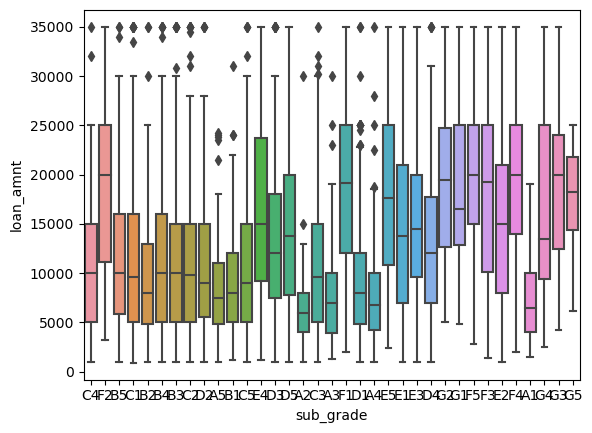

sub_grade open_acc


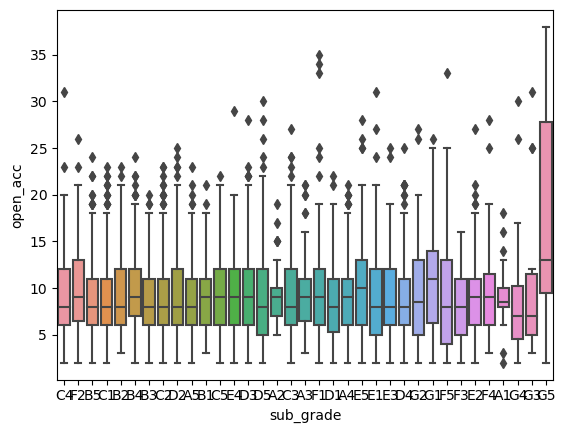

sub_grade pub_rec


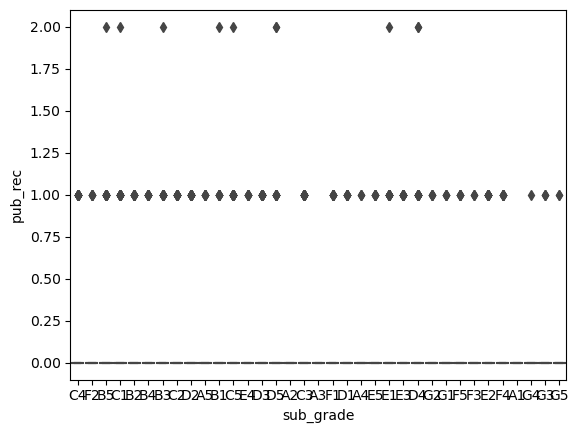

sub_grade pub_rec_bankruptcies


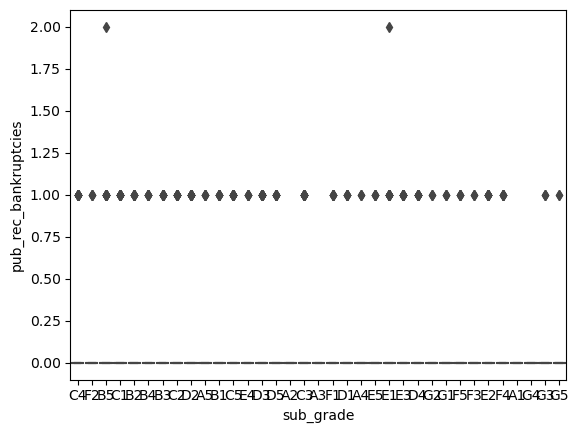

sub_grade total_acc


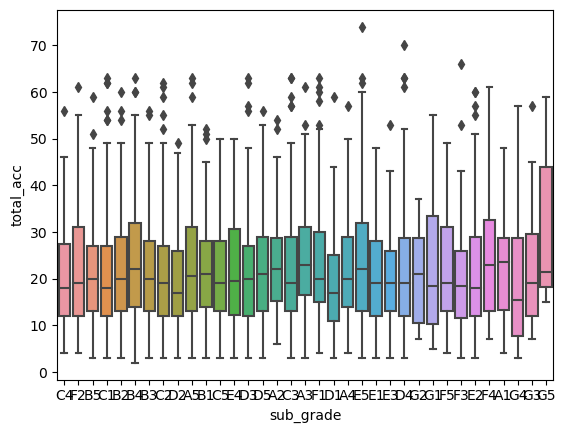

sub_grade mths_since_last_delinq


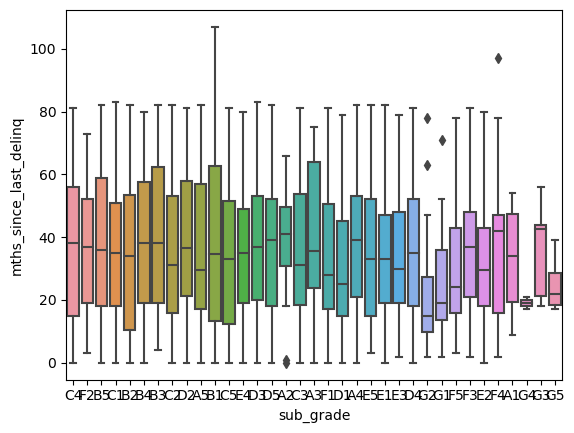

sub_grade delinq_2yrs


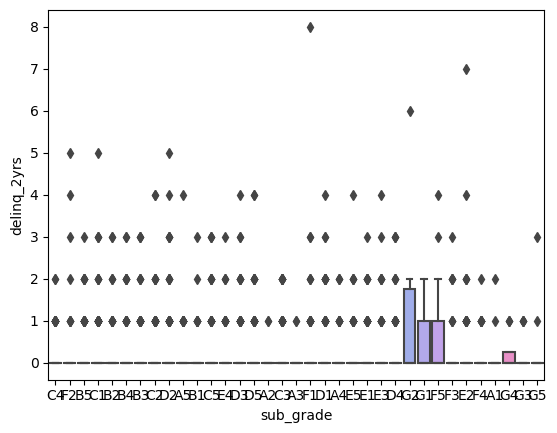

sub_grade revol_bal


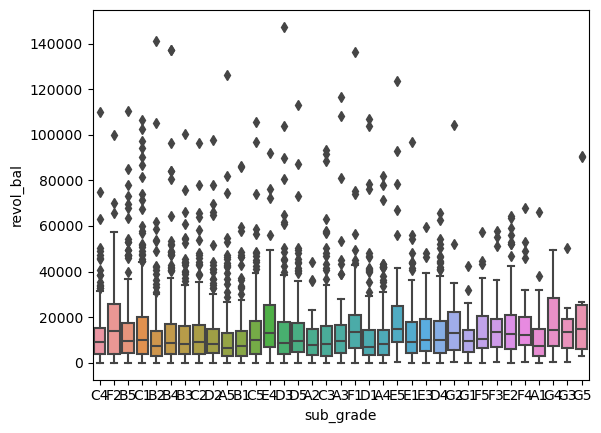

sub_grade revol_util


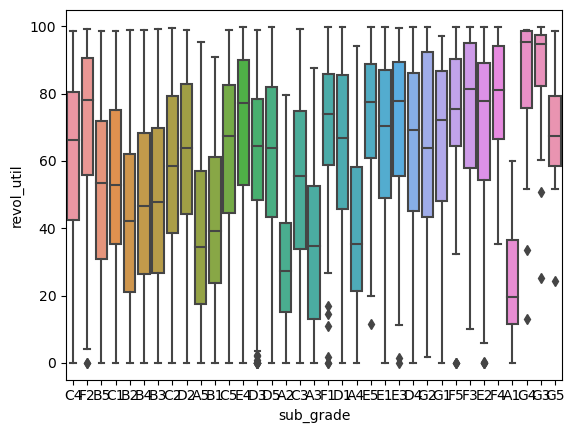

In [351]:
#Numerical vs Categorical - box plots for charged off only

for col1 in categorical_cols:
    for col2 in numerical_cols:
        print(col1,col2)
        sns.boxplot(x=loan_df_coff[col1],y=loan_df_coff[col2])
        plt.show()


<Axes: xlabel='annual_inc_bins', ylabel='loan_amnt'>

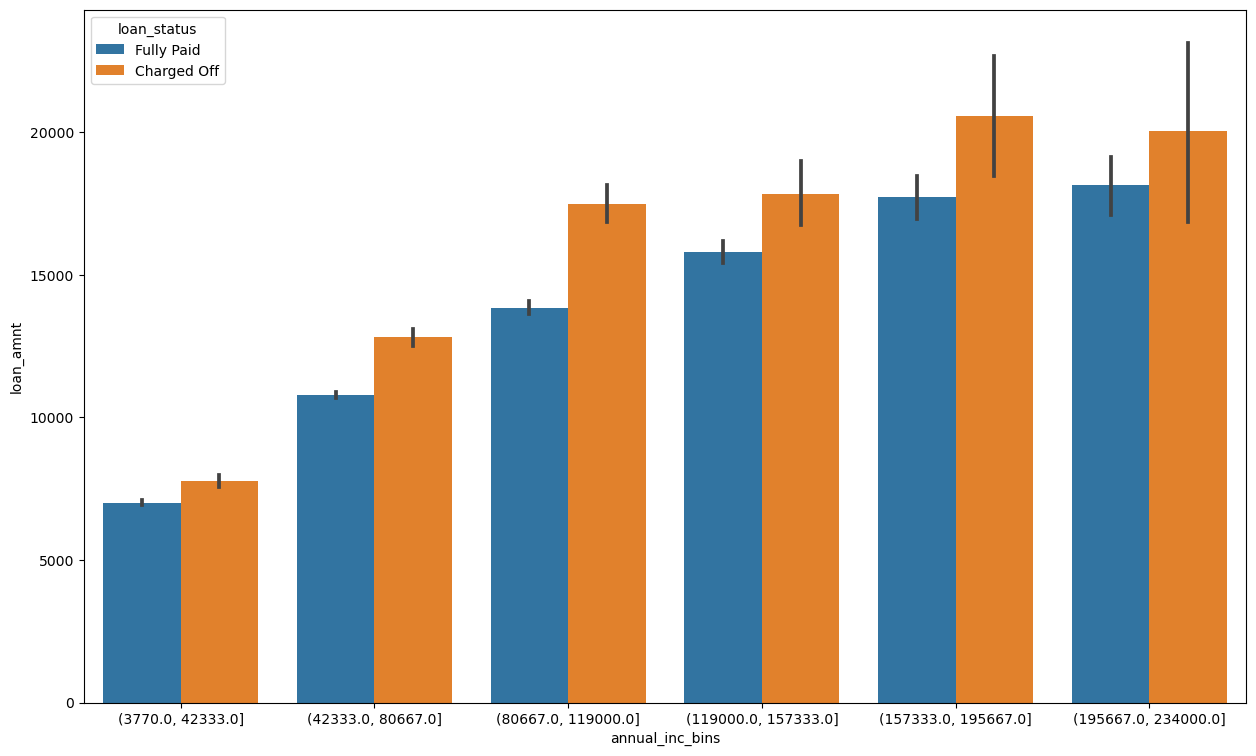

In [352]:
# Annual income groups vs loan amounts
plt.figure(figsize=(15,9))

sns.barplot(x = "annual_inc_bins", y = "loan_amnt", hue = 'loan_status', data = loan_df)

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

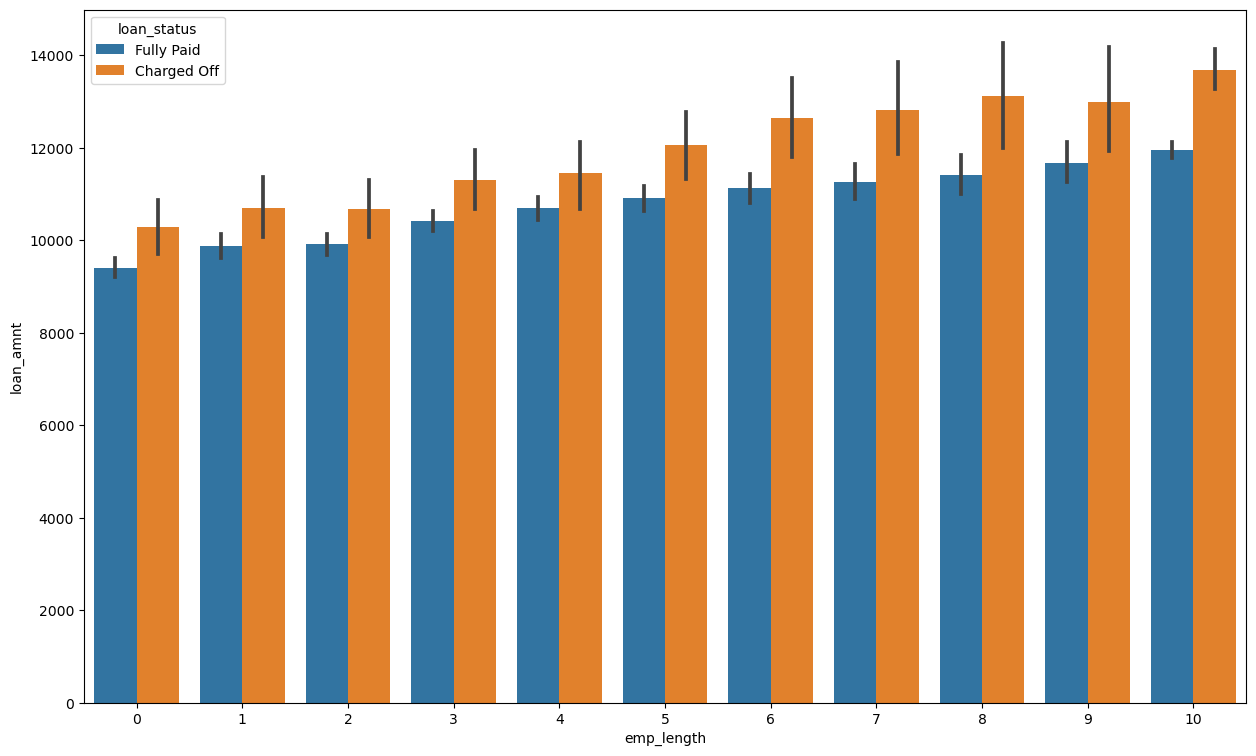

In [353]:
# Employee length vs loan amounts
plt.figure(figsize=(15,9))

sns.barplot(x = "emp_length", y = "loan_amnt", hue = 'loan_status', data = loan_df)

<Axes: xlabel='grade', ylabel='loan_amnt'>

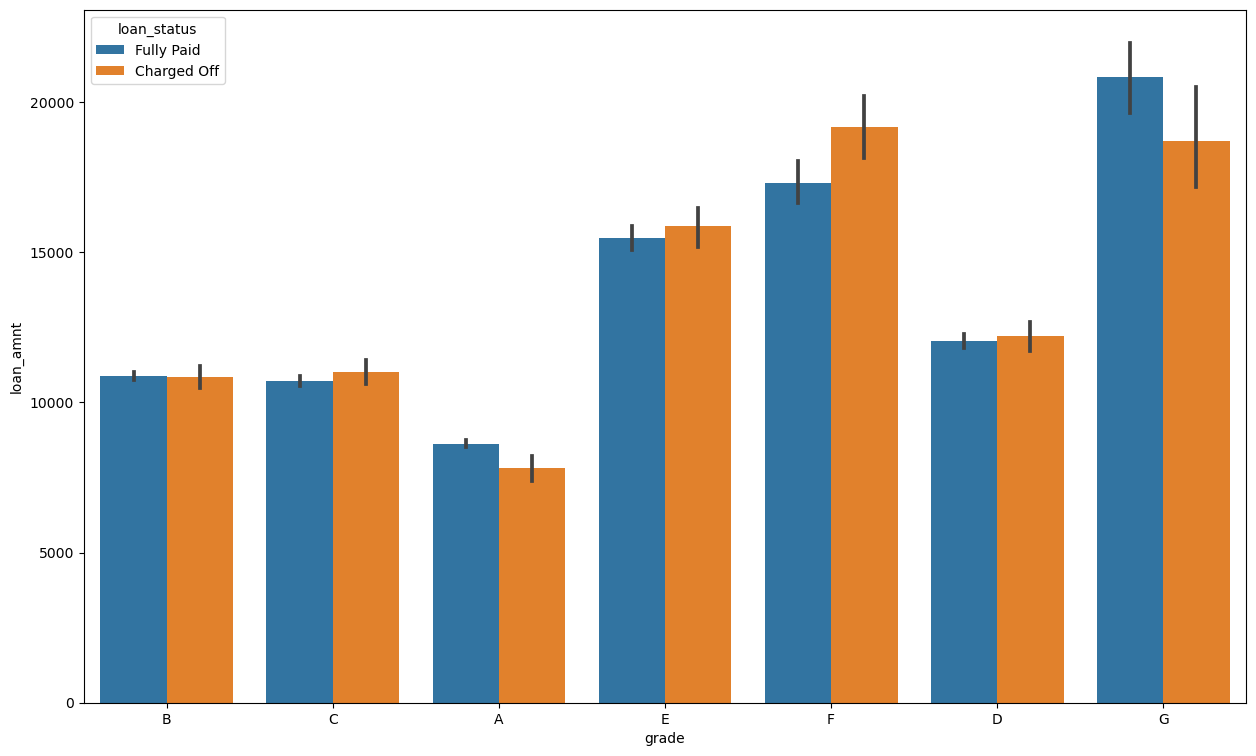

In [354]:
# Grade vs loan amounts
plt.figure(figsize=(15,9))

sns.barplot(x = "grade", y = "loan_amnt", hue = 'loan_status', data = loan_df)

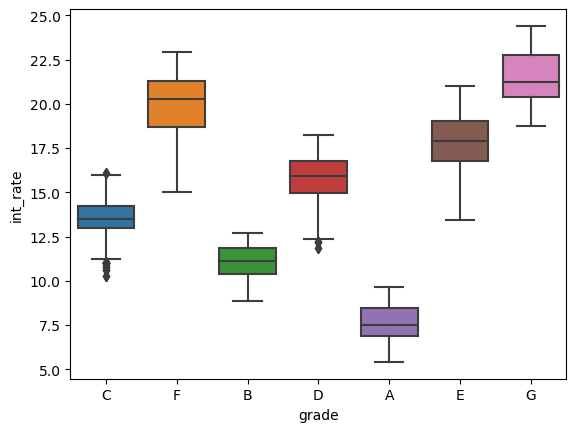

In [355]:
sns.boxplot(x=loan_df_coff['grade'],y=loan_df_coff['int_rate'])
plt.show()

In [356]:
# Look at every categorical column in relation to loan status to understand the prominence of each of the values with respect to loan status

#Using a dataframe for testing
loan_df_test = loan_df

loan_df_test_grade = loan_df_test.pivot_table(index = "grade",  columns = 'loan_status', values = "member_id", aggfunc='count')
loan_df_test_grade['Charged_Off_perc_total'] = round((loan_df_test_grade['Charged Off']/loan_df_test_grade['Charged Off'].sum())*100,2)
loan_df_test_grade['Fully_Paid_perc_total'] = round((loan_df_test_grade['Fully Paid']/loan_df_test_grade['Fully Paid'].sum())*100,2)
loan_df_test_grade['Charged_Off_perc'] = round((loan_df_test_grade['Charged Off']/(loan_df_test_grade['Charged Off']+loan_df_test_grade['Fully Paid']))*100,2)
loan_df_test_grade['Fully_Paid_perc'] = round((loan_df_test_grade['Fully Paid']/(loan_df_test_grade['Charged Off']+loan_df_test_grade['Fully Paid']))*100,2)




In [357]:
loan_df_test_grade

loan_status  Charged Off  Fully Paid  Charged_Off_perc_total  Fully_Paid_perc_total  Charged_Off_perc  Fully_Paid_perc
grade                                                                                                                 
A                    601        9376                   10.79                  28.78              6.02            93.98
B                   1414       10166                   25.40                  31.21             12.21            87.79
C                   1338        6401                   24.03                  19.65             17.29            82.71
D                   1109        3903                   19.92                  11.98             22.13            77.87
E                    700        1899                   12.57                   5.83             26.93            73.07
F                    309         639                    5.55                   1.96             32.59            67.41
G                     97         190                    1.74                   0.58             33.80            66.20

In [358]:
#Work out Charged Off and Fully Paid %s for each of the categorical columns
def Column_Choff(chg_df,inp_df, col):
    chg_df = inp_df.pivot_table(index = [col],  columns = 'loan_status', values = "member_id", aggfunc='count')
    chg_df['Charged_Off_perc_total'] = round((chg_df['Charged Off']/chg_df['Charged Off'].sum())*100,2)
    chg_df['Fully_Paid_perc_total'] = round((chg_df['Fully Paid']/chg_df['Fully Paid'].sum())*100,2)
    chg_df['Charged_Off_perc'] = round((chg_df['Charged Off']/(chg_df['Charged Off']+chg_df['Fully Paid']))*100,2)
    chg_df['Fully_Paid_perc'] = round((chg_df['Fully Paid']/(chg_df['Charged Off']+chg_df['Fully Paid']))*100,2)
    return chg_df


grade_df=pd.DataFrame()
addr_state_df=pd.DataFrame()
home_ownership_df=pd.DataFrame()
emp_length_df=pd.DataFrame()
#loan_status_df=pd.DataFrame()
purpose_df=pd.DataFrame()
term_df=pd.DataFrame()
verification_status_df=pd.DataFrame()
issue_m_df=pd.DataFrame()
issue_y_df=pd.DataFrame()
annual_inc_bins_df=pd.DataFrame()
sub_grade_df=pd.DataFrame()

  
grade_df = Column_Choff(grade_df,loan_df,'grade')
addr_state_df = Column_Choff(addr_state_df,loan_df,'addr_state')
home_ownership_df = Column_Choff(home_ownership_df,loan_df,'home_ownership')
emp_length_df = Column_Choff(emp_length_df,loan_df,'emp_length')
purpose_df = Column_Choff(purpose_df,loan_df,'purpose')
term_df = Column_Choff(term_df,loan_df,'term')
verification_status_df = Column_Choff(verification_status_df,loan_df,'verification_status')
issue_m_df = Column_Choff(issue_m_df,loan_df,'issue_m')
issue_y_df = Column_Choff(issue_y_df,loan_df,'issue_y')
annual_inc_bins_df = Column_Choff(annual_inc_bins_df,loan_df,'annual_inc_bins')
sub_grade_df = Column_Choff(sub_grade_df,loan_df,'sub_grade')



In [359]:
annual_inc_bins_df.sort_values(by='Charged_Off_perc', ascending=False)

loan_status           Charged Off  Fully Paid  Charged_Off_perc_total  Fully_Paid_perc_total  Charged_Off_perc  Fully_Paid_perc
annual_inc_bins                                                                                                                
(3770.0, 42333.0]            1910        8845                   34.30                  27.15             17.76            82.24
(42333.0, 80667.0]           2589       15302                   46.50                  46.98             14.47            85.53
(157333.0, 195667.0]           77         576                    1.38                   1.77             11.79            88.21
(80667.0, 119000.0]           706        5518                   12.68                  16.94             11.34            88.66
(119000.0, 157333.0]          256        2048                    4.60                   6.29             11.11            88.89
(195667.0, 234000.0]           30         285                    0.54                   0.87              9.52            90.48

<Axes: xlabel='sub_grade'>

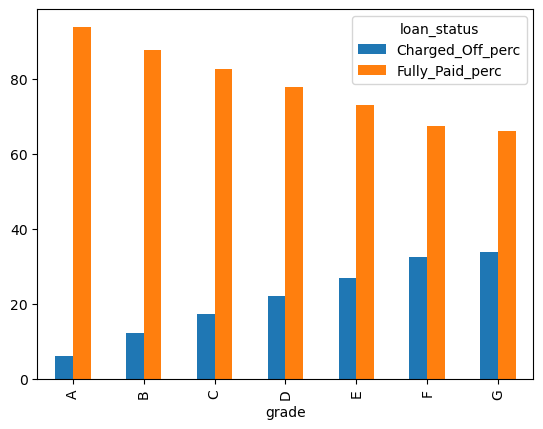

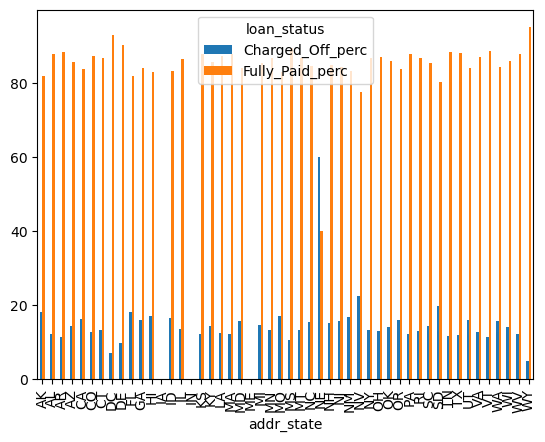

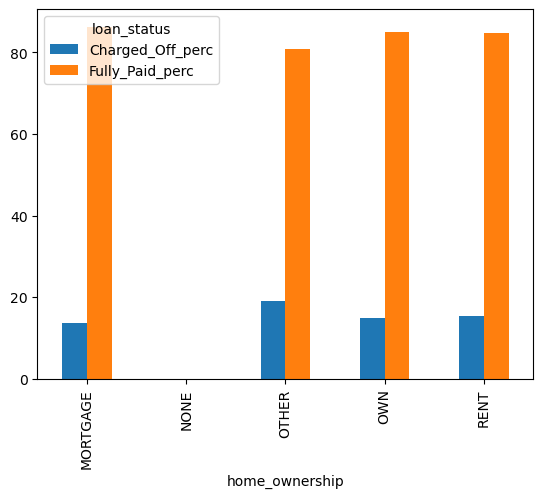

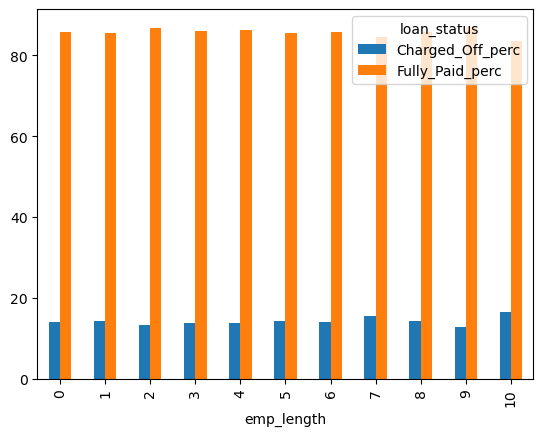

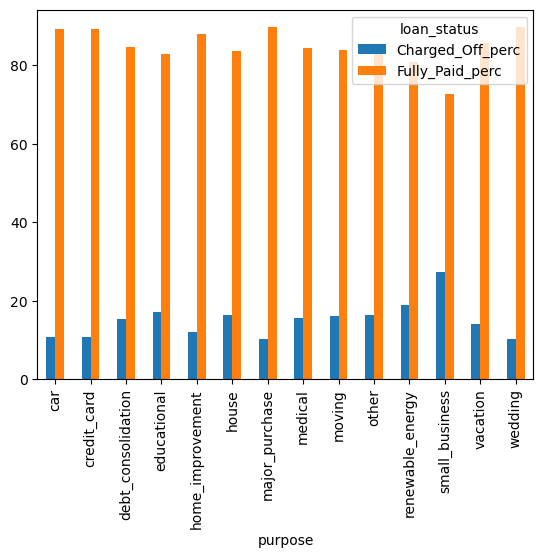

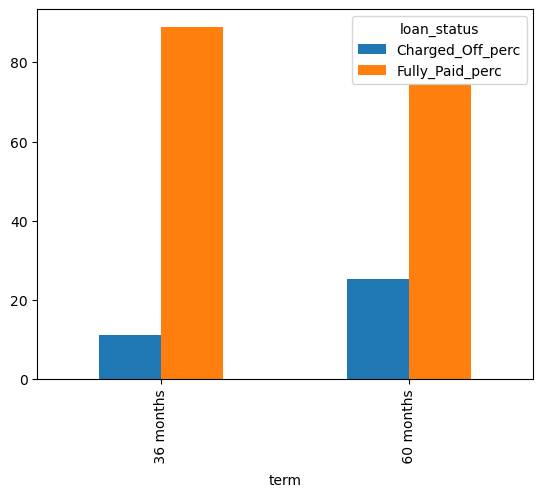

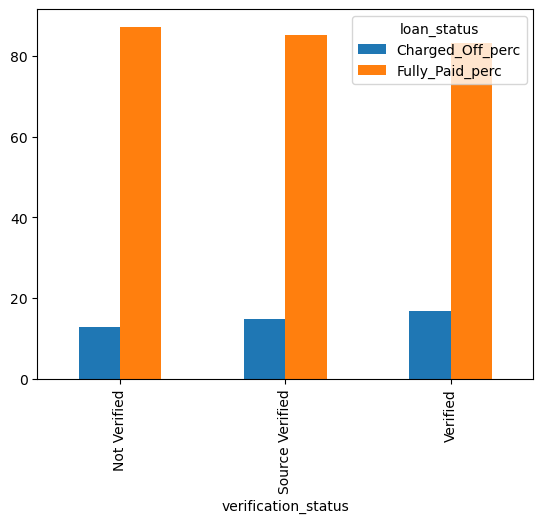

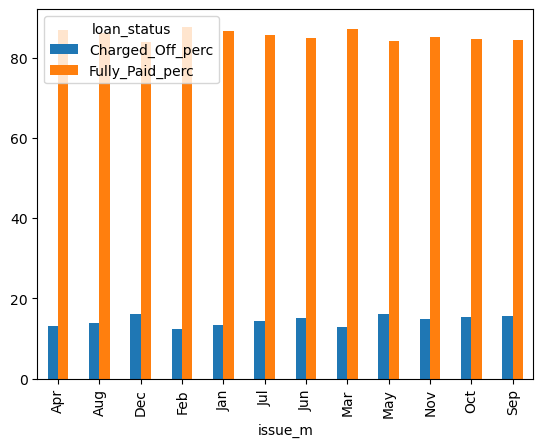

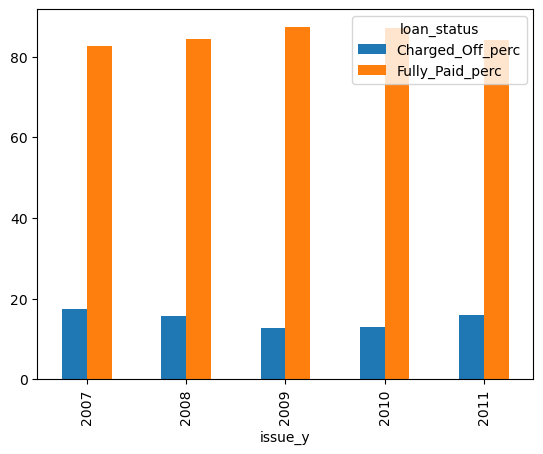

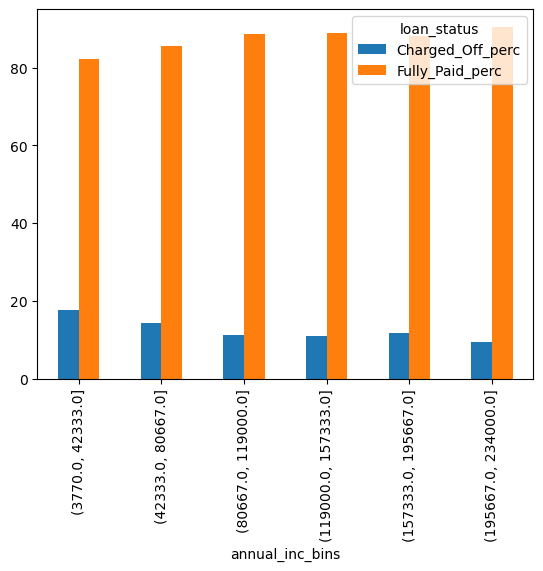

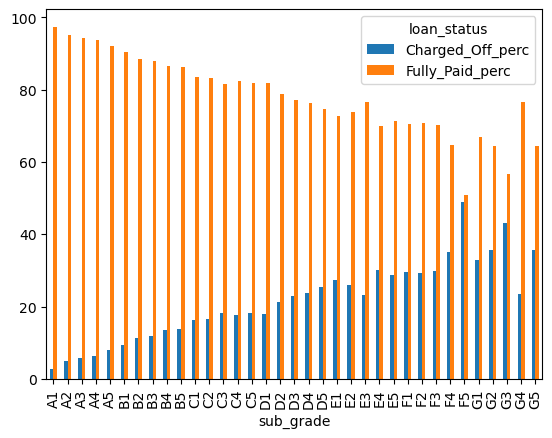

In [360]:
#Produce plots for all categorical columns

grade_df[['Charged_Off_perc','Fully_Paid_perc']].plot(kind='bar')


addr_state_df[['Charged_Off_perc','Fully_Paid_perc']].plot(kind='bar')

home_ownership_df[['Charged_Off_perc','Fully_Paid_perc']].plot(kind='bar')

emp_length_df[['Charged_Off_perc','Fully_Paid_perc']].plot(kind='bar')


purpose_df[['Charged_Off_perc','Fully_Paid_perc']].plot(kind='bar')

term_df[['Charged_Off_perc','Fully_Paid_perc']].plot(kind='bar')

verification_status_df[['Charged_Off_perc','Fully_Paid_perc']].plot(kind='bar')

issue_m_df[['Charged_Off_perc','Fully_Paid_perc']].plot(kind='bar')

issue_y_df[['Charged_Off_perc','Fully_Paid_perc']].plot(kind='bar')

annual_inc_bins_df[['Charged_Off_perc','Fully_Paid_perc']].plot(kind='bar')

sub_grade_df[['Charged_Off_perc','Fully_Paid_perc']].plot(kind='bar')

### Observations from Bivariate analysis

> - Charged off loan amounts are higher than fully paid loan amounts in all income categories and employee lengths
> - Charged Off loan amounts are lower for Grade A and Grade G than Fully paid loan amounts. 
> - Grade G has the highest interest rate and also the highest charge off % vs total loans (charge off + fully paid)
> - State NE has 60% charge off to total loan ratio. but only has 0.05% of the number of incidences. State CA is the highest occurring state within charge off
> - Home ownership Charge off % of 'Other' is 19% vs 15% for Rent. However Other makes up only 0.32% of the total charge off, while Rent makes up 51% of charge off
> - Employee lengths of 10 or more years has both the highest impact and likelihood of charge off. 0-1 years has the highest impact (% of total charge off), 
however the second highest likelihood of "charge off" (as indicated by charge off % vs total loan) is for 7 years at 15%
> - Purpose of "small business" has the highest likelihood of "charge off" based on charge off % vs total loan, however debt consolidation occurs more frequently within the charge off dataset
> - December is the highest in terms of both the likelihood and number of incidences within charge off
> - 60 months has the highest likelihood of charge off
> - The lowest income group i.e. (3770.0, 42333.0] has the highest likelihood of charge off and makes up second highest proportion in the number of incidences within charge off (34%)
> - F5 sub grade has the highest likelihood to charge off at 49% but only makes up <1% of the number of incidences                               

#### 2.3 Multivariate Analysis / Correlations

In [361]:
columns_of_interest=categorical_cols+numerical_cols
#columns_of_interest

subset_loan_df = loan_df[columns_of_interest]

# Subset for charge off loans only

subset_loan_df.head()

addr_state grade home_ownership  emp_length  loan_status         purpose        term verification_status issue_m issue_y     annual_inc_bins sub_grade  annual_inc   dti  int_rate  funded_amnt  funded_amnt_inv  inq_last_6mths  installment  loan_amnt  open_acc  pub_rec  pub_rec_bankruptcies  total_acc  mths_since_last_delinq  delinq_2yrs  revol_bal  revol_util
id                                                                                                                                                                                                                                                                                                                                                                              
1077501         AZ     B           RENT          10   Fully Paid     credit_card   36 months            Verified     Dec    2011   (3770.0, 42333.0]        B2    24000.00 27.65     10.65         5000          4975.00               1       162.87       5000         3        0                  0.00          9                     NaN            0      13648       83.70
1077430         GA     C           RENT           0  Charged Off             car   60 months     Source Verified     Dec    2011   (3770.0, 42333.0]        C4    30000.00  1.00     15.27         2500          2500.00               5        59.83       2500         3        0                  0.00          4                     NaN            0       1687        9.40
1077175         IL     C           RENT          10   Fully Paid  small_business   36 months        Not Verified     Dec    2011   (3770.0, 42333.0]        C5    12252.00  8.72     15.96         2400          2400.00               2        84.33       2400         2        0                  0.00         10                     NaN            0       2956       98.50
1076863         CA     C           RENT          10   Fully Paid           other   36 months     Source Verified     Dec    2011  (42333.0, 80667.0]        C1    49200.00 20.00     13.49        10000         10000.00               1       339.31      10000        10        0                  0.00         37                   35.00            0       5598       21.00
1075269         AZ     A           RENT           3   Fully Paid         wedding   36 months     Source Verified     Dec    2011   (3770.0, 42333.0]        A4    36000.00 11.20      7.90         5000          5000.00               3       156.46       5000         9        0                  0.00         12                     NaN            0       7963       28.30

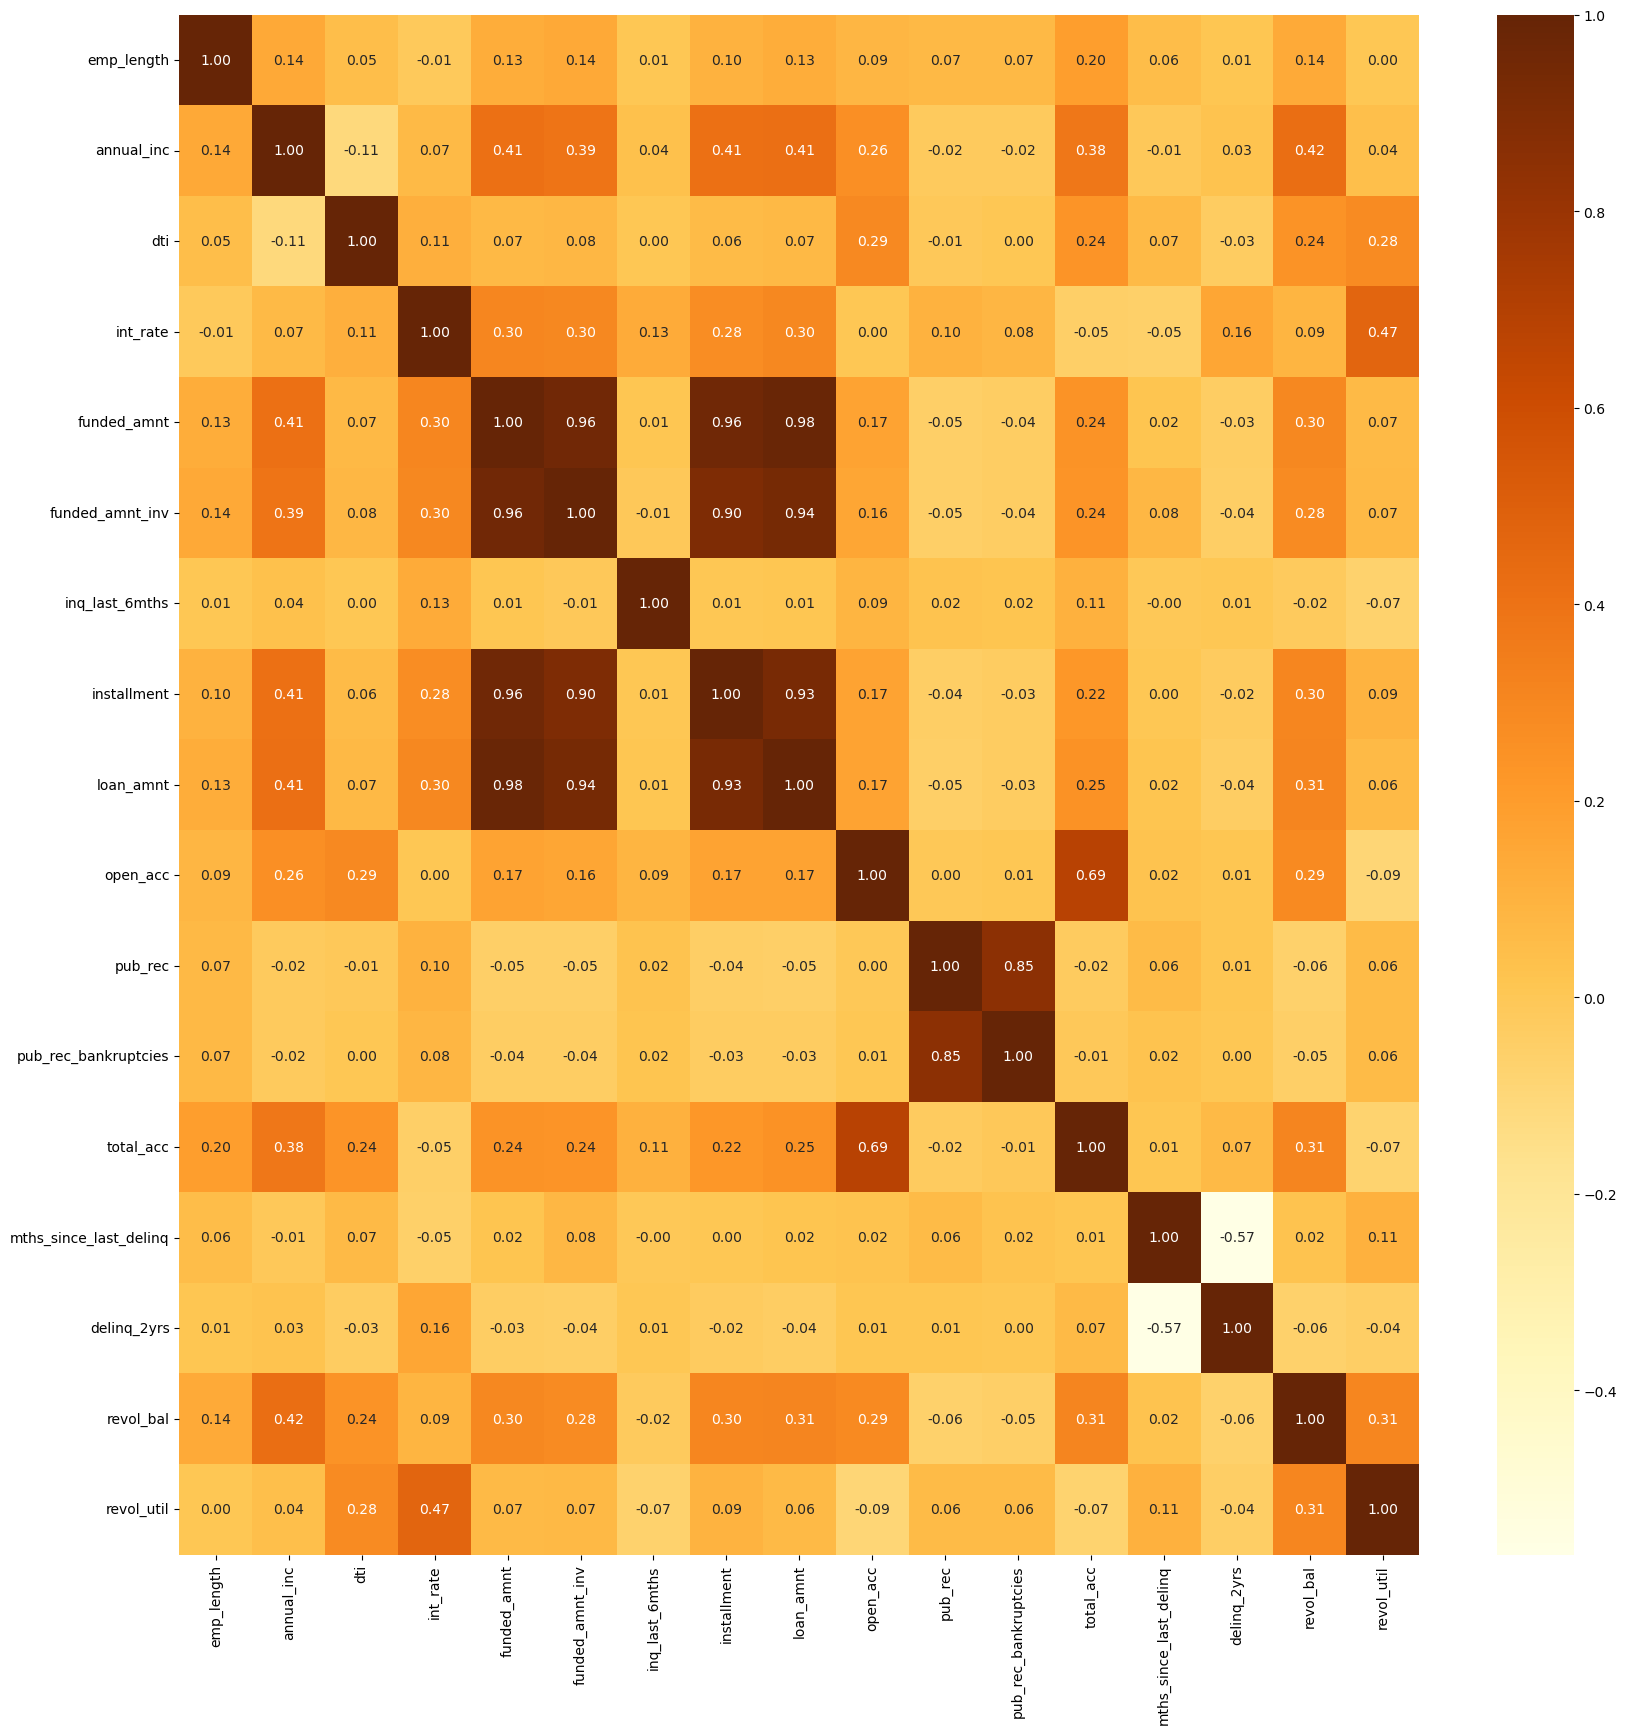

In [362]:
plt.figure(figsize=(20,20))
sns.heatmap(subset_loan_df.corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

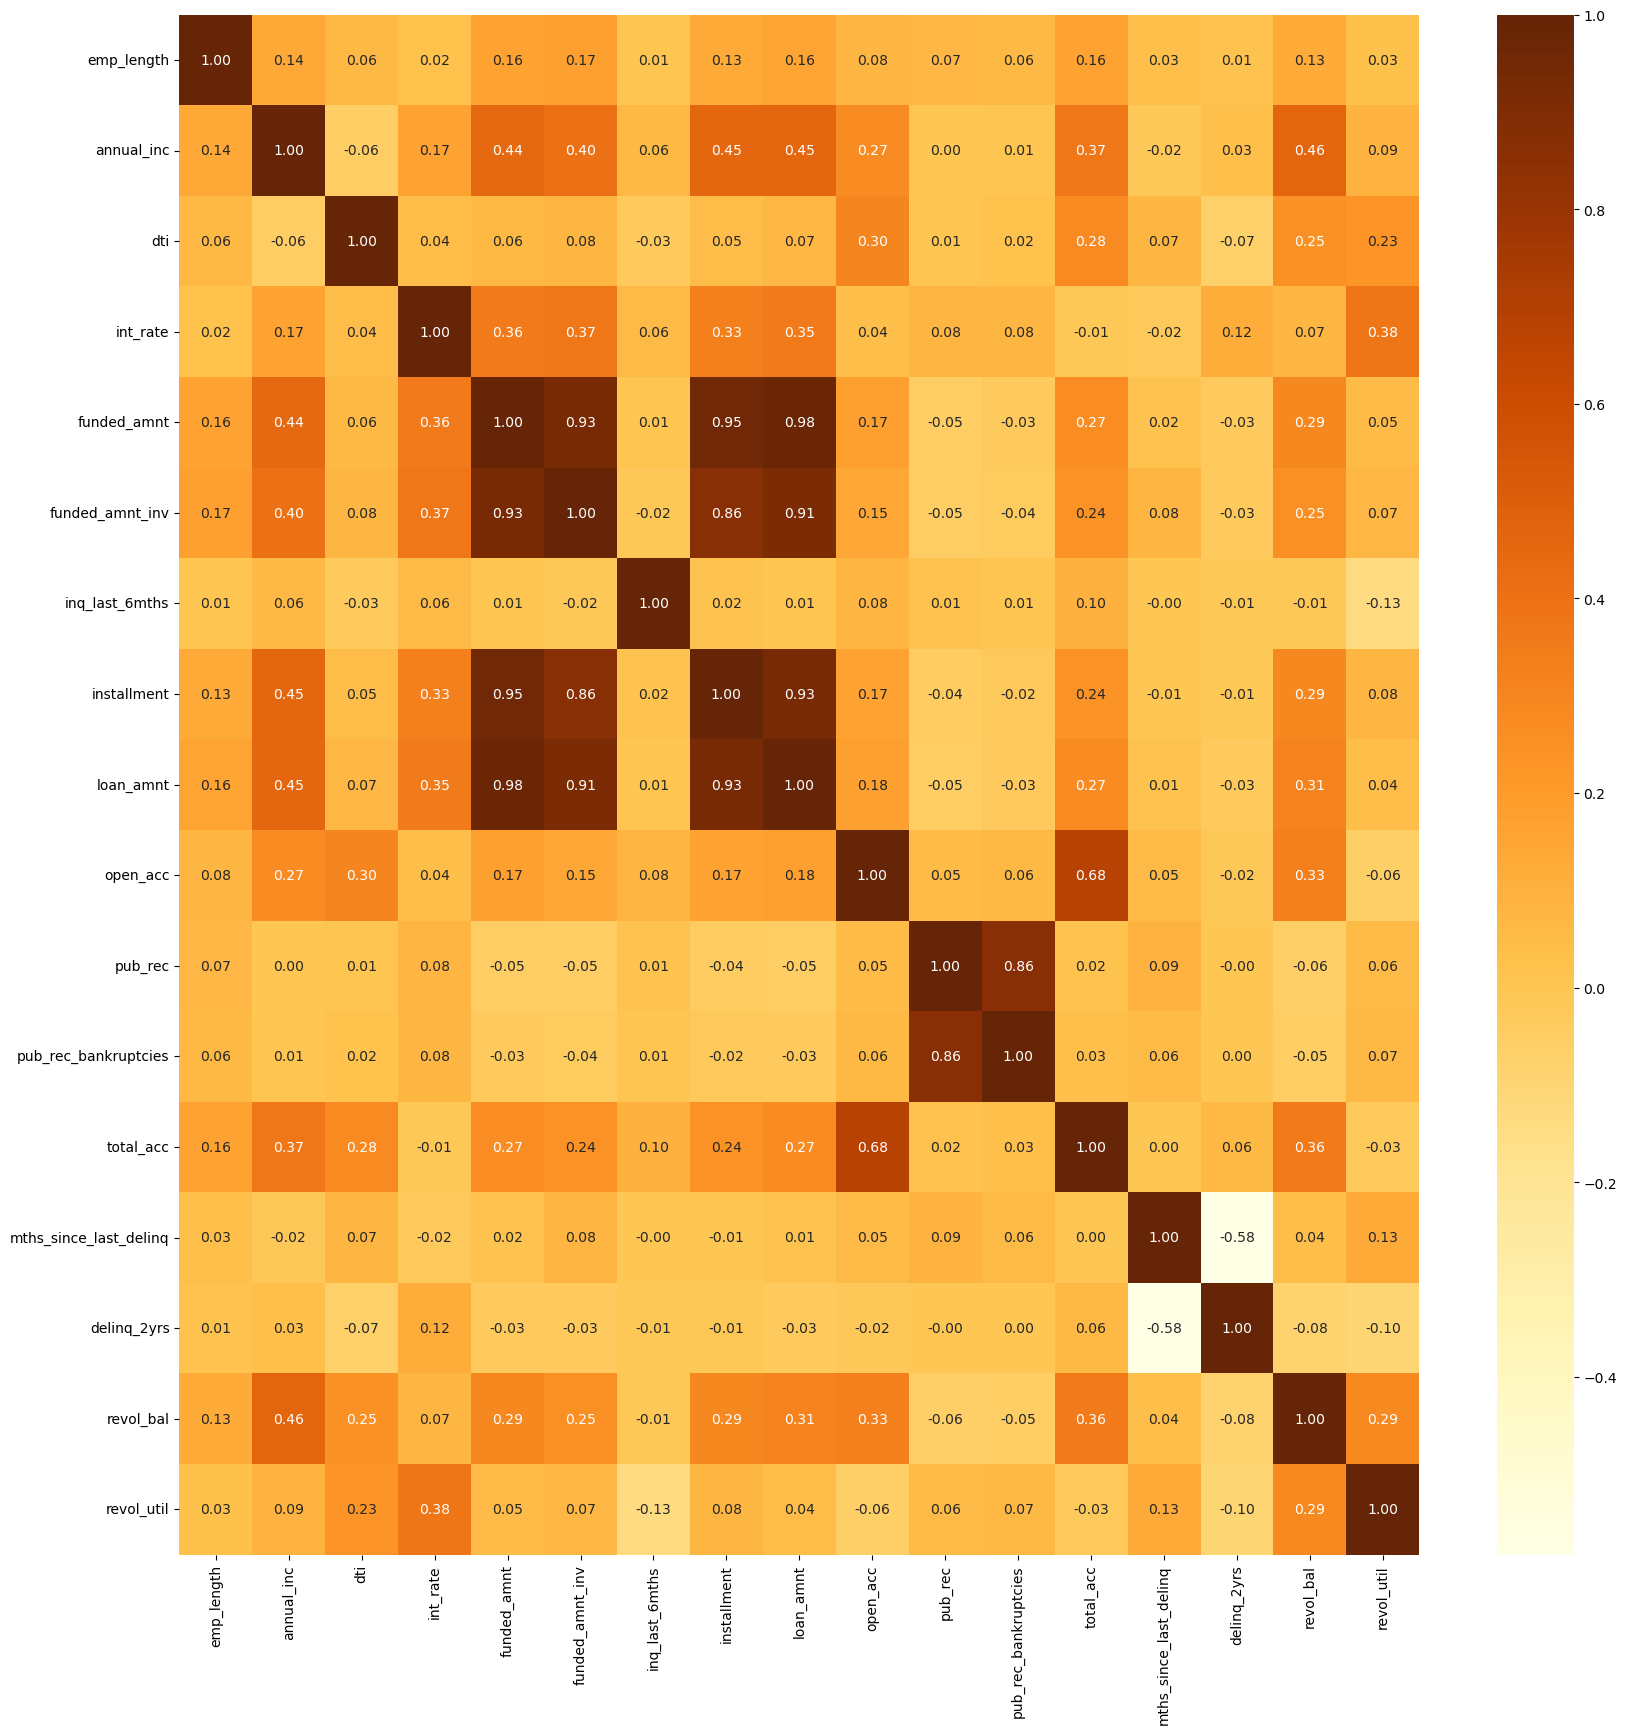

In [363]:
#Run correlations for subset of loan data for only charge off
subset_loan_df_coff = subset_loan_df[subset_loan_df["loan_status"]=='Charged Off']

plt.figure(figsize=(20,20))
sns.heatmap(subset_loan_df_coff.corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

### Observations from Multivariate analysis

> - High correlation among loan amount, investor amount, installment amount and funding amount. Loan amount is a stronger direct indicator
> - Annual income has negative correlation to DTI (debt to income ratio)
> - INterest rate and loan amount are correlated